In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

# DATA SELECTION

In [330]:
filename = "/home/viherbos/DATA_daq/calibration_tpulse_nocompressor_210705.h5"
channel = 0
tac     = 0
tpulse  = 300
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['delay']==tpulse]

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

<IPython.core.display.Javascript object>


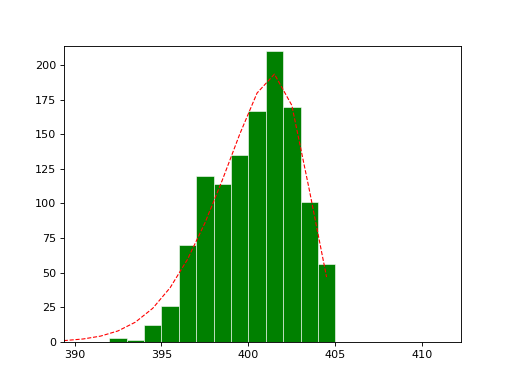

[ 403.41499665    4.19196165   -3.14154485 1221.16098428] [ 0.06963452  0.11871206  0.32270587 20.32747817]
401.4660000008569 2.7230030804388505


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


In [331]:
fig = plt.figure()
axis = fig.add_subplot(111)
#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
coeff,coeff_err,moda,sigma=TPcal.semigauss_fit(data['tfine'],np.max(data['tfine'])-np.min(data['tfine']),True,axis)
#axis.plot(TPcal.semigauss(np.arange(0,410), 400, 3, -10,100))
print(coeff,coeff_err)
print(moda,sigma)


In [ ]:
ASIC = 'asic2'

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [90]:
filename = "/home/viherbos/DATA_daq/CAL_data/" + ASIC + "_tdc_tpulse.h5"

channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit['tfine'],'stone',False)
                print(i,tc,ch,coeff[1],coeff_err[1])
            
                if coeff_err[1]>1:
                    print("Fit failure")
                else:
                    res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 0 0 368.695346299216 0.6761022143223507
10.0 0 0 365.72361931478025 0.6693535224797544
20.0 0 0 362.75006997084085 0.6809555667881907
30.0 0 0 358.69001762820903 0.6753977850473698
40.0 0 0 351.1085256004772 0.7496341341397594
50.0 0 0 347.1982944755743 0.6655444093780083
60.0 0 0 344.12532598369546 0.6808093446393879
70.0 0 0 337.0371067325891 0.6161565731107211
80.0 0 0 332.5310030992091 0.6544322460040912
90.0 0 0 328.60144296053613 0.6713943570865503
100.0 0 0 320.5244381244134 0.7002935231002956


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 0 0 316.6965728502461 0.6800555006822742
120.0 0 0 312.3948176592039 0.6446253274815525
130.0 0 0 309.0581104143211 0.6620841134169827
140.0 0 0 301.91255976678224 0.663749061011038
150.0 0 0 296.91181144203387 0.7458034524429545
160.0 0 0 293.7971379277893 0.6180211414093615
170.0 0 0 284.6737346756109 0.6559564969146963
180.0 0 0 281.8950811618308 0.7595318768485679
190.0 0 0 277.3744878885505 0.6786261666780795
200.0 0 0 269.6468744490352 0.65397311351688


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210.0 0 0 265.50252945932885 0.727297214641569
220.0 0 0 262.2429929658634 0.6381378166551231
230.0 0 0 255.07435293037082 0.6931058770721376
240.0 0 0 251.23982793092048 0.6922418638179529
250.0 0 0 248.1488992992399 0.6294881963752805
260.0 0 0 243.49346976802832 0.659169511541137
270.0 0 0 235.41858260004173 0.7165174952615472
280.0 0 0 232.64153963692894 0.031094382304519975
290.0 0 0 228.02291446433676 0.013947073047184566
300.0 0 0 400.21496430055186 0.04841256086226609
310.0 0 0 396.30051139032815 0.6153894994714277


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320.0 0 0 392.72744186129086 0.7030323642056314
330.0 0 0 385.11406499688417 0.6955333930695479
340.0 0 0 380.7364267349194 0.7086100496102925
350.0 0 0 376.72687576786524 0.6686961947602297
0.0 1 0 353.9552688637936 0.6580232697704308
10.0 1 0 351.18344006495323 0.5942916421657392
20.0 1 0 347.51526733040555 0.6741873437651852
30.0 1 0 343.338972449355 0.6444363479033265
40.0 1 0 335.55417196962907 0.747175653084897
50.0 1 0 332.02844103986894 0.6635402836737528
60.0 1 0 328.13614842703805 0.6705600445866717


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70.0 1 0 320.7254645134 0.6787842607862863
80.0 1 0 318.07126418707054 0.6395621564412564
90.0 1 0 312.4918954837098 0.6947691972364115
100.0 1 0 304.7615061095063 0.6891547855111478
110.0 1 0 300.86615592141493 0.6369844378579589
120.0 1 0 297.04490522505324 0.6570855292269764
130.0 1 0 293.5879271142238 0.6736705548720092
140.0 1 0 286.0106000621178 0.6572260172674981
150.0 1 0 281.7982655571189 0.759116860679402
160.0 1 0 277.7438390495079 0.6469427194730477
170.0 1 0 270.0648335256946 0.7074895190974831


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180.0 1 0 266.4454671885425 0.7324187712487505
190.0 1 0 262.1796597185589 0.7746670682621914
200.0 1 0 253.77776487333196 0.6630245129470904
210.0 1 0 250.1313729697571 0.5994895462618931
220.0 1 0 247.35634485885222 0.6748981374671628
230.0 1 0 239.87247620674097 0.6804036135188685
240.0 1 0 235.8403987104003 0.6478746601653522
250.0 1 0 232.91528089299794 0.5799984442134467
260.0 1 0 228.1915153160141 0.6867619963073129
270.0 1 0 220.82538227513913 0.6995514933068756
280.0 1 0 217.48271245231825 0.03494079255065795


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/pyt

290.0 1 0 212.3991701070917 0.029905668578451856
300.0 1 0 383.15771202479453 0.08109941545374537
310.0 1 0 380.4607667307414 0.6143301652635903
320.0 1 0 376.5118339272654 0.6696166158184794
330.0 1 0 368.9879777746614 0.7033224261591385
340.0 1 0 366.3145189315918 0.6819511563017082
350.0 1 0 361.1996327027446 0.5739678540032854
0.0 2 0 351.2114417662067 0.6234371465892783
10.0 2 0 347.44683674121916 0.6877216881924774
20.0 2 0 344.8921985227802 0.6948858198198794


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30.0 2 0 340.4541666510078 0.6922660811214033
40.0 2 0 332.74370630151066 0.657020869114255
50.0 2 0 329.5265292867 0.6772442642586066
60.0 2 0 325.9510676333974 0.7085613453743632
70.0 2 0 318.6723864390139 0.7949235257875606
80.0 2 0 314.46948954741083 0.7189328142877093
90.0 2 0 310.8544117942326 0.6423159917737407
100.0 2 0 302.94303789840876 0.5942678071206664
110.0 2 0 299.1808020628765 0.6250763623695359
120.0 2 0 295.1310778730072 0.6810553728234341
130.0 2 0 291.37206202963324 0.6529015718281183


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140.0 2 0 283.4506772962734 0.6471575297469003
150.0 2 0 279.6733103674895 0.7805914721088363
160.0 2 0 275.9239703780811 0.7162565976209229
170.0 2 0 266.8135459888569 0.5990051299383672
180.0 2 0 263.8065647504168 0.7433123982320509
190.0 2 0 259.52799498458785 0.773890436375477
200.0 2 0 251.36729644339226 0.6249127292083991
210.0 2 0 247.9273489664453 0.6363472273671497
220.0 2 0 244.06735907503256 0.717155966185601
230.0 2 0 237.37011254107506 0.6238229587764138
240.0 2 0 233.3086947518536 0.6836098279135644


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**

250.0 2 0 229.85273764726003 0.6962716381225482
260.0 2 0 226.24283877441297 0.6716929389517666
270.0 2 0 217.7311206221785 0.6953319608171967
280.0 2 0 215.323994646763 0.03516884725842105
290.0 2 0 210.13801335444663 0.032591453803306546
300.0 2 0 382.1163393869464 0.05680497519863533
310.0 2 0 377.763084235847 0.6496989115189219
320.0 2 0 374.19988877504875 0.791547236382177
330.0 2 0 367.11408442997777 0.5882018188468141
340.0 2 0 362.28587960487306 0.6787079661638854
350.0 2 0 358.45384736938905 0.650847767419353


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 3 0 353.0635110744754 0.6421004452343338
10.0 3 0 349.48186442909633 0.6976404357246632
20.0 3 0 346.1122127166493 0.663157157199752
30.0 3 0 342.12228472508565 0.708249770731527
40.0 3 0 335.1595296940246 0.743754562685401
50.0 3 0 330.8429999617829 0.7532220549800018
60.0 3 0 327.229314879118 0.6818406595762744
70.0 3 0 320.3607816621523 0.7102621970929354
80.0 3 0 316.4519493497471 0.7212798235998479
90.0 3 0 311.7832864365641 0.6699564979839346
100.0 3 0 303.64204049523266 0.6173656032929964


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 3 0 299.83041330185307 0.6570055740110159
120.0 3 0 296.51055723699426 0.6702288472021789
130.0 3 0 293.0903061570958 0.6603306494100065
140.0 3 0 284.9681043101588 0.7326993368460814
150.0 3 0 281.08618336292017 0.6666206055517198
160.0 3 0 276.6897651766483 0.6142770344637017
170.0 3 0 268.701888322233 0.7251794658810332
180.0 3 0 265.3601232646131 0.8273559684385156
190.0 3 0 260.77457998655785 0.7494847486523575
200.0 3 0 252.91683934261374 0.6280702531258997
210.0 3 0 248.73634285000142 0.6448417555512082


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 3 0 245.8393190212433 0.6725331834636161
230.0 3 0 238.45484369584253 0.665852621040188
240.0 3 0 235.04212695377788 0.7003426243967692
250.0 3 0 231.82705351192524 0.6796461109973648
260.0 3 0 227.20195453074388 0.5858585084692733
270.0 3 0 219.188743052143 0.7144858864636605
280.0 3 0 216.06306472563276 0.024139168474114913
290.0 3 0 211.6381004759914 0.023494889311895355
300.0 3 0 382.13141905392763 0.043346451954409136
310.0 3 0 379.1802163913033 0.599218465291303
320.0 3 0 375.767372638285 0.7797840831697276


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 3 0 367.76781438152653 0.6539913189428892
340.0 3 0 364.5798950899799 0.7025703839270033
350.0 3 0 359.62833180525456 0.6763107788499071
0.0 0 1 362.80062386468194 0.6602091773868396
10.0 0 1 359.75213665760344 0.6702408231013772
20.0 0 1 356.19693043459034 0.5995426362484289
30.0 0 1 352.6656707290534 0.678598910117421


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40.0 0 1 345.47128995906496 0.6521818097941293
50.0 0 1 342.6714647876995 0.6649529945076499
60.0 0 1 339.35248496398606 0.7039533813272567
70.0 0 1 332.5965351742428 0.6311173224895844
80.0 0 1 329.3308158168293 0.7824764273476148
90.0 0 1 325.0875381625643 0.6603057307606133
100.0 0 1 317.1103022784577 0.6010254001169535
110.0 0 1 314.14638662779544 0.7489297784306735
120.0 0 1 310.3741080826082 0.7061359393453767
130.0 0 1 306.71128438608514 0.5996103305905669
140.0 0 1 299.9821442520461 0.7655379598374275


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150.0 0 1 295.8567562101807 0.6250587381727253
160.0 0 1 292.7275923499843 0.7310739192024713
170.0 0 1 285.2852848137525 0.6951802489896113
180.0 0 1 280.9822830703717 0.6504930137286316
190.0 0 1 278.168080745095 0.7011622191203025
200.0 0 1 270.3439926285824 0.6248349068608205
210.0 0 1 266.89593760971536 0.568282204108616
220.0 0 1 263.2699291907995 0.6542311409775643
230.0 0 1 256.3455109950324 0.5736263532262921
240.0 0 1 253.07278374009368 0.6684419868780256


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((

250.0 0 1 249.82907915492294 0.6989269870896512
260.0 0 1 246.17235795578745 0.5623029244865682
270.0 0 1 239.2704180146509 0.7573921455526643
280.0 0 1 234.7527615147149 0.715314725294139
290.0 0 1 231.90664785217874 0.009695609634524005
300.0 0 1 389.0527043649716 0.04484132372896717
310.0 0 1 386.32295552322637 0.6045615938233928
320.0 0 1 383.83531053556766 0.6441979889443435
330.0 0 1 376.6520388578989 0.5990292208819433
340.0 0 1 373.1326747432478 0.6948658938476646
350.0 0 1 369.50745933060995 0.7267018459493528


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 1 1 348.0117226285074 0.606720691119272
10.0 1 1 344.717504829688 0.6576777092866339
20.0 1 1 341.5880149793462 0.6061944832405743
30.0 1 1 339.1201987073082 0.709792234315739
40.0 1 1 331.87037210828873 0.6292468088330492
50.0 1 1 327.7355019735259 0.6201163056589114
60.0 1 1 324.0000144091933 0.7595017587274748
70.0 1 1 317.3101359668697 0.7263802288951633
80.0 1 1 314.0313518450392 0.7766534725569799
90.0 1 1 310.666614048348 0.6835918143215899
100.0 1 1 303.12786858005654 0.7096001736811276


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 1 1 299.5900833579652 0.7311219452290096
120.0 1 1 295.2946391454538 0.5859163804486949
130.0 1 1 291.6557429691962 0.593655151777415
140.0 1 1 285.22622686116773 0.6682098038003287
150.0 1 1 281.6892764709044 0.6152354607114142
160.0 1 1 277.50522531354244 0.6674470882467595
170.0 1 1 269.55064063809 0.7243322235478743
180.0 1 1 266.9396289589257 0.5610951540017719
190.0 1 1 262.7237028822035 0.6772578870692896
200.0 1 1 255.02479860907144 0.6298685409786057


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210.0 1 1 251.87792522741148 0.5787532869603058
220.0 1 1 248.69858051590373 0.6863308100258517
230.0 1 1 241.69509878359696 0.6153092222866791
240.0 1 1 238.70054544819655 0.7166143213154367
250.0 1 1 235.20372911765682 0.6122186381012852
260.0 1 1 230.83562641916296 0.6973737531407607
270.0 1 1 224.59412828852533 0.7594616839417175
280.0 1 1 220.70157201242543 0.6519442611085394
290.0 1 1 217.4456044660503 0.01632810145884665
300.0 1 1 374.9557277100656 0.016863579935012488


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310.0 1 1 371.5994786496198 0.5828019521043744
320.0 1 1 369.3257196631412 0.7390857269457025
330.0 1 1 361.40256178786177 0.5938865312769229
340.0 1 1 359.0416966971569 0.7177593338445616
350.0 1 1 355.492520919248 0.6467439483073207
0.0 2 1 343.51255822403715 0.6473291251476877
10.0 2 1 340.8174855790145 0.6171384464959552
20.0 2 1 336.35055619295684 0.5824624181119696
30.0 2 1 333.16073437623635 0.5818872852265325
40.0 2 1 326.3730658376182 0.5655573635602178


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50.0 2 1 323.1654109169333 0.7355540367202542
60.0 2 1 319.7469968508542 0.7402197325407767
70.0 2 1 312.84280702044214 0.743346302335806
80.0 2 1 309.12741079114187 0.7810812839560078
90.0 2 1 305.6672479605931 0.7203773069508472
100.0 2 1 298.0798637627866 0.7153239337551099
110.0 2 1 294.6924220669773 0.7313898198219828
120.0 2 1 291.0674299563977 0.6395056570942299
130.0 2 1 286.73214924899696 0.6124353549881354
140.0 2 1 280.4292467639252 0.7337550784585843
150.0 2 1 276.0789110610597 0.6394892019853503


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160.0 2 1 272.7978711442672 0.5821170635318966
170.0 2 1 265.5949967716542 0.6587297657877733
180.0 2 1 261.7635782587369 0.552184202261775
190.0 2 1 258.0666039593894 0.8229097711517244
200.0 2 1 250.75087500347675 0.6032554934825952
210.0 2 1 247.355754017148 0.650878600711044
220.0 2 1 243.9368010282756 0.6790302758813538
230.0 2 1 236.2637289463834 0.5876041888297884
240.0 2 1 233.5876856636932 0.7020996505728984
250.0 2 1 230.4294083746598 0.6481108267576926
260.0 2 1 226.88207473959335 0.575998025930085


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/

270.0 2 1 219.67889064890096 0.6821967897368563
280.0 2 1 215.70244283067845 0.6654984220217585
290.0 2 1 211.77548819642982 0.010284930564986371
300.0 2 1 369.92751850267524 0.03302770064876128
310.0 2 1 367.13724543915765 0.5860576178814901
320.0 2 1 364.6758940256108 0.7076630225202513
330.0 2 1 357.01816148816556 0.6372089972709201
340.0 2 1 353.0340320546616 0.6560671584229859
350.0 2 1 350.1138343262858 0.6433725447677512
0.0 3 1 343.87052159301953 0.6977198226972956


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10.0 3 1 341.15473839491113 0.6641494234593607
20.0 3 1 337.3887834555172 0.5790113559847911
30.0 3 1 334.87490664032805 0.6915533020915654
40.0 3 1 328.6590262191927 0.6916568521057572
50.0 3 1 324.81906343531557 0.7444504388868329
60.0 3 1 320.87699758979613 0.6313692907462046
70.0 3 1 313.5681568800643 0.7097872099156024
80.0 3 1 310.3464649110521 0.7513053083126149
90.0 3 1 307.1102473832501 0.681424414508318
100.0 3 1 299.5893865486547 0.7407359877047721
110.0 3 1 296.1613635132245 0.5993065400917513


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120.0 3 1 291.718315500609 0.6548777264417801
130.0 3 1 288.7369922684685 0.719197750263273
140.0 3 1 281.71479982848007 0.6343656264645915
150.0 3 1 277.86923810956233 0.6599016453311664
160.0 3 1 274.7460859184491 0.6365083218315252
170.0 3 1 266.43028654846506 0.5462946897041248
180.0 3 1 263.2750493466032 0.7384078816468407
190.0 3 1 259.27358430213764 0.7638530641718344
200.0 3 1 251.8305454097303 0.6253481278704113
210.0 3 1 248.47380600801125 0.6733165192965567
220.0 3 1 245.06596327464175 0.725387482368071


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230.0 3 1 238.27137344044115 0.6763069833746631
240.0 3 1 235.77008480341692 0.6154049287904235
250.0 3 1 231.67227882864913 0.582575186627438
260.0 3 1 227.72633312274127 0.6149677385026403
270.0 3 1 220.87338214740063 0.542470765728486
280.0 3 1 217.08917434838511 0.6066555582160184
290.0 3 1 213.74535844431045 0.010208896355531637
300.0 3 1 370.57586124136554 0.011472559245773914
310.0 3 1 367.262693796336 0.013567893935141693
320.0 3 1 365.33655755511023 0.7065989230065973


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 3 1 357.2485201088194 0.4905319510176896
340.0 3 1 355.4686522634829 0.6586273609799931
350.0 3 1 351.9001511275798 0.6262147969012472
0.0 0 2 355.2166582281703 0.5532738722628117
10.0 0 2 351.9422516056309 0.6868997173755542
20.0 0 2 348.08102798074844 0.6602660692834433
30.0 0 2 345.46515828992585 0.6269781143084158
40.0 0 2 338.4610892707571 0.7388082388226901


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50.0 0 2 334.1194361179577 0.7014783190478736
60.0 0 2 330.6428240809678 0.7012652201238978
70.0 0 2 323.52101426199414 0.7898044476900833
80.0 0 2 320.2385609578932 0.7035278382113106
90.0 0 2 315.59113091989036 0.6707311095351528
100.0 0 2 307.7776100196233 0.6970683241950194
110.0 0 2 303.67585418684035 0.6800000480401758
120.0 0 2 301.5900967198219 0.6602777249164362
130.0 0 2 297.6760604931511 0.743974169141931
140.0 0 2 289.6018229576987 0.6992740236112792


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150.0 0 2 285.99991415859415 0.6316603849825629
160.0 0 2 281.7537013450178 0.6380620425603796
170.0 0 2 275.2068634757359 0.6461898178423631
180.0 0 2 271.1145884023778 0.7083778053694068
190.0 0 2 267.2161296671268 0.7897584999885812
200.0 0 2 259.26108052936246 0.7397228017854645
210.0 0 2 256.11517267277327 0.6923058554077326
220.0 0 2 252.82605897268445 0.7112023091443064
230.0 0 2 245.74250641142996 0.6076363076354225
240.0 0 2 242.13987219100665 0.7013769591295101


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((

250.0 0 2 239.69513670356716 0.6589105541652307
260.0 0 2 235.50386090683227 0.6364178545173534
270.0 0 2 228.0365818964288 0.6744431569026409
280.0 0 2 224.4316331495298 0.7056949395424532
290.0 0 2 220.39391747682615 0.029961281008641608
300.0 0 2 384.3649847065987 0.04595088418762449
310.0 0 2 378.9077876768455 0.6487926645506039
320.0 0 2 376.9869649749538 0.6568136566766016
330.0 0 2 369.58961304790006 0.7148265697595078
340.0 0 2 365.3479989818037 0.6427398146062937
350.0 0 2 360.71210383882175 0.6580860846559679


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 1 2 340.70469735802146 0.5510290756258039
10.0 1 2 337.8118971217388 0.7502633997094613
20.0 1 2 334.1674107017286 0.6337640365437578
30.0 1 2 330.4850851726371 0.6382308560978284
40.0 1 2 323.27190674092265 0.7795383393289899
50.0 1 2 320.66005425768714 0.6266351129803956
60.0 1 2 315.86766987274547 0.5983261750243903
70.0 1 2 309.3778184321514 0.663537194706493
80.0 1 2 305.4742170715077 0.6495722245068176
90.0 1 2 301.2769016817084 0.6815439394554061
100.0 1 2 293.6968738150112 0.7312779355242822


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 1 2 290.717690043731 0.729222127967373
120.0 1 2 286.85025696173375 0.6354987625861617
130.0 1 2 282.9404466397956 0.6858244556926774
140.0 1 2 275.26261068188774 0.6728540714346586
150.0 1 2 272.0016396426517 0.7086433247772193
160.0 1 2 267.85570270787036 0.7180962041710467
170.0 1 2 261.13679152937885 0.7053357108700418
180.0 1 2 256.5549011890287 0.776658054350603
190.0 1 2 253.08482341824777 0.7392419233118694
200.0 1 2 245.5538028474372 0.5614923978841286
210.0 1 2 242.05780636335732 0.7632345126676082


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 1 2 238.18150592065209 0.7119039179542708
230.0 1 2 232.37150758781166 0.6750707009277139
240.0 1 2 228.30888662960908 0.7226948579500668
250.0 1 2 224.944077257817 0.6238307173976266
260.0 1 2 222.01014184385303 0.7119228346534069
270.0 1 2 213.5377798217782 0.736479505338105
280.0 1 2 210.29859474463117 0.6707422180458358
290.0 1 2 205.75363431766286 0.019651355407381468
300.0 1 2 370.9659719607437 0.0642936217972341
310.0 1 2 364.9482754650312 0.6057475296254229
320.0 1 2 362.49459269657126 0.6369317732301729


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 1 2 355.4013866561347 0.6303661141828787
340.0 1 2 351.18630574102474 0.6864052530447202
350.0 1 2 347.7089919725736 0.7484367155428182
0.0 2 2 340.7991269380341 0.5895128488016076
10.0 2 2 337.86808093690223 0.7018006225230371
20.0 2 2 334.51889601196655 0.6193158821159909
30.0 2 2 331.28903028444535 0.7026631734651005
40.0 2 2 324.60855680470775 0.7419790711311085
50.0 2 2 320.2015303916451 0.7172335857699448
60.0 2 2 316.07324816634616 0.6286041934772603


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70.0 2 2 308.99316705786384 0.7158440938080431
80.0 2 2 305.9574994927554 0.6204978674722578
90.0 2 2 301.577152061282 0.7200821943237948
100.0 2 2 293.89499746104855 0.7633528607490634
110.0 2 2 289.44219101024464 0.6579016050497757
120.0 2 2 286.96062438950105 0.591542085346276
130.0 2 2 282.91400095117694 0.7330085922828741
140.0 2 2 275.34929642437424 0.691882767456305
150.0 2 2 271.5726245127327 0.6969808827415741
160.0 2 2 268.08023599750885 0.7282253767459456
170.0 2 2 261.32036540473575 0.6793925922759214


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180.0 2 2 257.35389889150736 0.7289555631711055
190.0 2 2 253.4718960944088 0.7919688419011558
200.0 2 2 245.00252315785136 0.7044635917976372
210.0 2 2 241.96387555280927 0.7341094134375192
220.0 2 2 238.54626412306894 0.7167858063637507
230.0 2 2 231.9106575934242 0.6406542765834577
240.0 2 2 227.92521800766394 0.6349044496396935
250.0 2 2 225.28748650610487 0.6414818007404757
260.0 2 2 221.35055145703706 0.702661518080214
270.0 2 2 213.77527480286585 0.7511342874750205
280.0 2 2 209.9006228052908 0.6475335057254431


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

290.0 2 2 205.9608514026403 0.020596120166351473
300.0 2 2 369.8326050285486 0.03502152000790347
310.0 2 2 363.96370545296793 0.01021114511655704
320.0 2 2 362.1030199517164 0.6414514996412924
330.0 2 2 355.3190329414582 0.6076080167855762
340.0 2 2 351.30079751243375 0.6996186619901789
350.0 2 2 347.135808099045 0.6699468353853603
0.0 3 2 340.863043261369 0.5978375239571534
10.0 3 2 336.83631734579905 0.6808050243549083
20.0 3 2 333.5543898331741 0.6749307143568823


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30.0 3 2 330.0238474050195 0.6756014996774997
40.0 3 2 323.26203015557616 0.7348755972971444
50.0 3 2 320.07849734415794 0.6718016714679625
60.0 3 2 315.68369077349934 0.6508867773724644
70.0 3 2 309.7455873200105 0.6713249637681653
80.0 3 2 305.6608960099575 0.6650447623075182
90.0 3 2 300.9620804819216 0.6902817977623845
100.0 3 2 293.30512476948905 0.7308769232103908
110.0 3 2 289.8901054616615 0.6643402080645939
120.0 3 2 287.0959953720678 0.7207352166143267
130.0 3 2 282.75970667978777 0.6733891445967186


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140.0 3 2 275.4265419176878 0.604979125443127
150.0 3 2 271.48128010208706 0.7036449293688491
160.0 3 2 267.46978411618085 0.6577215921839257
170.0 3 2 261.11819120771463 0.7210191655064825
180.0 3 2 256.19200484919105 0.7007862763310584
190.0 3 2 252.43680414967287 0.7398603427052501
200.0 3 2 245.3856053419717 0.6537546808851756
210.0 3 2 241.38139192186597 0.6634729515899678
220.0 3 2 237.93419414780695 0.7009357387986133
230.0 3 2 231.71687206587453 0.5855277805035215
240.0 3 2 227.9175069277914 0.6513987535192945


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((

250.0 3 2 224.80677738823317 0.6422382572293144
260.0 3 2 221.5140716551895 0.6304366576575082
270.0 3 2 213.31539230826016 0.7369376993988231
280.0 3 2 210.06060948727063 0.688072134967964
290.0 3 2 205.58843159825133 0.023383392981802687
300.0 3 2 370.4496034066701 0.058993793272976644
310.0 3 2 364.59882429206095 0.5939849566335023
320.0 3 2 362.27242221943595 0.7157789824965215
330.0 3 2 354.55199979889454 0.6657583392857593
340.0 3 2 350.3008645633852 0.6430325884340284
350.0 3 2 347.61951027433906 0.7283000478902093


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 0 3 368.34436304343234 0.6393868350281672
10.0 0 3 364.6890672172698 0.5723209459204632
20.0 0 3 361.25902248196024 0.7227088542904355
30.0 0 3 359.43203250924194 0.6020775303857554
40.0 0 3 350.6034905309745 0.6865019536611545
50.0 0 3 347.5430322162836 0.7656384946311638
60.0 0 3 344.2400667679429 0.6983341999530783
70.0 0 3 336.3655403217363 0.7522434215422114
80.0 0 3 333.42196983738137 0.7178534417538868
90.0 0 3 328.83327154405134 0.6883996923700654
100.0 0 3 321.2800821000029 0.7035159572891974


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 0 3 317.52010613289065 0.7486131502713057
120.0 0 3 314.4530070561718 0.5881738447643781
130.0 0 3 310.4785362325275 0.653189108490659
140.0 0 3 302.9577362279448 0.7891150490013781
150.0 0 3 298.72988386960714 0.7254911564701272
160.0 0 3 294.8033285781342 0.5921834576150014
170.0 0 3 288.28957000229263 0.7114556561704416
180.0 0 3 284.76056379501944 0.659035217527914
190.0 0 3 279.86176566998427 0.6870734506819585
200.0 0 3 273.15358037925114 0.737791043129868
210.0 0 3 269.10363189326875 0.6751168000880885


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 0 3 265.71774631205886 0.6700403231605314
230.0 0 3 258.2820390989683 0.7426827389309857
240.0 0 3 254.77875989931113 0.6165471606755776
250.0 0 3 251.96500120034176 0.6904962252566795
260.0 0 3 248.73523778879175 0.6261036670057252
270.0 0 3 241.16091358256932 0.6575291532541222
280.0 0 3 236.70046621886604 0.697088737821775
290.0 0 3 233.11732395843038 0.015085208769486906
300.0 0 3 396.4975492145688 0.03807008915254631
310.0 0 3 393.1504697470817 0.006363147591637629
320.0 0 3 389.96859153778814 0.6395029860124236
330.0 0 3 383.39082464938406 0.7167264873649919


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340.0 0 3 379.50693442868777 0.6400338614982115
350.0 0 3 375.95232607142674 0.6797743771209321
0.0 1 3 352.96978130966477 0.6573975426524019
10.0 1 3 349.6487887984089 0.5648786712297349
20.0 1 3 346.02429100174623 0.6251329386676491
30.0 1 3 342.31527404061706 0.7857078699367331
40.0 1 3 335.28792989817754 0.6507772344959479
50.0 1 3 331.76225897805887 0.747962220594392
60.0 1 3 328.0378681892159 0.8298108949068016
70.0 1 3 321.04158441696325 0.6175398132673561


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80.0 1 3 316.7019888886136 0.6479935152261684
90.0 1 3 313.4588941862249 0.6745833352730883
100.0 1 3 306.8057628139225 0.6412976669176943
110.0 1 3 302.8712552208272 0.7242676119313439
120.0 1 3 298.5150557987288 0.7431591882288063
130.0 1 3 294.9388590415432 0.6436325275451104
140.0 1 3 287.1624743462693 0.7330304206048525
150.0 1 3 283.60130242583875 0.7118509382700281
160.0 1 3 279.75225957424124 0.6051262138866506
170.0 1 3 272.4810679863429 0.8408242273778748
180.0 1 3 268.28585008225167 0.6601682593962943


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190.0 1 3 264.0094483804179 0.8302722737528767
200.0 1 3 256.37481813621224 0.7050494564137941
210.0 1 3 253.01561087518394 0.7175447005141424
220.0 1 3 250.11201182098222 0.6086782943371374
230.0 1 3 242.94199015546192 0.6904526450018229
240.0 1 3 239.3667195702415 0.6787408819336278
250.0 1 3 236.10139533040018 0.6951386337871323
260.0 1 3 232.65140934712855 0.6915880368467471
270.0 1 3 224.29626007420634 0.6658341377571718
280.0 1 3 221.6296401997555 0.7265979927355009
290.0 1 3 218.1480821931003 0.03675602613815084
300.0 1 3 380.3167671925378 0.07147917617728912


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bin

310.0 1 3 378.3481621018445 0.011341822761529334
320.0 1 3 374.62539874903655 0.6130549466195055
330.0 1 3 368.3404865863362 0.7132750927819869
340.0 1 3 364.24009831810133 0.7483574566099913
350.0 1 3 360.02428452951943 0.6391729790584495
0.0 2 3 353.199014233759 0.6842782184018418
10.0 2 3 349.4787376651663 0.5732074485621707
20.0 2 3 345.8933852803299 0.5511032687948583
30.0 2 3 343.41290388489966 0.6928420259003736
40.0 2 3 335.33730492857615 0.6893184047153372


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50.0 2 3 331.8730498324362 0.7831067148589242
60.0 2 3 329.1438342569452 0.6929896285775816
70.0 2 3 320.56128865305925 0.6710219118048265
80.0 2 3 317.8486052871859 0.734568616490455
90.0 2 3 313.82849524087874 0.6421367846215555
100.0 2 3 305.69901300267173 0.6485545238842819
110.0 2 3 302.51728455232234 0.710962958113436
120.0 2 3 298.52299016330096 0.7121597652478312
130.0 2 3 295.3057473317283 0.6334839937895606
140.0 2 3 288.0558605460899 0.7044400949400262


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150.0 2 3 283.38032570214375 0.696650039811437
160.0 2 3 279.94383218735146 0.7613695539796411
170.0 2 3 272.96487196798273 0.7535412601236078
180.0 2 3 269.7390699498428 0.591640837003031
190.0 2 3 264.985444444461 0.781744374979766
200.0 2 3 257.67009067969286 0.7680140081330582
210.0 2 3 253.582221374876 0.6205475714621864
220.0 2 3 250.11038689810064 0.6465655579335858
230.0 2 3 243.02608737997357 0.6982154419789142
240.0 2 3 239.83535312409862 0.6565378384774729
250.0 2 3 236.68210003612216 0.6243067192374602


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**

260.0 2 3 233.30631706509266 0.6653168317382854
270.0 2 3 225.30441800560598 0.645372391243592
280.0 2 3 221.24567343661482 0.7649203468853691
290.0 2 3 218.41672852458578 0.02794060768562639
300.0 2 3 380.22327704314256 0.043555598576096366
310.0 2 3 378.0902654900146 0.009498027623928568
320.0 2 3 374.9701594885431 0.5709274987284473
330.0 2 3 367.43765371787003 0.703504571578143
340.0 2 3 364.3269156841216 0.6641955703873482
350.0 2 3 360.37720611153173 0.5979273654512798
0.0 3 3 353.26204716177585 0.6311029256212699
10.0 3 3 349.91207704457406 0.6189934319138531
20.0 3 3 345.17042416816776 0.5942846776297109
30.0 3 3 342.3639718616859 0.7688498529945292
40.0 3 3 335.4084890634652 0.7073183979054857
50.0 3 3 332.23852467191915 0.7596179107052918
60.0 3 3 327.0852620376815 0.6865172805122086
70.0 3 3 320.9478838701182 0.7046301467650408
80.0 3 3 316.73742787762836 0.7820403659427955
90.0 3 3 312.7458717324521 0.6906913051790114


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100.0 3 3 306.12162943873386 0.604488296163457
110.0 3 3 302.5829508545713 0.7005983907499063
120.0 3 3 297.848219768618 0.7605668070150892
130.0 3 3 294.3295809914258 0.6751040627228443
140.0 3 3 287.46184131118133 0.714108545082864
150.0 3 3 283.7212665849926 0.7077919631314995
160.0 3 3 279.71417071953505 0.6702461806348768
170.0 3 3 272.8980033498113 0.7453264871950145
180.0 3 3 268.11555549897815 0.733452950516715
190.0 3 3 264.17473378846165 0.8111229688932359
200.0 3 3 256.5201924615584 0.7300309616390126


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210.0 3 3 252.94225679110312 0.7279620959105908
220.0 3 3 249.6866320879384 0.628588206831114
230.0 3 3 243.00713018419498 0.7078979803114213
240.0 3 3 239.29201399591145 0.6577595759301835
250.0 3 3 235.89255520255068 0.684266082404477
260.0 3 3 233.03377234409567 0.6875527790987234
270.0 3 3 224.6961395617786 0.6459907695930597
280.0 3 3 221.68984876826715 0.6905606272555348
290.0 3 3 217.7699655580861 0.01233916203760133
300.0 3 3 380.16433579294943 0.10924916986934155


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310.0 3 3 376.7739381801586 0.01614812397808404
320.0 3 3 373.6043190673162 0.6993097154955701
330.0 3 3 367.3677417148688 0.7226759642172537
340.0 3 3 364.4913297487748 0.665729967506198
350.0 3 3 360.0801915674344 0.5816392714394546
0.0 0 4 363.69548003143694 0.5709766464075717
10.0 0 4 360.1141722548052 0.6114127797817284
20.0 0 4 357.33812203780394 0.6726410598650824


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30.0 0 4 353.76908318266726 0.639398682455894
40.0 0 4 346.8484117584077 0.7283078763204444
50.0 0 4 343.7263366245656 0.6210926390050243
60.0 0 4 340.1619449895875 0.7085556300985381
70.0 0 4 333.02992211797294 0.676881418065
80.0 0 4 329.2717467043616 0.6416435403677109
90.0 0 4 324.62639132790434 0.5466819306540605
100.0 0 4 317.6091868769695 0.6716826786943104
110.0 0 4 313.8388400088006 0.5439236678196396
120.0 0 4 311.68553004474234 0.7233974952114359
130.0 0 4 306.8566176195812 0.684015110819105


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140.0 0 4 299.5170563411267 0.6529758243121601
150.0 0 4 296.0336874907654 0.6750343304181435
160.0 0 4 292.49091310504474 0.7184634752346251
170.0 0 4 284.97418142472776 0.6344816177484173
180.0 0 4 280.3286623946326 0.6847889009518516
190.0 0 4 276.9804626592621 0.7883215976593162
200.0 0 4 269.4351518233085 0.682073074050392
210.0 0 4 265.9845801356544 0.7089111843701328
220.0 0 4 263.0745011181588 0.5756758861443331
230.0 0 4 256.21927922684574 0.7224427826997701
240.0 0 4 253.22684074934122 0.6333045743323342


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250.0 0 4 249.89945102194946 0.695062119085436
260.0 0 4 246.30601154844075 0.6753994261834557
270.0 0 4 237.96239506679754 0.6770860222991055
280.0 0 4 234.90195636003898 0.6521941256119047
290.0 0 4 231.63359028807537 0.018617855114990242
300.0 0 4 391.2422031712573 0.24977210333100422
310.0 0 4 388.50740568089054 0.015496211668937047
320.0 0 4 384.8869759064994 0.6767922821761984
330.0 0 4 378.4039178437885 0.6038410170056845
340.0 0 4 375.41113503687205 0.7045851954764341
350.0 0 4 371.7550027951857 0.7310330809476588


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**

0.0 1 4 347.849573895577 0.6778450719099379
10.0 1 4 344.4115623799315 0.6145802804204126
20.0 1 4 340.5274942160801 0.6242653489900079
30.0 1 4 336.8010212193152 0.7201817063121722
40.0 1 4 329.96911503807274 0.6430362865223823
50.0 1 4 327.10270283596174 0.7623373957610985
60.0 1 4 324.1962854640911 0.6609413872112714
70.0 1 4 316.7577440272817 0.7089250952400176
80.0 1 4 312.65845098489945 0.6965006286031282
90.0 1 4 308.8410645459862 0.5142270312639776
100.0 1 4 301.00897704707586 0.7349227218468244


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 1 4 297.9264538870117 0.6060693569229735
120.0 1 4 294.77926034439776 0.718775158042379
130.0 1 4 289.91832940996005 0.6290155951478453
140.0 1 4 283.7204080106425 0.4804249365162531
150.0 1 4 280.3781375521514 0.683444996097274
160.0 1 4 275.4308127877992 0.6995825460154778
170.0 1 4 268.5547627904637 0.6441305463860811
180.0 1 4 264.92800909385215 0.6296981966779852
190.0 1 4 261.21340435509796 0.7459321045818689
200.0 1 4 253.71336629424368 0.7136782345691893
210.0 1 4 249.30285822010632 0.6244566658904641


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 1 4 246.45355340383608 0.7363505132807217
230.0 1 4 239.9175795629929 0.6308716133522498
240.0 1 4 235.95266088025758 0.6309743828709856
250.0 1 4 233.24078874114142 0.6066496325124174
260.0 1 4 229.85428315745398 0.6924136344012322
270.0 1 4 222.14715529330488 0.7868521996249457
280.0 1 4 219.24628017347703 0.6405903810091321
290.0 1 4 214.42814343787967 0.048454726363082484
300.0 1 4 209.40398786677545 0.11211148303155127
310.0 1 4 373.14727276200176 0.021754453307202402
320.0 1 4 369.32982518001404 0.5675224566574207


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 1 4 361.82634179993516 0.7465340525559588
340.0 1 4 359.17000283631535 0.534594055857459
350.0 1 4 356.0060456730942 0.7785115741282678
0.0 2 4 346.15754572627 0.731852095577597
10.0 2 4 343.24952268873665 0.6427306104626714
20.0 2 4 339.83412153093167 0.6443048615267835
30.0 2 4 335.90021496331684 0.7763048588132646
40.0 2 4 328.8810604106503 0.6148046786038026
50.0 2 4 325.80238647423556 0.6641610319166396
60.0 2 4 322.5105396660527 0.786661096394924


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70.0 2 4 314.73454403202396 0.5672430275844269
80.0 2 4 312.0560517530933 0.7059779596176455
90.0 2 4 307.23356820566573 0.712221956447557
100.0 2 4 300.34717663696046 0.6928509296867861
110.0 2 4 296.40505974598545 0.7249393146678216
120.0 2 4 293.86069909994177 0.5499249291969392
130.0 2 4 289.72297612581986 0.6736246695363244
140.0 2 4 282.12487613944785 0.7434845001009351
150.0 2 4 278.88369939722327 0.6394733927506954
160.0 2 4 274.83367699418454 0.6495698833678667
170.0 2 4 268.2901690901609 0.6237459545150261


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180.0 2 4 263.19982040634136 0.6246591109881865
190.0 2 4 259.2993540030574 0.613186904426439
200.0 2 4 252.55659244317565 0.645524976400615
210.0 2 4 248.4054270660638 0.5661167475776021
220.0 2 4 245.13808288645524 0.6456999476458412
230.0 2 4 238.5880961616551 0.5836748575133217
240.0 2 4 234.99116785315744 0.6056959431179836
250.0 2 4 232.14595041612623 0.719167656907476
260.0 2 4 229.14805877493532 0.6120782763666652
270.0 2 4 220.7385466119229 0.7080042307759735
280.0 2 4 217.14727309960006 0.7452140951189358


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/

290.0 2 4 213.80122402302254 0.6937852039819221
300.0 2 4 208.6663739678062 0.17124155852236314
310.0 2 4 370.51302996781067 0.011563284560372086
320.0 2 4 367.0622652882212 0.770122382979742
330.0 2 4 359.8961104127416 0.6344608398810028
340.0 2 4 357.764206811952 0.690567196937283
350.0 2 4 353.7571965266994 0.6085494254132157
0.0 3 4 348.1651901338509 0.5946301095947735
10.0 3 4 344.45368804949635 0.5451865790360108
20.0 3 4 340.8365843449628 0.7342496676202321


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30.0 3 4 338.2260470955818 0.652148755298219
40.0 3 4 330.8884810245935 0.6981481600003416
50.0 3 4 327.63870575412955 0.6970822174283707
60.0 3 4 324.34486881817804 0.6850713640324775
70.0 3 4 317.72348470874147 0.7499612400562804
80.0 3 4 313.15314926242803 0.674970330525319
90.0 3 4 309.9991311433914 0.7385796123991618
100.0 3 4 302.3603323330804 0.681856425245199
110.0 3 4 298.4516267614869 0.6341289510617061
120.0 3 4 294.8673421376736 0.6692492584167956
130.0 3 4 290.5779373493153 0.6864357653823917


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140.0 3 4 283.86383529222985 0.5937022020998486
150.0 3 4 280.8465634391928 0.6827321045769023
160.0 3 4 276.4084975360882 0.6887469289756273
170.0 3 4 269.0977385336471 0.6476501004594987
180.0 3 4 265.78404222333273 0.7403695297644897
190.0 3 4 262.13548767009513 0.7054596866339178
200.0 3 4 254.43810968937956 0.622706338411074
210.0 3 4 250.2868144640108 0.6844087921013448
220.0 3 4 247.47905841316162 0.6390871140524209
230.0 3 4 240.62795306727915 0.6606423729776005
240.0 3 4 236.85305276724387 0.6388365314994102


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250.0 3 4 233.80982751364743 0.5543162354851373
260.0 3 4 230.07490762160177 0.7239304133929683
270.0 3 4 223.09900058200762 0.6381135643042337
280.0 3 4 219.463760371819 0.6108775888743107
290.0 3 4 215.73681817045454 0.7019475785307663
300.0 3 4 210.7350640269022 0.22503217204559967
310.0 3 4 373.2532234886332 0.010542373433282144
320.0 3 4 369.956166153828 0.6786445419551621
330.0 3 4 362.0564295629493 0.6997984952124245
340.0 3 4 359.2436219092884 0.6676175153340933
350.0 3 4 356.0573231750739 0.7673665802755272


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 0 5 378.4076166625639 0.5918484129535786
10.0 0 5 374.5079727069244 0.6980165257175334
20.0 0 5 371.5904494192427 0.6161753752273723
30.0 0 5 367.9645328225645 0.6320121183441406
40.0 0 5 361.04187094492295 0.75862838314818
50.0 0 5 357.32722885547076 0.7355848350722914
60.0 0 5 353.6778895381008 0.6338320175824215
70.0 0 5 346.820542948868 0.6965505880379528
80.0 0 5 341.9200025768358 0.757926577613268
90.0 0 5 337.84119082699175 0.6171031298118552
100.0 0 5 330.8965772384995 0.6562421093823125


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 0 5 327.4732532137125 0.6714286812733312
120.0 0 5 323.54976923904985 0.6757227875909451
130.0 0 5 319.575799730076 0.6563899639066256
140.0 0 5 311.84289959567536 0.7082032000092531
150.0 0 5 308.11992689524646 0.7089301233314671
160.0 0 5 303.5823427815359 0.6771005468107976
170.0 0 5 296.404522270899 0.6553857217865605
180.0 0 5 293.08867072810557 0.6563863754508968
190.0 0 5 288.000924755366 0.6664551564421254
200.0 0 5 280.35036364464474 0.7408561252927403
210.0 0 5 277.1369093233834 0.6884959240883369


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 0 5 274.01239269448234 0.6790345907933897
230.0 0 5 266.237953177954 0.6946538823224843
240.0 0 5 262.60684180614214 0.6274411524429998
250.0 0 5 259.3483664171787 0.6496124182688691
260.0 0 5 255.4376326574826 0.7276555012786241
270.0 0 5 248.05405653691986 0.6777961667996037
280.0 0 5 243.88252090346464 0.713729497250847
290.0 0 5 240.11158799121935 0.014318107107985444
300.0 0 5 406.9451953538585 0.044850512132381413
310.0 0 5 403.33536350640367 0.5621738299101736
320.0 0 5 400.5215974182473 0.7277710470062624


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/pyt

330.0 0 5 393.7163782094992 0.5550667229203317
340.0 0 5 389.6417710136888 0.7121377803386244
350.0 0 5 386.75563462786954 0.6979547383459787
0.0 1 5 361.8353451839156 0.6367511222973669
10.0 1 5 357.7169448636694 0.6159252474582224
20.0 1 5 354.51505442797367 0.6802334482478393
30.0 1 5 350.85968547174014 0.773030971131726
40.0 1 5 343.410135517491 0.6761596790155286
50.0 1 5 340.71763943941494 0.7050230228745145
60.0 1 5 336.0881368113952 0.6772977273395294


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70.0 1 5 329.28354297013254 0.8038361783495152
80.0 1 5 324.89130880972533 0.789710662582977
90.0 1 5 322.2114679688359 0.6883466322282068
100.0 1 5 313.2391023217665 0.6551698488705386
110.0 1 5 310.31060842260183 0.6529644487806242
120.0 1 5 306.5856802779159 0.7011969053799567
130.0 1 5 302.6762136764437 0.7379040000263456
140.0 1 5 294.44960359801627 0.7320786576316665
150.0 1 5 291.6845639669399 0.7285892805092083
160.0 1 5 287.3668409714074 0.7113127865733394
170.0 1 5 279.9392071775532 0.6387087460315798


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180.0 1 5 275.25911645442443 0.77773984597365
190.0 1 5 270.84302666667793 0.7980502506506535
200.0 1 5 263.6492524641124 0.6481555105498432
210.0 1 5 260.87918235144656 0.7633003122314964
220.0 1 5 256.4349324050254 0.6568077110393465
230.0 1 5 249.42480545520874 0.7219272447838542
240.0 1 5 246.21850806204597 0.7213535844712636
250.0 1 5 242.2689782265508 0.6613346336837913
260.0 1 5 238.37242725690624 0.619733527500586
270.0 1 5 231.2974525827058 0.7362812294747333
280.0 1 5 227.7094132440782 0.7123796997980576


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**

290.0 1 5 222.15674754818605 0.026036334269247785
300.0 1 5 389.94919020818156 0.0669366775974836
310.0 1 5 387.1449401980611 0.015268516027005205
320.0 1 5 383.30526522112206 0.6559385873569876
330.0 1 5 376.4662085501417 0.7354029018650678
340.0 1 5 372.1726632918819 0.5905905566236496
350.0 1 5 368.5915987921783 0.6678676817618444
0.0 2 5 361.4153571476612 0.6430586415365683
10.0 2 5 358.0401932328793 0.6588540454685547
20.0 2 5 354.45710591544406 0.6570326660842829
30.0 2 5 351.0435621716276 0.6825801445087905


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40.0 2 5 343.8063331216046 0.6144243532133981
50.0 2 5 339.6800459603072 0.7572066739847418
60.0 2 5 336.0917403911749 0.744647718450415
70.0 2 5 328.85607676987627 0.7000996526634239
80.0 2 5 325.22594095899046 0.7775607059088938
90.0 2 5 320.6344907039573 0.7931978419676183
100.0 2 5 313.3569659493111 0.6009262892635858
110.0 2 5 309.6228328630553 0.6789964946274013
120.0 2 5 306.31481910241854 0.7918600540999899
130.0 2 5 302.41802532363187 0.7091144635517344
140.0 2 5 294.0565949374227 0.6186875058579443


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150.0 2 5 290.54392018165953 0.7542120103859337
160.0 2 5 286.41707950326486 0.7558510981601231
170.0 2 5 278.901885573708 0.6392854843259781
180.0 2 5 275.2770185659048 0.7005854781142671
190.0 2 5 271.15021812704936 0.6979247552175825
200.0 2 5 262.9954679322746 0.6000594007789433
210.0 2 5 259.3963516173749 0.7367153237366598
220.0 2 5 256.66944908052903 0.6221703010641292
230.0 2 5 248.69125581947742 0.6438858898201688
240.0 2 5 244.86160645515912 0.7544792233609775
250.0 2 5 242.34460578996968 0.6836242813444685


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260.0 2 5 237.60520096951933 0.6004670701137598
270.0 2 5 231.2056663063036 0.7523877340385202
280.0 2 5 226.68393943339504 0.026549575732745568
290.0 2 5 222.3072027954482 0.025763064133541513
300.0 2 5 389.9428683062449 0.021722482527617836
310.0 2 5 387.0944524306582 0.6387174407180025
320.0 2 5 383.6407196958675 0.6446448592636632
330.0 2 5 376.84103042040044 0.6504183061388115
340.0 2 5 372.1444091681175 0.6207399277415259
350.0 2 5 369.17786846690996 0.6859167681319225


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 3 5 361.6179298743484 0.6240554246730686
10.0 3 5 357.24648925974753 0.6228550104749011
20.0 3 5 354.7114879462167 0.6643954882058537
30.0 3 5 350.0943759429937 0.7201872459012272
40.0 3 5 343.17799703402227 0.6697811951780781
50.0 3 5 339.58202281395546 0.760161847658373
60.0 3 5 335.71040537233057 0.7999414470971973
70.0 3 5 328.8448266561797 0.7092935547888645
80.0 3 5 324.4195646405611 0.6778632157054183
90.0 3 5 320.98924747283485 0.7849139369038318
100.0 3 5 312.4154054478954 0.672880990193335


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 3 5 310.2289594784365 0.6756351828101551
120.0 3 5 305.8652516015322 0.7257383975238585
130.0 3 5 302.0261075656275 0.7014761320610736
140.0 3 5 293.89390471309594 0.6614786939074153
150.0 3 5 290.5829130758953 0.7938218471662758
160.0 3 5 286.8337449199116 0.6741791585983014
170.0 3 5 279.06380279290346 0.6754939128182401
180.0 3 5 274.78916760324483 0.7006473724508769
190.0 3 5 270.3515126440949 0.793979913530336
200.0 3 5 263.20379086653037 0.6187959743428646
210.0 3 5 259.6174217812939 0.7405221708427701


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 3 5 255.8283171579565 0.6763526054974219
230.0 3 5 248.81662683219201 0.6422524362736376
240.0 3 5 244.8309361028362 0.6736620328554769
250.0 3 5 241.6709612284241 0.6100433671476
260.0 3 5 237.48117181654416 0.7021697062477593
270.0 3 5 230.30817942584198 0.7454126516601257
280.0 3 5 226.70140497069818 0.6934228392882802
290.0 3 5 221.87812329538895 0.016885855811590765
300.0 3 5 389.31447927135144 0.09320348343034283
310.0 3 5 386.8402523447844 0.02413868523101582
320.0 3 5 383.31552971567044 0.6572205950210979
330.0 3

/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

 5 375.9655066610723 0.7041444680808051
340.0 3 5 372.3617408290852 0.680759671369328
350.0 3 5 368.1948074504821 0.6811207862344659
0.0 0 6 355.199781943605 0.5820425026263932
10.0 0 6 351.4464582667802 0.5871186702891652
20.0 0 6 347.84421072739315 0.6963117353135736
30.0 0 6 344.9210883448654 0.6876122342590658
40.0 0 6 338.3893959700968 0.8178296778373976


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50.0 0 6 334.3785130022615 0.6466087701463156
60.0 0 6 330.7643882293166 0.6523181635638896
70.0 0 6 323.23046913181156 0.7100034799701525
80.0 0 6 319.7524787872564 0.7705783916862708
90.0 0 6 316.3320721772884 0.5946472216126444
100.0 0 6 309.21926863493474 0.6837962650467942
110.0 0 6 305.6709863837646 0.6455596822482537
120.0 0 6 301.7685581992725 0.5404369025830923
130.0 0 6 297.60219170749696 0.735597652465826
140.0 0 6 290.86844590534673 0.5995119231181499
150.0 0 6 286.7372178815871 0.6299397457816982


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160.0 0 6 283.30581694358125 0.6927754034540141
170.0 0 6 276.6265209575203 0.6928799848897054
180.0 0 6 272.08205601050685 0.6933949680544841
190.0 0 6 268.12323209421197 0.766838096726485
200.0 0 6 260.54173808784566 0.6783692178536836
210.0 0 6 257.2311812224711 0.6518132712262639
220.0 0 6 254.3142862146734 0.7852063216665787
230.0 0 6 247.18813788726393 0.6000212221580156
240.0 0 6 243.43683616137116 0.695953213602909
250.0 0 6 240.26959248062673 0.6322466250199174
260.0 0 6 237.2682490203475 0.647104788901237


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/

270.0 0 6 229.991904047676 0.7367497794907495
280.0 0 6 226.32484870584986 0.039660359306739834
290.0 0 6 221.7824099396704 0.02476605877362401
300.0 0 6 385.3548527592598 0.03150317726880758
310.0 0 6 378.4604976624793 0.6721239992941798
320.0 0 6 376.21309251557165 0.6656539285867081
330.0 0 6 369.2565761690323 0.7229749814146736
340.0 0 6 365.56422778678024 0.6526683873286244
350.0 0 6 361.89477292728856 0.5922744487497773
0.0 1 6 344.84730985628346 0.6543700901104605
10.0 1 6 341.4269471979823 0.6263007763933572


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20.0 1 6 337.8474526968366 0.70746225817607
30.0 1 6 335.73725082243095 0.6137739005985093
40.0 1 6 327.2529076006404 0.6934371945665784
50.0 1 6 324.1785465156192 0.7505034316293593
60.0 1 6 320.211765325815 0.5732286280425483
70.0 1 6 312.1976895940851 0.6653887564454303
80.0 1 6 309.1689949876132 0.7584937141387096
90.0 1 6 307.03794891077746 0.6083850286493102
100.0 1 6 298.70429856627214 0.7543345976397087
110.0 1 6 295.5054687930889 0.6764781357997071
120.0 1 6 291.012848183048 0.651969657539244


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130.0 1 6 287.8634066574063 0.6629528524533687
140.0 1 6 280.6793391143344 0.6237403198032905
150.0 1 6 276.3986758054627 0.6221929686389591
160.0 1 6 272.621441260459 0.6479784801218458
170.0 1 6 265.79165199525335 0.5943256873482579
Fitting Problems
180.0 1 6 262.26311276261254 262.26311276261254
Fit failure
190.0 1 6 259.0036831323014 0.7118271609083365
200.0 1 6 250.5983991236986 0.6908774750987631
210.0 1 6 246.8475856443618 0.618387236509435
220.0 1 6 244.19264225083302 0.7278160739678984
230.0 1 6 237.2187649013613 0.6210055368398154


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240.0 1 6 233.19945311728338 0.6310531521147923
250.0 1 6 230.9839401264702 0.5781898049451326
260.0 1 6 226.88754943273662 0.6007310328317489
270.0 1 6 218.99462092751844 0.7514565103445515
280.0 1 6 215.43640766443625 0.03910084354126888
290.0 1 6 210.78280173985257 0.03572158709383192
300.0 1 6 374.7800508924541 0.059585654651973415
310.0 1 6 368.66544251760115 0.6437608880513565
320.0 1 6 366.44199696220795 0.6538907333111741


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 1 6 358.533889034927 0.7086463073462905
340.0 1 6 355.51678847364843 0.6726190896718404
350.0 1 6 351.87433747966986 0.6796008052041167
0.0 2 6 345.29720578952345 0.5804342911564992
10.0 2 6 341.74796794641685 0.6082955203979645
20.0 2 6 338.180131126523 0.6936882010447262
30.0 2 6 335.1810552807915 0.6726232339942384
40.0 2 6 328.2706887783818 0.8031636632740855
50.0 2 6 324.5195313081339 0.743573847414153
60.0 2 6 320.6560830539231 0.622280849520664


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70.0 2 6 313.1968664579233 0.7295706103787963
80.0 2 6 309.80433306154293 0.7466680019111869
90.0 2 6 306.74237301481634 0.595638837087404
100.0 2 6 298.61519762497346 0.7498430765106291
110.0 2 6 295.7083600462531 0.6008491522404025
120.0 2 6 292.43409664297764 0.684609817649135
130.0 2 6 288.19978013449196 0.7370867210214365
140.0 2 6 281.0205298508135 0.6433322165350437
150.0 2 6 276.7092540714497 0.6367183347902143
160.0 2 6 272.70510743499557 0.7187547394966901
170.0 2 6 266.32945664760933 0.6173730042625931


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180.0 2 6 262.0435893314237 0.7154073920353973
190.0 2 6 257.99273997602705 0.7844721489297275
200.0 2 6 250.88985270996022 0.6246838888810922
210.0 2 6 247.81759639603558 0.6959150118753282
220.0 2 6 244.60989844737676 0.7318606680767811
230.0 2 6 237.2115119610023 0.6195355595374322
240.0 2 6 234.19656700061918 0.7186737355779791
250.0 2 6 230.64974940068393 0.6220109898470603
260.0 2 6 227.20542275841953 0.6406401084384125
270.0 2 6 220.41944798838338 0.6996655954857763


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

280.0 2 6 216.13042057582777 0.01901809629949899
290.0 2 6 211.9528155047438 0.028459518876463585
300.0 2 6 375.37979728550573 0.06731088371804701
310.0 2 6 369.07895296318304 0.6524418456278135
320.0 2 6 366.98146141609857 0.6257854645609412
330.0 2 6 358.98680045669124 0.7390237277736642
340.0 2 6 355.7121629283118 0.6786230504803905
350.0 2 6 352.3248328761443 0.6276945131000168
0.0 3 6 341.69543636387255 0.6111266668575575
10.0 3 6 337.93951760915127 0.7116954718383046


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20.0 3 6 334.98169346222875 0.6740896920192834
30.0 3 6 331.6981731697404 0.6604232089814103
40.0 3 6 323.7506915707693 0.7790111492223439
50.0 3 6 321.1260559578382 0.6883859210405955
60.0 3 6 316.7469160259089 0.6096533401559164
70.0 3 6 309.7424592059845 0.729071536134559
80.0 3 6 306.44565553710135 0.6643890091504453
90.0 3 6 303.2741957238564 0.7364527057936338
100.0 3 6 295.4716885456214 0.634212552833313
110.0 3 6 292.44528042977686 0.6949833665800077
120.0 3 6 287.93562841738367 0.7125105585484077


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130.0 3 6 284.5066490993817 0.7406118910162686
140.0 3 6 276.98185670195045 0.6263431800568506
150.0 3 6 273.479335078432 0.7662879544473027
160.0 3 6 269.45644896867657 0.7867127695893282
170.0 3 6 262.06650854882326 0.6824828266760394
180.0 3 6 258.7414717040036 0.8030734370134823
190.0 3 6 255.1776959880062 0.6625059399723231
200.0 3 6 247.0864851972688 0.6855723932046891
210.0 3 6 243.2086031885469 0.751002217275582
220.0 3 6 240.56040959601208 0.6311644286612373


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230.0 3 6 234.41690183410697 0.6971313407411829
240.0 3 6 229.97059887410228 0.6654115410532775
250.0 3 6 227.07502587518843 0.5144207579441537
260.0 3 6 223.29909656978631 0.683932852323036
270.0 3 6 216.05215980522132 0.5696885472285962
280.0 3 6 211.63533356414516 0.018142773743535616
290.0 3 6 207.98404304700776 0.03927005395639653
300.0 3 6 371.59419541142586 0.048208242127056905
310.0 3 6 365.6813270514702 0.5562840838570949
320.0 3 6 363.1763555777908 0.6775367681188309


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 3 6 356.0831385977357 0.6083917701870123
340.0 3 6 351.428904611342 0.5976622705676942
350.0 3 6 348.9014266383735 0.7419367571715768
0.0 0 7 349.0364250344346 0.5895435159295848
10.0 0 7 345.4356283318 0.611026566716472
20.0 0 7 342.7847032501158 0.6555543031977282
30.0 0 7 338.7383694627094 0.6625775774117101


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40.0 0 7 332.01735206835986 0.7245745644080633
50.0 0 7 329.2476311270849 0.6195855725838109
60.0 0 7 325.27370955850915 0.6085340443606679
70.0 0 7 318.3678356655395 0.6774619105938717
80.0 0 7 315.31376643018973 0.782771211372165
90.0 0 7 310.5550092813412 0.709053826092374
100.0 0 7 303.4419983393045 0.6946678112037914
110.0 0 7 299.2533541347957 0.6680929666533577
120.0 0 7 296.27274189334986 0.6833514832608347
130.0 0 7 293.0483132427335 0.6598661222301648
140.0 0 7 285.53978252464356 0.6217151711673974
150.0 0 7 281.47837856177756 0.6302352307055789
160.0 0 7 277.4443573151071 0.7119924141036046
170.0 0 7 270.54622520584564 0.707118724058809
180.0 0 7 267.22527708738403 0.6491496369845757
190.0 0 7 262.4958866878583 0.7830076548977685
200.0 0 7 254.6924453346467 0.676905448300328
210.0 0 7 252.1512336739203 0.6141324961875656
220.0 0 7 248.15795808737556 0.6801049652272981
230.0 0 7 241.27662070864864 0.6762470848877391
240.0 0 7 238.11595969050694 0.6865156209425995


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250.0 0 7 234.38970023638396 0.6618962593427761
260.0 0 7 231.03019846299117 0.56437125981145
270.0 0 7 223.37531896959058 0.62499935727612
280.0 0 7 219.35248838704194 0.730543299669826
290.0 0 7 215.53714893815288 0.018347983771648865
300.0 0 7 378.8265704416268 0.049991081083491096
310.0 0 7 373.32872604911944 0.006865776925064123
320.0 0 7 371.15539972723104 0.6703908835959853
330.0 0 7 363.558253439483 0.6899048824885046
340.0 0 7 359.9034919967474 0.6797155023053544
350.0 0 7 356.42762537124327 0.7418485224039846


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**

0.0 1 7 330.11317485656053 0.6126103015218031
10.0 1 7 326.43207194785657 0.6492750297720479
20.0 1 7 323.44342345369733 0.6629783076620627
30.0 1 7 320.52577843863224 0.6185712348940942
40.0 1 7 313.5625660839123 0.6970773918058595
50.0 1 7 309.08083957379114 0.7038361541736926
60.0 1 7 305.183296083027 0.6317285265868526
70.0 1 7 298.6280661260109 0.8108798401629065
80.0 1 7 295.2520874414975 0.6974270731945225
90.0 1 7 291.3064652828922 0.7187248428411959


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100.0 1 7 284.1792348912304 0.6248759093357861
110.0 1 7 280.4311207008313 0.7092017953209355
120.0 1 7 277.3906885812484 0.6921152992142838
130.0 1 7 273.2471963874791 0.7159979434593358
140.0 1 7 265.8567162713188 0.672775344674054
150.0 1 7 261.87746519392675 0.6346362190418289
160.0 1 7 258.9788401775617 0.702719213307807
170.0 1 7 250.68894664155857 0.7092244499063347
180.0 1 7 246.98493186725037 0.6105986446491967
190.0 1 7 243.5047519153628 0.7875244957832765
200.0 1 7 236.2619751866841 0.581519083525491


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210.0 1 7 232.93905156664937 0.6590193307136899
220.0 1 7 229.37528659102568 0.5919793166529536
230.0 1 7 221.80034258825307 0.602380372668603
240.0 1 7 219.3488592486107 0.6288162292020665
250.0 1 7 214.68599745762697 0.6931629391347992
260.0 1 7 212.23028573253285 0.7121120096140411
270.0 1 7 204.79412288818054 0.7020964500898194
280.0 1 7 200.569796496226 0.02824135486688263
290.0 1 7 196.50623678785377 0.01446518078474891
300.0 1 7 359.8805768694135 0.04170869534908675
310.0 1 7 353.11563766878515 0.671837216438782


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320.0 1 7 352.1925054177221 0.6762190940169956
330.0 1 7 343.68669786691174 0.6937669638296091
340.0 1 7 340.940540071534 0.5715541693568257
350.0 1 7 337.6597018713538 0.6725393339826266
0.0 2 7 331.9645216892163 0.5946166955329099
10.0 2 7 328.0930093397121 0.6297597983603207
20.0 2 7 325.40439455987485 0.5992819028611766
30.0 2 7 321.5252213436024 0.5987929062555765
40.0 2 7 314.8716613999156 0.7118545876788671
50.0 2 7 311.2727400950821 0.6671476963728624


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60.0 2 7 307.49696097481177 0.6522158619124627
70.0 2 7 300.5810383296002 0.7148085071784502
80.0 2 7 297.59721071783525 0.7914461575513887
90.0 2 7 293.8474048248287 0.7180157508340121
100.0 2 7 286.1004674882369 0.680457985341685
110.0 2 7 282.34349299205576 0.6866682235751749
120.0 2 7 278.6944073686851 0.6768053765308866
130.0 2 7 275.41880768411636 0.6798176828318929
140.0 2 7 268.0077453709235 0.6504045038614361
150.0 2 7 263.7947295418592 0.6995490291077227
160.0 2 7 260.78643001745553 0.6190227587260513


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170.0 2 7 253.42287428490437 0.7448300588924176
180.0 2 7 249.95986734911233 0.626635379725599
190.0 2 7 244.853884946268 0.7668059270279988
200.0 2 7 237.86963027353207 0.702892115683149
210.0 2 7 234.99978124267022 0.5729466230145198
220.0 2 7 231.4135107985568 0.6093360015322722
230.0 2 7 224.354795992833 0.6291106495622363
240.0 2 7 221.12949607832888 0.6043264036502544
250.0 2 7 217.0834350095105 0.7043615413921698
260.0 2 7 214.20867362470202 0.6474822458915167


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/

270.0 2 7 206.3763210128896 0.6207279439829152
280.0 2 7 202.28619920683875 0.6912554894496911
290.0 2 7 199.29688899928382 0.0229076694769482
300.0 2 7 361.4487482118977 0.03521389316807369
310.0 2 7 355.9975459436143 0.5486764618646667
320.0 2 7 353.7632792675847 0.6829525191957605
330.0 2 7 346.0945790275192 0.6762126281463448
340.0 2 7 342.5759418691126 0.6410750318885822
350.0 2 7 338.4150261062731 0.6770396595554136
0.0 3 7 334.2640717899851 0.6333890008963395
10.0 3 7 330.331310020035 0.6630848085326818


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20.0 3 7 327.8498887024685 0.6714179843511157
30.0 3 7 324.42720696976573 0.6495717822861663
40.0 3 7 317.41846931909475 0.7303081305523093
50.0 3 7 312.3897648375055 0.6863642318050145
60.0 3 7 309.4586475224492 0.6276776231245496
70.0 3 7 302.4104083087211 0.7884569177937156
80.0 3 7 298.9250472830031 0.7406838990918253
90.0 3 7 295.08977746882186 0.7707386224748178
100.0 3 7 287.9603927480768 0.6505794827749821
110.0 3 7 284.0632849662422 0.7255907580053446
120.0 3 7 281.20169642084215 0.5899957369867807


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130.0 3 7 276.9996418240274 0.716807298306457
140.0 3 7 269.7119753776961 0.6471518182086696
150.0 3 7 265.68790156850457 0.6929949824423349
160.0 3 7 262.5452944056374 0.6414318722302519
170.0 3 7 254.19717600465916 0.7501593220450717
180.0 3 7 251.2914448988306 0.6857804331479728
190.0 3 7 247.45516412132233 0.797246443325168
200.0 3 7 240.13267888205294 0.6754888068955451
210.0 3 7 236.57600179017265 0.6592757075076813
220.0 3 7 232.70347798554897 0.5873386332739496
230.0 3 7 225.50271602197836 0.60539478749777


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240.0 3 7 222.90547085246703 0.694632685752725
250.0 3 7 218.8378719829687 0.7020923976084797
260.0 3 7 215.71815043926574 0.7204383194095385
270.0 3 7 208.43417731980145 0.6419183862758692
280.0 3 7 204.35699132900257 0.6843898659136849
290.0 3 7 199.8700112553424 0.012758271592051519
300.0 3 7 363.86736236518476 0.040416689431744396
310.0 3 7 357.8118567623647 0.014677092689767406
320.0 3 7 355.26368783907867 0.690353575749158
330.0 3 7 347.7421460883663 0.6886202999675236
340.0 3 7 345.39770998538296 0.6505481488363343


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350.0 3 7 340.97005340574646 0.6453889821726371
0.0 0 8 378.5831820930909 0.6855071909532697
10.0 0 8 375.12484580924996 0.6155627770213254
20.0 0 8 372.5095498662721 0.7174249974312824
30.0 0 8 368.89983268656397 0.6286276732866093
40.0 0 8 360.1341708251287 0.7210856714929401
50.0 0 8 357.6148579838052 0.7532768399296873
60.0 0 8 353.28170210040525 0.6082084393448745


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70.0 0 8 346.1095754910604 0.7335919879571859
80.0 0 8 342.4137935488115 0.8337926979435554
90.0 0 8 338.0075402737054 0.7585307953085586
100.0 0 8 330.5801921227705 0.6017185444743489
110.0 0 8 327.05009101356524 0.7015665190476063
120.0 0 8 323.31194709271693 0.6076826758456281
130.0 0 8 319.35604847462366 0.6314300919859448
140.0 0 8 311.14595137324824 0.7186387720916775
150.0 0 8 307.37019072722666 0.7545516105945803
160.0 0 8 303.5662561627997 0.6682783151340731
170.0 0 8 295.8729037372542 0.6921232337712653


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180.0 0 8 291.9188817252888 0.7041589365553326
190.0 0 8 287.87325616829503 0.7288985828189758
200.0 0 8 280.1084380210236 0.6162450696414543
210.0 0 8 276.8379799751365 0.7553928918126588
220.0 0 8 273.5543483345521 0.668981122152533
230.0 0 8 265.71822822744343 0.6141137285516733
240.0 0 8 261.8522345728285 0.6964799727665394
250.0 0 8 258.5319686901307 0.6486120940042113
260.0 0 8 255.41787513505034 0.5981586421368629
270.0 0 8 247.43622378709253 0.80637401089292
280.0 0 8 243.03046725765503 0.017121703219294487


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/pyt

290.0 0 8 239.50581297982635 0.025101542267852425
300.0 0 8 408.4269353139605 0.15947177706286467
310.0 0 8 404.7699763844044 0.5772046033539568
320.0 0 8 400.5877089309333 0.7017953827859963
330.0 0 8 394.1705106481756 0.6171516121701374
340.0 0 8 389.9139076832727 0.6862214459027428
350.0 0 8 385.4808910328695 0.7124050957832124
0.0 1 8 361.9926738422513 0.6813401903210043
10.0 1 8 359.3442795056494 0.6393722243234043
20.0 1 8 355.40275174637725 0.6266596668137513
30.0 1 8 352.6297094923687 0.6149806520850956
40.0 1 8 344.1667255425217 0.7045188495875891
50.0 1 8 340.15033035978723 0.6702680990102887
60.0 1 8 336.9549181595397 0.7210330684351314
70.0 1 8 330.2008525474326 0.7304171543293309
80.0 1 8 326.54093584041897 0.7362968915754124
90.0 1 8 322.74028137743596 0.8069177558624586
100.0 1 8 313.68554873298297 0.6782768490887028
110.0 1 8 310.19520461531204 0.5874784291505105
120.0 1 8 306.3830436504153 0.6810839382872238
130.0 1 8 302.45641482585086 0.679516975043962


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140.0 1 8 294.6864487948358 0.636025250230808
150.0 1 8 291.14438156450507 0.7369050694256993
160.0 1 8 286.512259817376 0.6798037372794173
170.0 1 8 279.07607919187353 0.6999309850381984
180.0 1 8 276.1893337457389 0.6753194270424638
190.0 1 8 271.9192164465414 0.7341275432250323
200.0 1 8 264.22092280932713 0.6332377966676932
210.0 1 8 260.45124552143994 0.6928934032392189
220.0 1 8 256.7853307682601 0.7704731284877069
230.0 1 8 250.03334352206932 0.5840570675419412
240.0 1 8 246.0065848102068 0.66579211903307


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250.0 1 8 242.72684417653372 0.7263122013220694
260.0 1 8 238.91632036859522 0.639888582615148
270.0 1 8 231.41855280190046 0.6612026387089753
280.0 1 8 226.97615765571456 0.01653633070248445
290.0 1 8 223.0642373808917 0.018650763170013844
300.0 1 8 391.1080587823488 0.12701139146851395
310.0 1 8 388.3355828332856 0.724331183228803
320.0 1 8 385.20856073994076 0.6769103981410234
330.0 1 8 378.154086409253 0.6733619503604455
340.0 1 8 373.59361323323606 0.7095414427365324
350.0 1 8 369.21890372675887 0.7290718159044308


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/

0.0 2 8 354.669431015438 0.5816671777069276
10.0 2 8 352.03199752980146 0.6405635967014349
20.0 2 8 348.57401418307353 0.6792013850984256
30.0 2 8 345.0224589736071 0.592751320809094
40.0 2 8 337.147173011244 0.7577300246221826
50.0 2 8 333.934722267367 0.6330892372041276
60.0 2 8 330.1813298401444 0.6522296013443972
70.0 2 8 322.1050582188111 0.7762259051703204
80.0 2 8 318.98721478801554 0.6852415062952383
90.0 2 8 314.62469582280096 0.7066888986035796
100.0 2 8 307.20917719400296 0.776143258351838


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 2 8 303.8206895541803 0.5909268221488952
120.0 2 8 299.56567375736665 0.6236927592323195
130.0 2 8 295.94820503354015 0.6912027892711684
140.0 2 8 287.56649677829205 0.7674251256007486
150.0 2 8 284.28662355815254 0.6847891798610579
160.0 2 8 280.8056983738756 0.6817160004215768
170.0 2 8 272.50459176284573 0.7081986686706601
180.0 2 8 268.6196184031112 0.7407775877067243
190.0 2 8 264.7967257633354 0.742572094049279
200.0 2 8 256.7657571847328 0.5833822117985062
210.0 2 8 253.94009699442972 0.6826973232729671
220.0 2 8 250.74026258506365 0.5851855807065555
230.0 2 8 242.67643312624622 0.6710146481888418
240.0 2 8 238.98649191369103 0.64418703981921
250.0 2 8 235.2228778375916 0.5783707005585007
260.0 2 8 231.9773899483211 0.7027243260555648
270.0 2 8 224.40855102599815 0.6549312555764903
280.0 2 8 220.03449580379694 0.02753908473521999
290.0 2 8 216.05847169186623 0.020574710699856443
300.0 2 8 385.39321527742555 0.23430043986609564
310.0 2 8 380.34606001095506 0.59911041062409


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320.0 2 8 377.4427149744869 0.7242122752914862
330.0 2 8 370.01581615741543 0.5417838117305683
340.0 2 8 365.5746946414478 0.6967733051865834
350.0 2 8 362.43050979174114 0.7032578288560957
0.0 3 8 357.77267465317664 0.6653521485766423
10.0 3 8 354.32414467565127 0.6720253228456362
20.0 3 8 350.9595972113895 0.6899942162427654
30.0 3 8 347.75108951969116 0.6803124988374224
40.0 3 8 340.2868163662168 0.716638001205405
50.0 3 8 335.9551522492065 0.7116547005926624


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60.0 3 8 332.0662748071786 0.7532421838481062
70.0 3 8 325.860322033372 0.7217499757547521
80.0 3 8 322.17765455169257 0.7851037973532693
90.0 3 8 317.79101364492846 0.7907064255887016
100.0 3 8 309.1284188842658 0.6667025834456192
110.0 3 8 306.4017275900794 0.6091442868539678
120.0 3 8 302.79183457147076 0.7639680646587983
130.0 3 8 297.9649235471114 0.7109719777882954
140.0 3 8 289.97863725510484 0.607698346255584
150.0 3 8 287.176114890298 0.7010910423313267


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160.0 3 8 282.54278745682836 0.7600732473493428
170.0 3 8 274.7009739547745 0.6914183509090538
180.0 3 8 271.49080651016754 0.6713397276618367
190.0 3 8 267.77088623457115 0.7981170496724099
200.0 3 8 259.2075566940093 0.626800862924155
210.0 3 8 256.216184427951 0.7393680946338677
220.0 3 8 252.1005761913988 0.7371324356877565
230.0 3 8 244.90033558299578 0.6184900583571252
240.0 3 8 241.2547412029963 0.7291502095423352
250.0 3 8 238.36233553756207 0.6890825905800451


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260.0 3 8 234.61997678366896 0.6350100973137122
270.0 3 8 226.24377842655733 0.7147369370525194
280.0 3 8 222.21886926589585 0.7530829768230548
290.0 3 8 218.99793789784505 0.021340528602011247
300.0 3 8 388.3313568343064 0.3217700322280844
310.0 3 8 384.0087651289096 0.6145137695455738
320.0 3 8 380.8510306873118 0.7572415854452489
330.0 3 8 373.3560208894749 0.7211336818049341
340.0 3 8 369.2335856271521 0.6111070656489115
350.0 3 8 364.9661621434065 0.6484525908338383


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/

0.0 0 9 364.74761861234504 0.6200279022980425
10.0 0 9 361.7499203146852 0.7229192169911861
20.0 0 9 358.81626049501335 0.5925024938093099
30.0 0 9 355.6672984762381 0.6711594306441053
40.0 0 9 347.68940275024846 0.6759940125852749
50.0 0 9 344.595639601511 0.6829549422941585
60.0 0 9 341.61952231624554 0.8010128789166714
70.0 0 9 333.68358033971725 0.6130733510685341
80.0 0 9 330.04930559121044 0.6708725267545166
90.0 0 9 325.8400780612065 0.726211166367107
100.0 0 9 318.2656694476694 0.6126408604994178


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 0 9 314.50593679560694 0.607784437279522
120.0 0 9 311.2157340168795 0.7070754018885261
130.0 0 9 307.73924242863563 0.6996363140346121
140.0 0 9 300.8854819518518 0.653734502940584
150.0 0 9 296.70333959583076 0.6371493459719816
160.0 0 9 293.6446044911257 0.5859924725783063
170.0 0 9 285.63091590581087 0.781800421980674
180.0 0 9 282.8221128755076 0.6056282938025142
190.0 0 9 277.94012897571434 0.6839984896871028
200.0 0 9 270.43066632031645 0.7284343310110954
210.0 0 9 267.0933373190058 0.7028290261215859


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 0 9 264.5916758026427 0.6426541623897002
230.0 0 9 257.60205753060086 0.6495653534124879
240.0 0 9 253.8602507827493 0.6375812321391252
250.0 0 9 250.0459415436561 0.7112040297702472
260.0 0 9 246.07313940989025 0.7286508521587748
270.0 0 9 239.69790229517386 0.6423215165223297
280.0 0 9 235.80190173265296 0.6695788871430586
290.0 0 9 231.47226098789463 0.014436840943570598
300.0 0 9 391.91959845574763 0.04338362110732739
310.0 0 9 389.1301606502845 0.6143587319469642
320.0 0 9 386.9429774300315 0.6848726396002749


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 0 9 379.0516745620626 0.6162499589496583
340.0 0 9 375.9623016635253 0.7749077203099038
350.0 0 9 372.5137464763368 0.6868997579212374
0.0 1 9 351.4228246411491 0.6549944425171919
10.0 1 9 347.95733632275113 0.5924488825276963
20.0 1 9 344.6891706898151 0.6840341990987255
30.0 1 9 342.02010837953367 0.7129381419001737
40.0 1 9 334.87223745298894 0.6497708428236036
50.0 1 9 331.0055955797047 0.6977063831452877


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60.0 1 9 327.52569409239936 0.6649679298683359
70.0 1 9 320.5855273265128 0.6555697447729756
80.0 1 9 316.0809814446282 0.6828668001092051
90.0 1 9 312.7452377808917 0.6715093794567283
100.0 1 9 305.3266250340402 0.6612953791907629
110.0 1 9 301.7137671139142 0.680441012337013
120.0 1 9 298.4406250075006 0.6506985581781105
130.0 1 9 294.0380356048453 0.6980041571515074
140.0 1 9 286.993075427172 0.7063909486546579
150.0 1 9 283.4251250856862 0.7001778800949203
160.0 1 9 279.8885775284127 0.7770669546118267


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170.0 1 9 272.0656710618301 0.78116852515292
180.0 1 9 268.5551950930264 0.5509277173527469
190.0 1 9 263.66414092653747 0.7779845306551869
200.0 1 9 257.1356634545508 0.7278917098940538
210.0 1 9 253.5046599120691 0.7271076445228096
220.0 1 9 250.05220238329852 0.668411733721619
230.0 1 9 244.070206495479 0.6217004789886819
240.0 1 9 240.1190604283146 0.6611723637376592
250.0 1 9 236.9650727848015 0.6933982568706695
260.0 1 9 232.85250766157114 0.7070958286313452
270.0 1 9 225.8049714408818 0.7799085683745248


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/pyt

280.0 1 9 222.66228630735586 0.6534065802498875
290.0 1 9 217.71958090708816 0.02004309278605682
300.0 1 9 377.7071427650767 0.04092716451082415
310.0 1 9 375.63777531003046 0.678938368932795
320.0 1 9 371.85958230951655 0.7303589568193943
330.0 1 9 365.9875826661522 0.66197597585206
340.0 1 9 361.5559120181605 0.7845515107203548
350.0 1 9 358.4284551035594 0.6497283360131735
0.0 2 9 347.59871991016894 0.6191423136391296
10.0 2 9 344.7801450096734 0.650227023519861


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20.0 2 9 342.2012132597003 0.700835768599628
30.0 2 9 337.82259191425317 0.6419654049254238
40.0 2 9 329.9469581140364 0.6934136937712717
50.0 2 9 326.96649597572633 0.7540833975395007
60.0 2 9 323.7292395741635 0.6550115859542117
70.0 2 9 316.14216583420176 0.6902518999313586
80.0 2 9 312.5729485289817 0.6026493215976458
90.0 2 9 308.6453612486377 0.5479240676713173
100.0 2 9 301.4203452087839 0.7129991050761328
110.0 2 9 297.35954241020625 0.6525790259181664
120.0 2 9 293.78570740079675 0.6006390531449445


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130.0 2 9 290.2324246100685 0.6536948006146935
140.0 2 9 283.26684965552766 0.6577472743910779
150.0 2 9 279.33648728517244 0.6646304150315464
160.0 2 9 276.06779064829107 0.7549244076884135
170.0 2 9 268.2386719792016 0.7032341854611563
180.0 2 9 264.6945930072265 0.6567718279005315
190.0 2 9 260.6850458031696 0.7609279564096224
200.0 2 9 252.54112496534765 0.6815798472987485
210.0 2 9 249.36683642813298 0.6396538475750057
220.0 2 9 246.8753070395465 0.6181825998196527
230.0 2 9 239.56121131167703 0.6477897965697963


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240.0 2 9 236.25864128896123 0.7250734011182488
250.0 2 9 232.92410406134508 0.6381818680414603
260.0 2 9 228.5923358523201 0.6047072829266426
270.0 2 9 222.00846039620413 0.7412155707824194
280.0 2 9 218.35082115918283 0.6253214472000366
290.0 2 9 213.80553750644276 0.020823673978365626
300.0 2 9 374.92167491418274 0.07161536400310839
310.0 2 9 371.8923562979494 0.7129841967944816
320.0 2 9 369.39907807563844 0.6685238341922305
330.0 2 9 362.50006445186295 0.6983631682581894


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340.0 2 9 358.2747286769642 0.6564941799129947
350.0 2 9 355.3187885835457 0.6930958617100371
0.0 3 9 348.16907843842444 0.5862175857911843
10.0 3 9 344.1719312164514 0.6560426799942167
20.0 3 9 341.3519339680863 0.7386079954109981
30.0 3 9 338.08127043182856 0.690797801995229
40.0 3 9 330.95768521803933 0.7298622334601464
50.0 3 9 328.03053444173247 0.6514947532281283
60.0 3 9 324.06370213722596 0.6421011722072048
70.0 3 9 316.8441376564722 0.7045289242011675


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80.0 3 9 312.6253453347912 0.6481999113340674
90.0 3 9 309.2195325599624 0.5528322288375689
100.0 3 9 301.7523368634322 0.6745679357665435
110.0 3 9 298.2143471537827 0.6469975655161998
120.0 3 9 294.338640023789 0.6843258202686966
130.0 3 9 290.2926212257869 0.7739957261602481
140.0 3 9 283.65058480176447 0.6659122969761242
150.0 3 9 279.8924105801659 0.678034007916293
160.0 3 9 275.52981286368936 0.6751192620493547
170.0 3 9 268.0335184095954 0.6199573049894985
180.0 3 9 264.00552495591 0.6848756288453072


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190.0 3 9 260.30966724963315 0.7166143407371451
200.0 3 9 253.43148145533195 0.6711636094883816
210.0 3 9 249.47788355197173 0.6405911227078717
220.0 3 9 246.33166298168334 0.7450557733236387
230.0 3 9 239.49636014985035 0.7093560359164499
240.0 3 9 235.93808004709422 0.715479039012302
250.0 3 9 232.72734934799462 0.6198925494682156
260.0 3 9 228.93701370637086 0.6809312795145057
270.0 3 9 222.12285598487927 0.7296608451432464
280.0 3 9 217.94929702263042 0.6095936504740264
290.0 3 9 213.63156098233551 0.017662309684408666


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/pyt

300.0 3 9 374.01817743006495 0.028954360212177652
310.0 3 9 373.0211297044128 0.020904858964926495
320.0 3 9 369.21593121908495 0.7343828148660789
330.0 3 9 363.11797799926325 0.6228406045960749
340.0 3 9 358.59797479546427 0.7277183677433543
350.0 3 9 355.02206216502714 0.6837535698158472
0.0 0 10 367.8308479751028 0.5752094438349449
10.0 0 10 364.79890812356615 0.7206123159530035


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20.0 0 10 361.6244886806304 0.6693676249033992
30.0 0 10 358.14953879413474 0.6487572786967931
40.0 0 10 350.62383192908436 0.7198699700952382
50.0 0 10 347.07629133653603 0.6998267559740168
60.0 0 10 343.75893055679126 0.6654606383970625
70.0 0 10 336.39517102468744 0.728382459893441
80.0 0 10 333.01659513890274 0.6436944227745908
90.0 0 10 329.41919270062687 0.6127084947498679
100.0 0 10 322.07221601205663 0.647188528582118
110.0 0 10 317.0829333868181 0.5851365174233817
120.0 0 10 313.95305568058586 0.6989166678182338


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130.0 0 10 310.63710373416995 0.7381038278054057
140.0 0 10 302.89533749510053 0.6511114037780552
150.0 0 10 299.2589625653496 0.7208813019744131
160.0 0 10 294.61611031949707 0.7289747630062771
170.0 0 10 288.5402893379874 0.6620495807831248
180.0 0 10 284.0565856654381 0.7688381311640362
190.0 0 10 279.59009648206984 0.7883453210182549
200.0 0 10 272.791785600005 0.676501078031129
210.0 0 10 268.6787030007524 0.6414879589782612
220.0 0 10 265.7836467629559 0.7027956272564435
230.0 0 10 258.84926461087525 0.650779324249909


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240.0 0 10 254.84776498990504 0.7029656041045784
250.0 0 10 251.7169529210573 0.6227043923602535
260.0 0 10 248.12804035014503 0.6127827188895746
270.0 0 10 240.8046945211292 0.7143234062157496
280.0 0 10 236.61042101107327 0.7032041469234996
290.0 0 10 233.54618402261988 0.6760145553203537
300.0 0 10 396.86126402765365 0.0305004168323657
310.0 0 10 393.3283565368543 0.6181609483708093
320.0 0 10 390.8085087428419 0.7027375647859833
330.0 0 10 382.63435541813004 0.6600075410263122


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340.0 0 10 379.6016736386096 0.7421851789235421
350.0 0 10 376.60372497606176 0.6743250984030482
0.0 1 10 352.8894582839359 0.5972277214631017
10.0 1 10 350.29160528805454 0.7112499476255707
20.0 1 10 346.31126129425957 0.6826560324972315
30.0 1 10 341.99412027851895 0.6812338470483356
40.0 1 10 335.87398048727664 0.7066068393492161
50.0 1 10 331.5087899336364 0.6803171764593241
60.0 1 10 327.88885098908446 0.5808371212936657
70.0 1 10 321.05708995646455 0.7570122995016911
80.0 1 10 317.31861545725354 0.5658498658877462
90.0 1 10 313.295057135852 0.5771800623234234
100.0 1 10 306.60252647120836 0.7384283446403457
110.0 1 10 302.92731144453484 0.5704006560843475
120.0 1 10 297.8781302443114 0.6705518777672095
130.0 1 10 294.6488798520525 0.7637735196959005
140.0 1 10 287.9331628785425 0.6725803487170973
150.0 1 10 284.40626187871067 0.6361511884260544
160.0 1 10 280.07465448155756 0.7459522798742441


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170.0 1 10 272.63647066372437 0.652600443386559
180.0 1 10 269.74033796973174 0.7375882556223697
190.0 1 10 264.8433962635986 0.7760960415955265
200.0 1 10 258.3365300017663 0.6835416763861083
210.0 1 10 253.33369820083442 0.5310801442197324
220.0 1 10 249.82257697330564 0.7188696064428448
230.0 1 10 242.79263821071365 0.6100409877271992
240.0 1 10 240.20139252418136 0.7034363567593332
250.0 1 10 235.99905080594408 0.7025947163754902
260.0 1 10 232.15691501263842 0.7026171477240373
270.0 1 10 225.40250900720912 0.7703508184642115


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280.0 1 10 221.6596610846204 0.6750943400429935
290.0 1 10 217.7705774301108 0.014491267855810981
300.0 1 10 381.90254824600555 0.021943075930557405
310.0 1 10 378.52692502612115 0.6909668988015
320.0 1 10 375.2853964861652 0.7457013020869643
330.0 1 10 367.02004960622907 0.6867722299902469
340.0 1 10 363.9173944839752 0.6846059449786662
350.0 1 10 360.1502661591291 0.684376451520854
0.0 2 10 351.153912196425 0.6544888084488122
10.0 2 10 348.08884685088907 0.6385141868496352
20.0 2 10 344.42464600344397 0.7124716105506249


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/pyt

30.0 2 10 341.2820292878655 0.6815621068327659
40.0 2 10 334.317415711196 0.698701403313713
50.0 2 10 331.20529771929273 0.7543183641033112
60.0 2 10 327.1871825611343 0.5897028180959767
70.0 2 10 319.74592198212093 0.7611996116426931
80.0 2 10 317.15475080237434 0.6538683549646441
90.0 2 10 313.1298063315081 0.6611713768939173
100.0 2 10 305.59189914743575 0.6268623200832208
110.0 2 10 301.1776308571039 0.7332452120168139
120.0 2 10 297.84457660966495 0.66289860500038
130.0 2 10 294.3462258167597 0.6732057760558567


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140.0 2 10 286.60756417680096 0.6827537039913156
150.0 2 10 283.266426965484 0.6221403884867388
160.0 2 10 278.5408205232191 0.6525099973516274
170.0 2 10 272.34816151181064 0.7281819743278792
180.0 2 10 267.5425099626502 0.6935196946464176
190.0 2 10 263.51074201441014 0.7008839325798137
200.0 2 10 256.89064453202656 0.70444363676862
210.0 2 10 252.87776144957863 0.687393190517101
220.0 2 10 248.9482664557168 0.6223945919347159
230.0 2 10 242.51654024991126 0.6149019935316982
240.0 2 10 238.9787929708869 0.690286912980559


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((

250.0 2 10 235.3870324952727 0.6588854824908943
260.0 2 10 232.13131978950844 0.6215205599282186
270.0 2 10 225.0164492342763 0.7308563573838102
280.0 2 10 220.62883858949394 0.6473043075744983
290.0 2 10 217.7016935336868 0.01905276981480296
300.0 2 10 379.62678330269244 0.010704627357571593
310.0 2 10 377.0359654955465 0.6417966604590277
320.0 2 10 373.42985225185174 0.6714888368011238
330.0 2 10 366.5634317959565 0.7431022242463025
340.0 2 10 363.21461814093084 0.70611483020084
350.0 2 10 359.513197900014 0.7243653819503446


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0.0 3 10 354.9832500966917 0.6216797755884361
10.0 3 10 352.2304551056111 0.6031184288053089
20.0 3 10 348.23614687700604 0.6335294202184534
30.0 3 10 344.70241174406453 0.7766405893964623
40.0 3 10 338.2799353041085 0.6782269011175138
50.0 3 10 333.087186745917 0.7559180281500762
60.0 3 10 330.1620319879868 0.7116192825471263
70.0 3 10 323.06734559959074 0.6323804942314041
80.0 3 10 319.3826620027865 0.7116988656937037
90.0 3 10 316.2073682222115 0.6909436087271071
100.0 3 10 308.24006425745836 0.6383976323696174


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110.0 3 10 304.7514011553427 0.7291150822069562
120.0 3 10 300.56669846906243 0.722501464610392
130.0 3 10 296.98864069616644 0.6741071348440282
140.0 3 10 289.71243715258015 0.6607984765825689
150.0 3 10 286.2600062731766 0.6651041879161961
160.0 3 10 282.25577906866823 0.6789565392847781
170.0 3 10 274.9571515937108 0.6977203351153441
180.0 3 10 271.712347400963 0.6571592477507743
190.0 3 10 266.79490047268797 0.6884720911160301
200.0 3 10 260.2166033087108 0.7222629643362641
210.0 3 10 256.10078109054786 0.7313495599529608


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 3 10 252.5683745570799 0.5693824784606836
230.0 3 10 245.02209795052045 0.6979147239655512
240.0 3 10 243.0395504290606 0.6251742872803817
250.0 3 10 238.84638846325052 0.6714439510508649
260.0 3 10 234.57895184554178 0.6890666858508366
270.0 3 10 227.96582259611142 0.6427090912472305
280.0 3 10 224.08260391296818 0.6845571309056147
290.0 3 10 220.56819223734604 0.013595838988087978
300.0 3 10 383.01987604512755 0.015466847405533828
310.0 3 10 379.98204616767663 0.6588306324871419
320.0 3 10 377.3715461446589 0.6453364962312523


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 3 10 369.7541552459109 0.7281692748412754
340.0 3 10 365.94460293915387 0.701306990839171
350.0 3 10 363.01163179913533 0.6570345162145284
0.0 0 11 369.3391375002373 0.6782107598234716
10.0 0 11 364.86679985099295 0.6315267815536336
20.0 0 11 362.4013981987788 0.7017747246646413
30.0 0 11 359.1332588781513 0.7371593438221011
40.0 0 11 350.9764770572789 0.7381281971179952


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50.0 0 11 347.6875490983949 0.7543933365688112
60.0 0 11 342.88529369682016 0.6714906319267326
70.0 0 11 336.9541960350044 0.649611493504231
80.0 0 11 331.52581491103376 0.6595749579034771
90.0 0 11 328.2510597715883 0.7647587605006517
100.0 0 11 320.00569221436274 0.6809991846217692
110.0 0 11 316.1838265943082 0.6600780952462842
120.0 0 11 313.05704478131327 0.6683931153537914
130.0 0 11 307.89869232709117 0.7018518098050154
140.0 0 11 301.74126964256635 0.712147188492123
150.0 0 11 296.6705698086499 0.661281802454559


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160.0 0 11 292.2890861363972 0.65832595108558
170.0 0 11 284.8473064604655 0.7506221559102428
180.0 0 11 280.75453218062904 0.7604724262258303
190.0 0 11 277.0898318803018 0.7779328039097292
200.0 0 11 269.5758474616256 0.6456871834454528
210.0 0 11 264.91742070555654 0.7177384535170664
220.0 0 11 262.1062773712453 0.7290530343267057
230.0 0 11 254.3942354682575 0.7299675708158269
240.0 0 11 251.2209610851152 0.6842045139719692
250.0 0 11 246.7447107548864 0.6713920633684873
260.0 0 11 243.02974805455042 0.7081550797860136


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_ana

270.0 0 11 236.0816348777149 0.7312512775251111
280.0 0 11 231.0717042108201 0.018856809204141067
290.0 0 11 227.44718615081257 0.055731398853079386
300.0 0 11 397.6943340335456 0.034373966094203956
310.0 0 11 394.59235376579363 0.6448729024016087
320.0 0 11 392.19404006694936 0.6540277670888581
330.0 0 11 384.4483839022023 0.6474294320431522
340.0 0 11 379.6695460702791 0.7383592659873205
350.0 0 11 377.1147470306112 0.6716098927112207
0.0 1 11 351.3101430228857 0.5966001647735724


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10.0 1 11 347.68010930508433 0.594266722671248
20.0 1 11 344.5547755023795 0.6530465757956273
30.0 1 11 340.542204502589 0.6514789211242058
40.0 1 11 332.3699845545936 0.713558821294782
50.0 1 11 329.772535618675 0.7032963792790422
60.0 1 11 325.52213381037404 0.6939546145978224
70.0 1 11 317.717800944017 0.6442107919345774
80.0 1 11 313.4886446273898 0.6805156046750793
90.0 1 11 310.94588921087336 0.7205469642231616
100.0 1 11 302.7432445638241 0.727236634072111
110.0 1 11 298.5714223791283 0.6033049873080378


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120.0 1 11 294.76945215683315 0.7650878210942257
130.0 1 11 290.9006488777533 0.7237242256325399
140.0 1 11 283.4794771942069 0.7409083221450145
150.0 1 11 280.1147143782317 0.6979750668125138
160.0 1 11 275.4367088952823 0.6988680359669464
170.0 1 11 267.43671748952954 0.6360115171911052
180.0 1 11 264.1899391930977 0.7134984691673643
190.0 1 11 260.09415132202724 0.7334676039747475
200.0 1 11 251.86214777490778 0.6534427692635199
210.0 1 11 248.47999275069907 0.7015608929201594


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220.0 1 11 244.6814812858849 0.7085264603635673
230.0 1 11 237.63310304048008 0.6455837239472483
240.0 1 11 233.92569742409188 0.6407406488802607
250.0 1 11 230.0304340277074 0.6937123665266589
260.0 1 11 226.35456071219917 0.6960143413317433
270.0 1 11 218.37161227690237 0.6895121016141075
280.0 1 11 214.61749277971668 0.028306442032870777
290.0 1 11 210.10458169536145 0.05315215800931011
300.0 1 11 380.11902861033474 0.018958301671340765
310.0 1 11 377.2593796672008 0.6621122081512852
320.0 1 11 374.30211265037417 0.7007860329154432


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330.0 1 11 367.0601086357767 0.5756549545859262
340.0 1 11 362.37766966710467 0.6933883912368961
350.0 1 11 358.3892978601526 0.7050105041715006
0.0 2 11 351.81157897448975 0.6063918930169033
10.0 2 11 346.86403841537526 0.6578017867837312
20.0 2 11 344.973570023333 0.7414236325828965
30.0 2 11 341.10435251835065 0.7035525873226046
40.0 2 11 332.8460802917698 0.7500152891357764
50.0 2 11 330.3810608508486 0.7540113571416982
60.0 2 11 325.2105537544519 0.6048496555967908


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70.0 2 11 318.4987138899946 0.6668009011440851
80.0 2 11 313.8355246968596 0.6974479227560251
90.0 2 11 310.9201242967645 0.6282155088712384
100.0 2 11 301.82493658917554 0.7033837073159515
110.0 2 11 298.2303950224161 0.5746413447705859
120.0 2 11 295.5386307874946 0.6772962716060665
130.0 2 11 290.75368358352944 0.6575536158891087
140.0 2 11 283.43998073579985 0.636045118082694
150.0 2 11 279.06507318717985 0.6988354579977261
160.0 2 11 274.9843961243004 0.7687551232499676


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170.0 2 11 266.9288263868768 0.6268952137219238
180.0 2 11 263.21921986505424 0.756745197221024
190.0 2 11 259.6254217846814 0.630090273845787
200.0 2 11 251.4874927668147 0.7046332893908183
210.0 2 11 247.5707623196449 0.6557160565911566
220.0 2 11 244.26572876767358 0.7499277386945402
230.0 2 11 237.0089699491586 0.598508332583601
240.0 2 11 233.7904343763505 0.6736641723644368
250.0 2 11 229.72374986639736 0.7224771838984617
260.0 2 11 225.82210995073532 0.6594482154711298
270.0 2 11 218.49476246493688 0.6438315116878572


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_ana

280.0 2 11 213.37597333706572 0.025584836045727453
290.0 2 11 210.19426980339983 0.07652255017101448
300.0 2 11 380.59529994533557 0.02187204299909523
310.0 2 11 376.4650355152602 0.6231075330657194
320.0 2 11 374.04207429324447 0.7097939301841695
330.0 2 11 366.552756777388 0.6834588894870518
340.0 2 11 361.96177835141924 0.5985641132561392
350.0 2 11 358.5027772357409 0.7764852242440617
0.0 3 11 349.7566160112212 0.6558638242489054
10.0 3 11 346.6304077667279 0.624234218814731


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20.0 3 11 342.5296428123539 0.6450610551575694
30.0 3 11 339.40622753957354 0.6813786898734938
40.0 3 11 331.8216803804303 0.7110691472315115
50.0 3 11 328.24399141704646 0.7537635572086111
60.0 3 11 324.61733359339564 0.6988785233965166
70.0 3 11 316.5041425536074 0.5520970329887861
80.0 3 11 312.52166304061205 0.644236579045055
90.0 3 11 308.8325140696371 0.6951308398138847
100.0 3 11 301.4694499149729 0.6334320054430177
110.0 3 11 296.8800013108208 0.7202664820385066
120.0 3 11 293.3397422581452 0.6892063068397903


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130.0 3 11 288.85526008064636 0.7201071953746611
140.0 3 11 282.13389635563317 0.6673907981456297
150.0 3 11 278.48720243928017 0.6731739431092527
160.0 3 11 273.31441892772614 0.6382417143821476
170.0 3 11 265.90077673646556 0.7089631796431322
180.0 3 11 262.54183991250085 0.7506311344790862
190.0 3 11 257.7882875174145 0.6995988440631797
200.0 3 11 250.30371183576494 0.7595862682562103
210.0 3 11 246.4738540381098 0.7415382420588937
220.0 3 11 243.01634806103306 0.7033778430541756
230.0 3 11 236.07836477656963 0.6100941211276342


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((

240.0 3 11 231.8256605374109 0.6403244991433498
250.0 3 11 228.35924832498614 0.7145971383060681
260.0 3 11 224.17472076046494 0.7009439601795227
270.0 3 11 216.8280601372409 0.6371596485136475
280.0 3 11 212.07461207199208 0.02788235801957717
290.0 3 11 208.9167799433305 0.0454018618876471
300.0 3 11 378.6304163490865 0.017317247760524946
310.0 3 11 375.92050828658324 0.6866574467082197
320.0 3 11 373.4200629970559 0.6777848095839694
330.0 3 11 365.61912955415323 0.6834409568751031
340.0 3 11 361.27292155224126 0.6460769637161039


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350.0 3 11 357.4988254042178 0.6847944900623663
0.0 0 12 366.7230915778609 0.6326169195813862
10.0 0 12 363.56287328044186 0.7236262044094962
20.0 0 12 360.08684574952355 0.612723487464769
30.0 0 12 357.00481416067777 0.6569503769008559
40.0 0 12 350.0740982082234 0.679290872675272
50.0 0 12 345.91484896348476 0.7220410672982105


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60.0 0 12 342.58141638406977 0.6928146501978361
70.0 0 12 336.1488865815093 0.7127526535685774
80.0 0 12 332.3230605385966 0.68338775615785
90.0 0 12 328.60344081618007 0.7874768763253901
100.0 0 12 320.84684451957224 0.7012222303855496
110.0 0 12 317.4172294005603 0.6200794783858411
120.0 0 12 314.86102989782125 0.5995133751010657
130.0 0 12 310.14074637892935 0.67534020128055
140.0 0 12 303.0401585975418 0.7265603100401598
150.0 0 12 299.90636438599927 0.6774576093157372
160.0 0 12 295.4779477816771 0.6811134674295007


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170.0 0 12 288.0866170400786 0.6131486662888561
180.0 0 12 284.3696926216016 0.7009143364647391
190.0 0 12 280.8843904628208 0.6056053166226837
200.0 0 12 273.024500810868 0.7325226808971094
210.0 0 12 269.5086069852143 0.6946737302836201
220.0 0 12 265.54905696001987 0.6584093502689968
230.0 0 12 259.8992949623999 0.7179330665416813
240.0 0 12 255.98619178630696 0.6200812417993183
250.0 0 12 252.68941691580295 0.695597404914345
260.0 0 12 249.1893600029557 0.6796523296664105
270.0 0 12 241.90273240182307 0.6594790252551223


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

280.0 0 12 238.32402602729445 0.02718445644724367
290.0 0 12 234.7529904150514 0.009100253250991742
300.0 0 12 394.0151645263657 0.012058259713415847
310.0 0 12 391.54267717103 0.5983413000037381
320.0 0 12 388.9001150943628 0.7476722089913129
330.0 0 12 381.51631399307223 0.6600706283822826
340.0 0 12 378.1088771122838 0.6991110991312587
350.0 0 12 373.43087067952985 0.7254740080245073
0.0 1 12 346.7182657134797 0.5702599269290902
10.0 1 12 344.06548380108416 0.6713636265184486


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20.0 1 12 339.2196335319361 0.6543496730116205
30.0 1 12 337.4044841284355 0.6917444773876357
40.0 1 12 329.80343788295335 0.688141715434211
50.0 1 12 325.34564231927664 0.7490369223156212
60.0 1 12 322.00107164020085 0.655994067593007
70.0 1 12 314.6432560964465 0.7689776109105837
80.0 1 12 311.0320570996157 0.730245429765628
90.0 1 12 308.005379946447 0.76422793443585
100.0 1 12 300.7488008521894 0.7020388038404731
110.0 1 12 295.96832824135794 0.7260629029012076
120.0 1 12 293.0496770976376 0.7891653324886573


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130.0 1 12 288.67747806122105 0.7240069600399331
140.0 1 12 282.6963969128637 0.7081476466948161
150.0 1 12 278.6263224236922 0.66035803302421
160.0 1 12 273.96710119812826 0.6771797917374671
170.0 1 12 267.0883626072095 0.6266441442471874
180.0 1 12 263.2689830726219 0.7213471328459559
190.0 1 12 260.05961021335037 0.6736833901106692
200.0 1 12 252.00451333872294 0.6915831985890775
210.0 1 12 248.87798300787517 0.7659331473221971
220.0 1 12 245.4757257316082 0.6812909542300608
230.0 1 12 238.38408655762709 0.7755211483221612


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((

240.0 1 12 234.55059373778192 0.650693403294709
250.0 1 12 231.6701173065002 0.6649375493562951
260.0 1 12 227.48783921109373 0.7218482902866591
270.0 1 12 220.47458904112568 0.5657131003323231
280.0 1 12 216.3652770021487 0.038885271120387886
290.0 1 12 213.7086915238116 0.01391445294884809
300.0 1 12 374.31208284670487 0.0054680561148952415
310.0 1 12 371.5038959052113 0.6807019529451392
320.0 1 12 367.713767968703 0.7460677509557279
330.0 1 12 360.89499701219273 0.6503651032758435


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340.0 1 12 357.19769586369864 0.6998447806680435
350.0 1 12 354.0973686971584 0.658233468360701
0.0 2 12 348.8200049098733 0.7089209965599036
10.0 2 12 345.25444031383387 0.611851996718789
20.0 2 12 342.2421587258396 0.6682217126263217
30.0 2 12 338.59334599538056 0.7004821286599154
40.0 2 12 332.39534069789164 0.7384690171320466
50.0 2 12 328.32817248083273 0.748660583493569
60.0 2 12 323.7379810014468 0.7070322164246036
70.0 2 12 317.9353657765242 0.7743235363902905


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80.0 2 12 314.1170362817083 0.7101964726074247
90.0 2 12 310.5064357703794 0.6925192526085864
100.0 2 12 302.42195167691807 0.7219031384194003
110.0 2 12 299.31521753169795 0.7098990078490702
120.0 2 12 296.2538142233407 0.7202371410555324
130.0 2 12 292.29024759254673 0.6946484537680554
140.0 2 12 284.222094286358 0.7148904971383255
150.0 2 12 281.146742240047 0.5186414068227821
160.0 2 12 277.2199378391211 0.7059206653107891
170.0 2 12 270.05839178647034 0.7265534065762153


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180.0 2 12 265.76543823380575 0.5495183624775076
190.0 2 12 262.2664371003517 0.7507947139032191
200.0 2 12 254.79083934756673 0.7728582566338006
210.0 2 12 250.79618452604603 0.5728492222624598
220.0 2 12 247.52032481018614 0.7251073653614831
230.0 2 12 241.28485001898622 0.6399588323891363
240.0 2 12 237.95728478850106 0.6454246896170139
250.0 2 12 233.85392869342314 0.726763256962854
260.0 2 12 230.79119989140654 0.5828966581428163
270.0 2 12 222.91745903409938 0.6407268943913746
280.0 2 12 220.3825136291154 0.039577430428467716


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/pyt

290.0 2 12 216.6853087805724 0.008184762011508641
300.0 2 12 375.6741512511249 0.014418279571072558
310.0 2 12 373.53685592796484 0.7111660202610003
320.0 2 12 370.08453892727584 0.6755639271148677
330.0 2 12 363.1212115838987 0.7747435216441502
340.0 2 12 360.8337157754101 0.6144895357364586
350.0 2 12 356.0391326671109 0.6311689174543983
0.0 3 12 351.4640289023935 0.6353862780895614
10.0 3 12 348.4064265076123 0.7046110866529217
20.0 3 12 344.47038815071346 0.6396064185223349


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30.0 3 12 341.5534898445456 0.6713484302506211
40.0 3 12 334.19240194287727 0.6922932774607492
50.0 3 12 330.0959026022196 0.7488666892660578
60.0 3 12 326.535540715961 0.7205368202931948
70.0 3 12 319.08673821975384 0.7467959073623912
80.0 3 12 315.75671585048815 0.7026882440283788
90.0 3 12 312.65439456943795 0.7518725681944044
100.0 3 12 305.4119000172349 0.7898516493114198
110.0 3 12 300.7080202578764 0.6714564703145142
120.0 3 12 297.0721442240691 0.6881164522521274
130.0 3 12 293.2611611120168 0.7083592998529998


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140.0 3 12 287.374604258505 0.6325323407417643
150.0 3 12 282.6546454272864 0.6745122935291338
160.0 3 12 278.7674495181197 0.7531492529003073
170.0 3 12 271.1636045415399 0.7007954162442213
180.0 3 12 267.962332194974 0.710245551120654
190.0 3 12 264.73319893446535 0.7361718873680154
200.0 3 12 256.56938797620575 0.680905400862547
210.0 3 12 252.8437636090539 0.7006270527702168
220.0 3 12 249.747082721036 0.7586938483666218
230.0 3 12 243.4521276278727 0.7669658997115073


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240.0 3 12 239.24906927582404 0.6763452695221538
250.0 3 12 236.59149967795187 0.6446690500660424
260.0 3 12 231.9818574406337 0.6881612457447636
270.0 3 12 225.03026478368287 0.6807206469346437
280.0 3 12 221.53962143451784 0.6768791817912773
290.0 3 12 218.74216267135074 0.017436822070253797
300.0 3 12 378.66819232915367 0.010697201980444177
310.0 3 12 376.05055697686373 0.6147693811372262
320.0 3 12 372.32736796494663 0.7303414294474186
330.0 3 12 364.86424843677696 0.6866118715961632
340.0 3 12 361.86440968569525 0.6384963977956565


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350.0 3 12 359.155745884237 0.6492910203933908
0.0 0 13 371.3028235310511 0.5980993726161504
10.0 0 13 367.53857018058386 0.6658020571933224
20.0 0 13 363.5265241417254 0.6595619727183827
30.0 0 13 361.091306368892 0.6723509197203891
40.0 0 13 353.8038671305269 0.7345815827442372
50.0 0 13 350.12491722536413 0.716744914491256


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60.0 0 13 346.59448771506436 0.6726110650904691
70.0 0 13 339.6798276340225 0.697609031484659
80.0 0 13 335.45506351873087 0.624150211680607
90.0 0 13 331.4806018661246 0.6535694725373301
100.0 0 13 323.80311198657154 0.7179422808560137
110.0 0 13 321.0716005431047 0.6599915621314455
120.0 0 13 316.3907558505201 0.699178643620424
130.0 0 13 313.045449719928 0.6505741745234962
140.0 0 13 305.2626550610888 0.6732199542050894
150.0 0 13 301.8872044948725 0.7373520381880087
160.0 0 13 297.5831050827969 0.7933202186667335


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170.0 0 13 290.16033339527803 0.6985734836739794
180.0 0 13 286.61168920310394 0.804243845990525
190.0 0 13 281.68628369043273 0.6804908361880899
200.0 0 13 274.7628632183762 0.6261254672550599
210.0 0 13 271.9130310471131 0.658025914861494
220.0 0 13 267.9090451818577 0.7209763689141107
230.0 0 13 260.7008070930419 0.63596866795803
240.0 0 13 257.3291946426624 0.6669171308820452
250.0 0 13 253.30209577460573 0.6674683100968462
260.0 0 13 250.22022681631233 0.6445705508705905
270.0 0 13 243.0238976315776 0.7208873053497539


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_ana

280.0 0 13 238.5497612425508 0.035823903489404896
290.0 0 13 234.6738139200659 0.052551816097261846
300.0 0 13 399.5434894628562 0.03284508385599601
310.0 0 13 396.34573987809307 0.7084523811907689
320.0 0 13 392.8317387903714 0.7274830407184039
330.0 0 13 386.0015514000857 0.5627935606795054
340.0 0 13 381.7729463166618 0.7018297750436608
350.0 0 13 378.7883659605665 0.7049867741505738
0.0 1 13 348.66958610500683 0.6453452213459897
10.0 1 13 344.9310795662067 0.6236834873131064
20.0 1 13 341.50792213264737 0.6786079529944342
30.0 1 13 338.06316001827815 0.7036924743727326
40.0 1 13 330.5258758091876 0.7371978132058961
50.0 1 13 327.4300181962265 0.8422776218572529
60.0 1 13 324.016008866124 0.6513282253293774
70.0 1 13 317.0410163563514 0.7130249125107668
80.0 1 13 312.1558636676714 0.7020153764457088
90.0 1 13 308.345166040641 0.7406836286854537
100.0 1 13 301.38459770793247 0.7228087138476387


/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

KeyboardInterrupt: 

In [ ]:
storage = pd.HDFStore("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted_asic2.h5",'w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [ ]:
channels = range(0,64) #[1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf('/home/viherbos/DATA_daq/tfine_fitted_asic2.h5',key='tfine')
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
        print(coeff)


30
Channel = 0 / TAC = 2 / CHISQR_r = 0.514212


<IPython.core.display.Javascript object>


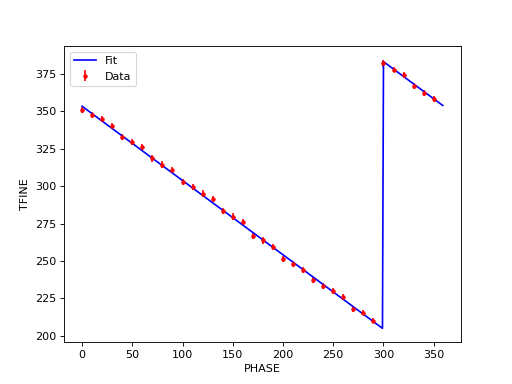

[-89.35871759 299.40383646 294.18343565]


<IPython.core.display.Javascript object>


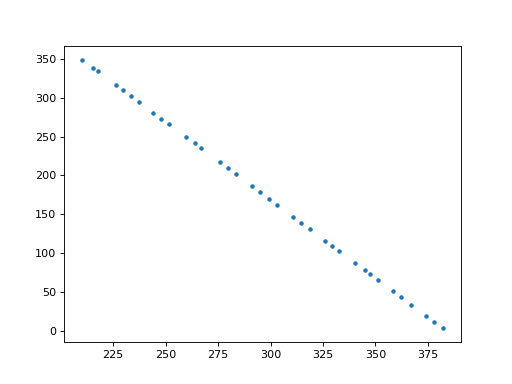

      channel_id  tac_id  phase          mu     sigma
0              0       0    0.0  368.695346  2.023334
1              0       0   10.0  365.723619  1.955928
2              0       0   20.0  362.750070  1.886087
3              0       0   30.0  358.690018  2.053492
4              0       0   40.0  351.108526  2.187838
...          ...     ...    ...         ...       ...
9195          63       3  310.0  227.337234  2.240845
9196          63       3  320.0  224.029061  1.790339
9197          63       3  330.0  218.190625  1.524154
9198          63       3  340.0  210.074561  1.293416
9199          63       3  350.0  208.711498  1.467294

[9200 rows x 5 columns]


In [175]:
channel = 0
tac     = 2
data = pd.read_hdf('/home/viherbos/DATA_daq/tfine_fitted_210705.h5',key='tfine')
gb,coeff = TPcal.TDC_fit(data,channel,tac,guess=[0,0,0], plot=True)
#res[channel*4+tac] = [ch,tc,coeff[0],coeff[1],coeff[2]]
#print(res[channel*4+tac])
print(coeff)
plt.figure()
print(data)
y=TPcal.sawtooth_inv_corr(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],*coeff)
plt.plot(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],y,'.')

In [ ]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset'])
storage = pd.HDFStore('/home/viherbos/DATA_daq/tfine_cal_asic2.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

# QDC CALIBRATION

In [31]:
filename = '/home/viherbos/DATA_daq/CAL_data/asic2_qdc_tpulse.h5'

In [ ]:
channel = 56
tac     = 2
phase   = 290

data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==phase]
data = np.mod(data['efine'] + 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
#if (np.std(data) < 0.8):
#    coeff = [1000,np.mean(data),np.std(data)]
#else:
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

# GAUSSIAN FITTING FOR EFINE DATA

In [32]:
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] + 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['channel_id','tac_id','tpulse','mu','sigma'])

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
0 0 0 0.0 0.0
Fitting Problems
0 0 10 0.0 0.0
Fitting Problems
0 0 20 0.0 0.0
Fitting Problems
0 0 30 0.0 0.0
Fitting Problems
0 0 40 31.242418081711804 0.0047893046081157456
Fitting Problems
0 0 50 114.97404412040373 0.027369265886792168
Fitting Problems
0 0 60 200.85517973761796 0.016471217151624692
Fitting Problems
0 0 70 271.64275207965983 0.02656516477736218
Fitting Problems
0 0 80 340.78445269747766 0.05090797290698935
Fitting Problems
0 0 90 408.37354500143243 0.0012213781504299766
Fitting Problems
0 0 100 475.30182663751765 0.1529712191623845
Fitting Problems
0 0 110 539.1978910925585 0.008255932807566752
Fitting Problems
0 0 120 597.88208654296 0.011223847778366308
Fitting Problems
0 0 130 650.0144922332175 0.11190124430913932
Fitting Problems
0 0 140 686.9195264783339 0.023433774889213194
Fitting Problems
0 0 150 708.9588461110536 0.06770840397754134
Fitting Problems
0 0 160 716.3039504382971 0.009466152274607486
Fitting Problems
0 0 170 718.3796642902053 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 2 160 716.6744660144445 0.00034647143152829313
Fitting Problems
0 2 170 718.2210062016534 0.052277807527907116
Fitting Problems
0 2 180 718.418110988869 0.017587432379141534
Fitting Problems
0 2 190 719.2361640754958 0.012625966573945283
Fitting Problems
0 2 200 719.0309704546182 0.03744671826350056
Fitting Problems
0 2 210 719.670516267375 0.0011839060838728613
Fitting Problems
0 2 220 719.7958360752289 0.0004158850189510345
Fitting Problems
0 2 230 719.962644616683 0.00013053128269132624
Fitting Problems
0 2 240 719.6010570941254 0.002441722931748856
Fitting Problems
0 2 250 719.1292904485381 0.01588104945138454
Fitting Problems
0 2 260 718.6798380823458 0.004613630073231986
Fitting Problems
0 2 270 718.9300238483081 0.0015794972772695363
Fitting Problems
0 2 280 718.909304119301 0.002377235388939218
Fitting Problems
0 2 290 719.3418690314929 0.004630771179507329
Fitting Problems
0 3 0 0.0 0.0
Fitting Problems
0 3 10 0.0 0.0
Fitting Problems
0 3 20 0.0 0.0
Fitting Problems
0 3 30 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 3 240 719.4727605850999 0.006993522727786289
Fitting Problems
0 3 250 718.5688439837185 0.01595743961832445
Fitting Problems
0 3 260 718.5274000188675 0.01073451553338673
Fitting Problems
0 3 270 718.856716629939 0.01762346267346326
Fitting Problems
0 3 280 718.9089048016822 0.002323784704304636
Fitting Problems
0 3 290 719.3232553030851 0.008725810791660358
Fitting Problems
1 0 0 0.0 0.0
Fitting Problems
1 0 10 0.0 0.0
Fitting Problems
1 0 20 0.0 0.0
Fitting Problems
1 0 30 0.0 0.0
Fitting Problems
1 0 40 17.82234608324293 1.2240601032172865e-05
Fitting Problems
1 0 50 71.39554185520743 0.05657091019807067
Fitting Problems
1 0 60 160.75715605858858 0.03334959875818868
Fitting Problems
1 0 70 234.41397146640574 0.018693307073075042
Fitting Problems
1 0 80 298.0180018647522 0.046996153716435805
Fitting Problems
1 0 90 361.6425609241971 0.07406531557672832
Fitting Problems
1 0 100 425.40484540783416 0.00446308691976146
Fitting Problems
1 0 110 486.47223167841946 0.01087783996899892
Fit

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 0 250 757.7037226973835 0.0123402542095321
Fitting Problems
1 0 260 757.8563210457515 0.06631856076642861
Fitting Problems
1 0 270 758.6366549962287 0.003952037546228514
Fitting Problems
1 0 280 758.7721587355181 0.011003550859991522
Fitting Problems
1 0 290 758.15382317865 0.07540205271642453
Fitting Problems
1 1 0 0.0 0.0
Fitting Problems
1 1 10 0.0 0.0
Fitting Problems
1 1 20 0.0 0.0
Fitting Problems
1 1 30 0.0 0.0
Fitting Problems
1 1 40 17.802361275504953 0.0009318432617032679
Fitting Problems
1 1 50 70.60519715967804 0.01813902602115682
Fitting Problems
1 1 60 160.46878840805746 0.02665873589447885
Fitting Problems
1 1 70 234.22697010061793 0.02560340734720042
Fitting Problems
1 1 80 298.1713640189215 0.023128933498790548
Fitting Problems
1 1 90 361.53087033223034 0.10190418622578971
Fitting Problems
1 1 100 425.55427968459014 0.1767775587076879
Fitting Problems
1 1 110 486.8437246254013 0.005149500402760676
Fitting Problems
1 1 120 547.511115974685 0.0013612791860011814
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
1 2 10 0.0 0.0
Fitting Problems
1 2 20 0.0 0.0
Fitting Problems
1 2 30 0.0 0.0
Fitting Problems
1 2 40 17.531880514638075 0.005156063755532461
Fitting Problems
1 2 50 70.498762022462 0.174245331844392
Fitting Problems
1 2 60 159.88361501655277 0.055249951722126156
Fitting Problems
1 2 70 233.5599369912092 0.003959424914486969
Fitting Problems
1 2 80 297.63314043186006 0.026946706144425472
Fitting Problems
1 2 90 360.97339228250206 0.024063005095527362
Fitting Problems
1 2 100 424.54145719785146 0.10222077952246406
Fitting Problems
1 2 110 485.6702192934096 0.004787540329872017
Fitting Problems
1 2 120 546.6236164082926 0.025602568706110895
Fitting Problems
1 2 130 604.1974593790709 0.04790317294103152
Fitting Problems
1 2 140 658.0864522782456 0.010157525347254092
Fitting Problems
1 2 150 701.9695228121814 0.03565902007002452
Fitting Problems
1 2 160 733.9175299400505 0.03346530274292724
Fitting Problems
1 2 170 749.8285984825367 0.18150395527987515
Fitting Problems
1 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 3 90 357.521715880901 0.04237325210087299
Fitting Problems
1 3 100 421.2862465025248 0.11120275624550663
Fitting Problems
1 3 110 481.86993004910164 0.0104784976938418
Fitting Problems
1 3 120 542.744336137041 0.010647001387964155
Fitting Problems
1 3 130 599.7716386321009 0.07484224714584367
Fitting Problems
1 3 140 654.4767738084327 0.31228832666435025
Fitting Problems
1 3 150 698.6037837997295 0.017621550738016602
Fitting Problems
1 3 160 731.4405750544498 0.014349933246406581
Fitting Problems
1 3 170 748.7594290905863 0.14484492673975902
Fitting Problems
1 3 180 755.1939332616552 0.014372791408242738
Fitting Problems
1 3 190 757.785132285172 0.010405633970637812
Fitting Problems
1 3 200 758.0553732395665 0.01909537694677189
Fitting Problems
1 3 210 757.9000909453176 0.05790776757888263
Fitting Problems
1 3 220 758.3289421637221 0.019028085967718645
Fitting Problems
1 3 230 758.5753083686459 0.019563010433678592
Fitting Problems
1 3 240 758.6000241912074 0.005256606337920283
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 0 90 377.8105196329217 0.057745164012837566
Fitting Problems
2 0 100 440.8468581454734 0.020084699086020934
Fitting Problems
2 0 110 503.251553291302 0.035416847088294255
Fitting Problems
2 0 120 562.7323726115558 0.03649658039655986
Fitting Problems
2 0 130 618.6052014637809 0.05490714549297078
Fitting Problems
2 0 140 667.3051426570072 0.13039735788695941
Fitting Problems
2 0 150 703.1750750405973 0.013309805332495057
Fitting Problems
Fitting Problems
2 0 160 720.5778173094855 0.03625028105966255
Fitting Problems
2 0 170 727.8571516534017 0.00629617351341534
Fitting Problems
2 0 180 729.603755157807 0.06945131565160852
Fitting Problems
2 0 190 729.8856447233862 0.021341013541674017
Fitting Problems
2 0 200 730.3548273889312 0.024354051179937584
Fitting Problems
2 0 210 730.1945359158963 0.026806228601011055
Fitting Problems
2 0 220 730.482084666626 0.006919515434083205
Fitting Problems
2 0 230 730.349257699109 0.030699590812906755
Fitting Problems
2 0 240 730.3325097262813 0.010056

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 1 130 618.7465586934371 0.12441983102430823
Fitting Problems
2 1 140 666.9432632792721 0.003639699551145549
Fitting Problems
2 1 150 703.0403169226727 0.012184290243881157
Fitting Problems
2 1 160 720.3488167183611 0.028218877773113472
Fitting Problems
2 1 170 727.683793809285 0.01893072175497843
Fitting Problems
2 1 180 729.4094288917837 0.05517069127091352
Fitting Problems
2 1 190 729.9142155707841 0.0406471688932517
Fitting Problems
2 1 200 730.1374677380941 0.03770529159346728
Fitting Problems
2 1 210 729.9283551535559 0.03966864391744542
Fitting Problems
2 1 220 730.2303797861138 0.06974434862584622
Fitting Problems
2 1 230 729.6719517415248 0.044561107704654206
Fitting Problems
2 1 240 730.0723113464696 0.032653957806800124
Fitting Problems
2 1 250 729.6402138314486 0.044320022115475165
Fitting Problems
2 1 260 729.3433010562178 0.03177427121470835
Fitting Problems
2 1 270 729.8197524205965 0.012102713726116909
Fitting Problems
2 1 280 729.3447430720449 0.04466339919237345
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 2 200 730.311270661725 0.028728070554468816
Fitting Problems
2 2 210 730.3697731099736 0.021730708504639127
Fitting Problems
2 2 220 730.2382971114689 0.04103415800789374
Fitting Problems
2 2 230 729.8439670851757 0.03609540566865323
Fitting Problems
2 2 240 730.2900130023197 0.012533612634958178
Fitting Problems
2 2 250 729.8118885602948 0.04937561638885274
Fitting Problems
2 2 260 729.6343282247216 0.04589046373619065
Fitting Problems
2 2 270 730.0108196257377 0.03595867171128496
Fitting Problems
2 2 280 729.329933252377 0.04298084320555152
Fitting Problems
2 2 290 730.162502149746 0.02429742959968044
Fitting Problems
2 3 0 0.0 0.0
Fitting Problems
2 3 10 0.0 0.0
Fitting Problems
2 3 20 0.0 0.0
Fitting Problems
2 3 30 0.0 0.0
Fitting Problems
2 3 40 20.52467507688358 0.02342217886301263
Fitting Problems
2 3 50 91.98498910268343 0.016717904210841406
Fitting Problems
2 3 60 176.28680196862584 0.03890142313098132
Fitting Problems
2 3 70 246.04029837333243 0.036833343048031826
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 3 240 729.546724060306 0.05860716598895669
Fitting Problems
2 3 250 729.5803110992962 0.05243777172291433
Fitting Problems
2 3 260 729.3118566463944 0.04815591200659777
Fitting Problems
2 3 270 730.4478068361138 0.024106005734033917
Fitting Problems
2 3 280 729.3250550267745 0.03824895579949742
Fitting Problems
2 3 290 729.9062829936117 0.015324435960424685
Fitting Problems
3 0 0 0.0 0.0
Fitting Problems
3 0 10 0.0 0.0
Fitting Problems
3 0 20 0.0 0.0
Fitting Problems
3 0 30 0.0 0.0
Fitting Problems
3 0 40 24.334864059780323 0.006287577931058752
Fitting Problems
3 0 50 96.54578542529505 0.002236392128839862
Fitting Problems
3 0 60 186.61775114721596 0.03366041710917346
Fitting Problems
3 0 70 254.6707893705 0.01635805271122171
Fitting Problems
3 0 80 318.56296081262224 0.04200509461380094
Fitting Problems
3 0 90 382.25583031541436 0.003226009457158895
Fitting Problems
3 0 100 444.7754571298843 0.016472165180550905
Fitting Problems
3 0 110 504.7182000655103 0.05276643280588183
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
3 0 250 682.4508136798171 0.0059699392520301195
Fitting Problems
3 0 260 682.4969825585047 0.006407376347367379
Fitting Problems
3 0 270 682.9673102226798 5.711903479751686e-05
Fitting Problems
3 0 280 682.6962804147471 0.0020478481290939765
Fitting Problems
3 0 290 681.6085745633053 0.014943890237363115
Fitting Problems
3 1 0 0.0 0.0
Fitting Problems
3 1 10 0.0 0.0
Fitting Problems
3 1 20 0.0 0.0
Fitting Problems
3 1 30 0.0 0.0
Fitting Problems
3 1 40 24.068451317648442 0.0005555448041868091
Fitting Problems
3 1 50 95.25680427803742 0.008140286740324739
Fitting Problems
3 1 60 186.20676260619823 0.03677283195084435
Fitting Problems
3 1 70 254.91263084896482 0.02149285051450775
Fitting Problems
3 1 80 318.65119690128785 0.04533972755365724
Fitting Problems
3 1 90 382.3751423630001 0.1442916436519232
Fitting Problems
3 1 100 444.4521667540049 0.12603817495556519
Fitting Problems
3 1 110 504.2800497968127 0.09432241461045142
Fitting Problems
3 1 120 560.1692396613425 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 2 40 24.288723065975585 0.0006915292397253829
Fitting Problems
3 2 50 94.35228071796075 0.08319078029866042
Fitting Problems
3 2 60 185.6085085615773 0.02353911208645735
Fitting Problems
3 2 70 254.3362743152317 0.0462687075389576
Fitting Problems
3 2 80 317.95307799885234 0.03864202033673198
Fitting Problems
3 2 90 381.95672680432074 0.1283780461025866
Fitting Problems
3 2 100 443.8766323617888 0.029723412925205257
Fitting Problems
3 2 110 503.78135378378056 0.0721767840935097
Fitting Problems
3 2 120 559.8246781352624 0.034412787355291324
Fitting Problems
3 2 130 610.1248048320864 0.010202454927029734
Fitting Problems
3 2 140 649.6418944745743 0.00748694049475204
Fitting Problems
3 2 150 670.7649567253522 0.007626541692178511
Fitting Problems
3 2 160 679.1817989247869 0.015313361599507427
Fitting Problems
3 2 170 681.5598235185522 0.00010286627287734446
Fitting Problems
3 2 180 681.3750413299585 0.01329281161858185
Fitting Problems
3 2 190 681.7409045247691 0.0002277716679438483
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 3 110 499.9274559953939 0.07614774720671594
Fitting Problems
3 3 120 555.2876874350288 0.02087544276593093
Fitting Problems
3 3 130 606.6556717959791 0.06972746715387913
Fitting Problems
3 3 140 646.6636216445029 0.03373309264393231
Fitting Problems
3 3 150 669.9499016171935 0.02858282951224315
Fitting Problems
3 3 160 678.4666901863272 0.009480759170613983
Fitting Problems
3 3 170 681.6298487501602 0.0010849440598071295
Fitting Problems
3 3 180 681.9692326030315 8.5289063923769e-05
Fitting Problems
3 3 190 681.9042556349825 0.0002668046542530987
Fitting Problems
3 3 200 681.720370569561 0.00161557975922203
Fitting Problems
3 3 210 682.2607004039027 0.009395480401968992
Fitting Problems
3 3 220 681.7843487157213 0.02221160002237734
Fitting Problems
3 3 230 682.5251273505365 0.002550488614377609
Fitting Problems
3 3 240 682.5546380176769 0.0036277579900922214
Fitting Problems
3 3 250 682.7083950712346 0.002431868777037301
Fitting Problems
3 3 260 682.8250866005317 0.001177555754593240

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 0 120 549.66638136575 0.017456100475214547
Fitting Problems
4 0 130 599.0513542191184 0.004579326301306792
Fitting Problems
4 0 140 638.2686670770446 0.021721025220511444
Fitting Problems
4 0 150 662.6722975753763 0.009643787692782036
Fitting Problems
4 0 160 670.509083785624 0.011958064770483747
Fitting Problems
4 0 170 673.2908197632495 0.008436723310293335
Fitting Problems
4 0 180 674.4055607980072 0.017507105106043485
Fitting Problems
4 0 190 673.5426148404568 0.022028907470421365
Fitting Problems
4 0 200 674.5092367729499 0.021415438310870834
Fitting Problems
4 0 210 675.1712845839085 0.027001464984697205
Fitting Problems
4 0 220 674.4099319728301 0.02004323111466952
Fitting Problems
4 0 230 674.1295727597594 0.04593476041020395
Fitting Problems
4 0 240 674.2094081615045 0.023293076167984855
Fitting Problems
4 0 250 673.6065197144176 0.013567411971986158
Fitting Problems
4 0 260 674.6650043908679 0.005688555911774955
Fitting Problems
4 0 270 674.5330217195657 0.01576089717006264

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 1 190 673.454658080108 0.020589597018668217
Fitting Problems
4 1 200 674.1352610845853 0.07622138768085049
Fitting Problems
4 1 210 675.0643687681835 0.027292277841670758
Fitting Problems
4 1 220 674.3677939251244 0.021263538471667905
Fitting Problems
4 1 230 673.9923750866236 0.04100554939627101
Fitting Problems
4 1 240 673.9473622404774 0.016975441325541785
Fitting Problems
4 1 250 673.4887038427697 0.017416803245584284
Fitting Problems
4 1 260 674.5227999938536 0.00763150326058815
Fitting Problems
4 1 270 674.3524355489068 0.03119925735657432
Fitting Problems
4 1 280 674.0451239650106 0.04246187731342967
Fitting Problems
4 1 290 674.1446344119688 0.02475222111992911
Fitting Problems
4 2 0 0.0 0.0
Fitting Problems
4 2 10 0.0 0.0
Fitting Problems
4 2 20 0.0 0.0
Fitting Problems
4 2 30 0.0 0.0
Fitting Problems
4 2 40 32.14082501825194 0.002375779387066138
Fitting Problems
4 2 50 105.81250434841081 0.025528538027954698
Fitting Problems
4 2 60 182.86307424763595 0.0028592754495364307
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 2 260 674.7465869131975 0.004682830816223041
Fitting Problems
4 2 270 674.5881312163679 0.016592199704080476
Fitting Problems
4 2 280 674.2756074577154 0.03725207666561083
Fitting Problems
4 2 290 674.3804041292325 0.01498987987370619
Fitting Problems
4 3 0 0.0 0.0
Fitting Problems
4 3 10 0.0 0.0
Fitting Problems
4 3 20 0.0 0.0
Fitting Problems
4 3 30 0.0 0.0
Fitting Problems
4 3 40 30.859629355711583 0.00024151423890890437
Fitting Problems
4 3 50 103.29779400369833 0.008087371988110707
Fitting Problems
4 3 60 180.47813030728136 0.13206011688934466
Fitting Problems
4 3 70 245.2668789929133 0.015363389743685998
Fitting Problems
4 3 80 306.96662522848965 0.07242289645637043
Fitting Problems
4 3 90 369.09492014863633 0.10767249568150668
Fitting Problems
4 3 100 429.8311445011528 0.004275466944948919
Fitting Problems
4 3 110 488.93269970525836 0.01372230129206652
Fitting Problems
4 3 120 544.8396910615911 0.01764255002183608
Fitting Problems
4 3 130 595.202549758646 0.007225965463527867


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
5 0 0 0.0 0.0
Fitting Problems
5 0 10 0.0 0.0
Fitting Problems
5 0 20 0.0 0.0
Fitting Problems
5 0 30 0.0 0.0
Fitting Problems
5 0 40 7.356116199265628 0.0195417962009036
Fitting Problems
5 0 50 52.05024002244036 0.004408047670226086
Fitting Problems
5 0 60 126.60445974058399 0.17764903506276314
Fitting Problems
5 0 70 195.24949012122255 0.02285920858364528
Fitting Problems
5 0 80 252.04413731540797 0.03990361613219834
Fitting Problems
5 0 90 305.4680400968878 0.09848541923158693
Fitting Problems
5 0 100 358.1038888978841 0.000954170526370968
Fitting Problems
5 0 110 412.4433022766866 0.08334332575191246
Fitting Problems
5 0 120 465.4503770137564 0.18737981770609718
Fitting Problems
5 0 130 513.8581799337674 0.00045617761486324256
Fitting Problems
5 0 140 559.7397503781777 0.06981667110676175
Fitting Problems
5 0 150 600.3415049585905 0.0043054885841491254
Fitting Problems
5 0 160 632.7766249459389 0.12350460247528174
Fitting Problems
5 0 170 651.8928522114009 0.004318

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

5 2 190 663.4111275225692 0.03626838804589865
Fitting Problems
5 2 200 663.438403914651 0.12654655088822825
Fitting Problems
5 2 210 663.998063361166 0.10145251565065273
Fitting Problems
5 2 220 663.6072135726184 0.034098556699093285
Fitting Problems
5 2 230 663.9213294153418 0.10731059325820494
Fitting Problems
5 2 240 664.6172678804261 0.014008532161685834
Fitting Problems
5 2 250 664.3723567834213 0.011543405415951006
Fitting Problems
5 2 260 664.4747720442302 0.02754029647333094
Fitting Problems
5 2 270 664.157539085723 0.052635169022583556
Fitting Problems
5 2 280 664.7540682719086 0.011355804389551341
Fitting Problems
5 2 290 664.5226915063201 0.030110168325968464
Fitting Problems
5 3 0 0.0 0.0
Fitting Problems
5 3 10 0.0 0.0
Fitting Problems
5 3 20 0.0 0.0
Fitting Problems
5 3 30 0.0 0.0
Fitting Problems
5 3 40 6.607008413039768 0.004849441285613247
Fitting Problems
5 3 50 50.31397989589102 0.19583945505311465
Fitting Problems
5 3 60 122.95531743316047 0.0590869053443449
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

5 3 260 665.0495166216855 0.0027530239377649085
Fitting Problems
5 3 270 664.126903349188 0.0474826822972147
Fitting Problems
5 3 280 664.1467600392957 0.01075879293006543
Fitting Problems
5 3 290 664.8403064282741 0.020847148265716237
Fitting Problems
6 0 0 0.0 0.0
Fitting Problems
6 0 10 0.0 0.0
Fitting Problems
6 0 20 0.0 0.0
Fitting Problems
6 0 30 0.0 0.0
Fitting Problems
6 0 40 8.596709235603345 0.002662014188643022
Fitting Problems
6 0 50 64.14483048651614 0.046537043483921375
Fitting Problems
6 0 60 150.6192859907809 0.023529858344475057
Fitting Problems
6 0 70 221.53666740974356 0.010856454411840518
Fitting Problems
6 0 80 284.3567482162902 0.0026822704111603094
Fitting Problems
6 0 90 346.27102408129736 0.08438176638451592
Fitting Problems
6 0 100 407.49115672862865 0.0031613939407239048
Fitting Problems
6 0 110 469.4802893905875 0.16660793899401988
Fitting Problems
6 0 120 527.9100379469747 0.0026909753833618344
Fitting Problems
6 0 130 584.7821510971063 0.011199329743039147

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
6 0 270 727.1318667460326 0.019405606883038214
Fitting Problems
6 0 280 726.653414803833 0.003690496177137917
Fitting Problems
6 0 290 726.432758493446 0.004287561997633621
Fitting Problems
6 1 0 0.0 0.0
Fitting Problems
6 1 10 0.0 0.0
Fitting Problems
6 1 20 0.0 0.0
Fitting Problems
6 1 30 0.0 0.0
Fitting Problems
6 1 40 8.534848356390793 0.005073018882090709
Fitting Problems
6 1 50 64.10084954585774 0.001532627587113899
Fitting Problems
6 1 60 150.4183238400489 0.02824645652255612
Fitting Problems
6 1 70 221.39574556355328 0.00837192853867508
Fitting Problems
6 1 80 284.5504026148214 0.0963494848656115
Fitting Problems
6 1 90 346.56591213657975 0.048705423823480296
Fitting Problems
6 1 100 407.9837321230011 0.15096997673006113
Fitting Problems
6 1 110 468.6546254388497 0.012452028868507912
Fitting Problems
6 1 120 527.2743838365244 0.023134626525564587
Fitting Problems
6 1 130 584.0154077317961 0.038833580553212316
Fitting Problems
6 1 140 634.5319462415999 0.0025911

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

6 2 60 149.83645804837846 0.033053163731576095
Fitting Problems
6 2 70 220.7718497242002 0.0036511491798587327
Fitting Problems
6 2 80 284.2257762778045 0.022877052684816365
Fitting Problems
6 2 90 345.4335197449988 0.05479302467304292
Fitting Problems
6 2 100 407.0149287723416 0.007262830019521785
Fitting Problems
6 2 110 468.4968030696522 0.13477540574135033
Fitting Problems
6 2 120 526.892081861185 0.02185485182426965
Fitting Problems
6 2 130 583.8407072974976 0.007281536491522311
Fitting Problems
6 2 140 633.7071170638761 0.007789773196947159
Fitting Problems
6 2 150 676.5842723205749 0.08716066732250859
Fitting Problems
6 2 160 706.4276143483784 0.03206723023628591
Fitting Problems
6 2 170 719.2299228497174 0.009519788041526842
Fitting Problems
6 2 180 724.3579170116501 0.013102786016647345
Fitting Problems
6 2 190 725.5890810867102 0.014151835364602955
Fitting Problems
6 2 200 726.3677450259823 0.014426078172122535
Fitting Problems
6 2 210 726.2006279589248 0.019009245518517393
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 3 120 522.408368784485 0.014678038890983965
Fitting Problems
6 3 130 578.8906754845308 0.0205551988398513
Fitting Problems
6 3 140 630.0941118404996 0.22940212943970673
Fitting Problems
6 3 150 672.6928926483077 0.01000673793906044
Fitting Problems
6 3 160 704.3335096392697 0.1493307935584007
Fitting Problems
6 3 170 718.474400297624 0.0696581259039962
Fitting Problems
6 3 180 724.5219741965554 0.009788723569368909
Fitting Problems
6 3 190 725.9930767057381 0.011103606287782447
Fitting Problems
6 3 200 726.4551454756861 0.013102520833158708
Fitting Problems
6 3 210 726.2037663487082 0.009309602769429154
Fitting Problems
6 3 220 726.4899174592562 0.013518197887512748
Fitting Problems
6 3 230 726.10192540355 0.0037793556232360638
Fitting Problems
6 3 240 726.3909910938833 0.014931544831650862
Fitting Problems
6 3 250 726.2579426655707 0.004330669282368796
Fitting Problems
6 3 260 726.4610260710675 0.007447903069471492
Fitting Problems
6 3 270 727.0154219328467 0.022884830065304635
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 30 4.313175867956744 4.313175867956744
Fitting Problems
7 0 40 69.10006218273325 7.037773928767872e-05
Fitting Problems
7 0 50 176.58239367301286 0.035107593344727184
Fitting Problems
7 0 60 258.1922607168362 0.011550607610759066
Fitting Problems
7 0 70 334.87585734017387 0.004608659305487551
Fitting Problems
7 0 80 411.6604727187847 0.01358746589345102
Fitting Problems
7 0 90 487.41675101506024 0.0049705393525148675
Fitting Problems
7 0 100 558.1833066011393 0.0021856386617823817
Fitting Problems
7 0 110 623.6097753123938 0.00494832107555511
Fitting Problems
7 0 120 676.1656508240432 0.014312554251508514
Fitting Problems
7 0 130 710.0654496538556 0.005221444569405668
Fitting Problems
7 0 140 724.0682700389748 0.0009986659562075788
Fitting Problems
7 0 150 727.7109

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

7 0 290 728.982798817277 7.310605435725298e-05
Fitting Problems
7 1 0 0.0 0.0
Fitting Problems
7 1 10 0.0 0.0
Fitting Problems
7 1 20 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 30 4.172310756972111 4.172310756972111
Fitting Problems
7 1 40 69.46569952428784 0.01593022392223897
Fitting Problems
7 1 50 176.12901859619097 0.03507375526113099
Fitting Problems
7 1 60 257.74501365128344 0.03274886025216441
Fitting Problems
7 1 70 335.01634900526403 0.002648030068059639
Fitting Problems
7 1 80 411.2222329032128 0.14111904319375262
Fitting Problems
7 1 90 486.3569929317689 0.006092849303881251
Fitting Problems
7 1 100 556.7517585680969 0.035444769183139005
Fitting Problems
7 1 110 622.876324529666 0.04226281811679277
Fitting Problems
7 1 120 676.3405845951775 0.033254462880634404
Fitting Pr

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GI

Fitting Problems
7 1 160 727.6796521733154 0.007706050459140249
Fitting Problems
7 1 170 727.3958645473631 0.05604863228966446
Fitting Problems
7 1 180 728.4557140417038 0.0037891081295293367
Fitting Problems
7 1 190 727.7049838173489 0.043352251600600446
Fitting Problems
7 1 200 728.8688933802651 0.00014332204236196046
Fitting Problems
7 1 210 728.7420295611468 0.0015501928783854008
Fitting Problems
7 1 220 729.0693315026097 0.006339028243636235
Fitting Problems
7 1 230 728.823944136381 0.0010493581444505746
Fitting Problems
7 1 240 728.1834552280084 0.014364736397616366
Fitting Problems
7 1 250 728.6333784927783 0.000639009263469434
Fitting Problems
7 1 260 728.2349950579128 0.015133871219289191
Fitting Problems
7 1 270 728.552124922317 0.003967109243785338
Fitting Problems
7 1 280 728.6448511562334 0.0008665774107355634
Fitting Problems
7 1 290 728.6668783393592 0.0019737682375043225
Fitting Problems
7 2 0 0.0 0.0
Fitting Problems
7 2 10 0.0 0.0
Fitting Problems
7 2 20 0.0 0.0
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

Fitting Problems
Fitting Problems
7 2 30 4.091193626404894 4.091193626404894
Fitting Problems
7 2 40 68.8331517124325 0.009804100389210759
Fitting Problems
7 2 50 175.29034140974414 0.005624958005287423
Fitting Problems
7 2 60 257.3712955845526 0.005631400322605245
Fitting Problems
7 2 70 333.9169711462564 0.0029388864482939293
Fitting Problems
7 2 80 410.63697623251824 0.10021839133440827
Fitting Problems
7 2 90 485.82941874849934 0.0035489704273915603
Fitting Problems
7 2 100 556.422957336709 0.02054363384316667
Fitting Problems
7 2 110 622.9090883397131 0.003197289069070606
Fitting Problems
7 2 120 675.6778995724814 0.13543129760030787
Fitting Problems
7 2 130 710.0210437366544 0.005098522911520053
Fitting Problems
7 2 140 723.6619608976384 0.0024126898730718912
Fitting Problems
7 2 150 727.4491155961144 0.0003284975123042042
Fitting Problems
7 2 160 728.287301803585 0.00033392284594126463
Fitting Problems
7 2 170 727.6113496993901 0.07315239093763971
Fitting Problems
7 2 180 728.65

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

7 3 30 3.9906934535286855 219145.24873822962
Fitting Problems
7 3 40 65.55468580914447 0.026560749776333888
Fitting Problems
7 3 50 172.87640799850323 0.0012608091126312076
Fitting Problems
7 3 60 254.44893879881477 0.0029026867357667225
Fitting Problems
7 3 70 331.26620305743575 0.0037136677777992225
Fitting Problems
7 3 80 406.66896020956295 0.0807246588212726
Fitting Problems
7 3 90 481.84375529568644 0.010133296195090263
Fitting Problems
7 3 100 552.1969494005576 0.015218772067448753
Fitting Problems
7 3 110 618.4495750669589 0.0024751379605292886
Fitting Problems
7 3 120 673.0233023319162 0.023190695372587358
Fitting Problems
7 3 130 707.845709509261 0.038266412320888295
Fitting Problems
7 3 140 722.5072245317867 0.025387029198588026
Fitting Problems
7 3 150 727.2832980620899 0.003814727927223794
Fitting Problems
7 3 160 728.3044640199075 0.0023275529993631596
Fitting Problems
7 3 170 727.6280096833821 0.05723721967727769
Fitting Problems
7 3 180 728.6441365948115 0.00174849597214

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
8 0 30 0.0 0.0
Fitting Problems
8 0 40 24.562913757240608 0.034724781023138175
Fitting Problems
8 0 50 108.84668516753526 0.03725435951111499
Fitting Problems
8 0 60 191.1569206098362 0.0012004764248179573
Fitting Problems
8 0 70 259.399362140827 0.08897957688974457
Fitting Problems
8 0 80 326.7012938448305 0.003916023709417012
Fitting Problems
8 0 90 392.3917615841148 0.01967577137429701
Fitting Problems
8 0 100 457.48324073077185 0.013677522513011653
Fitting Problems
8 0 110 519.84166894548 0.09156081804295267
Fitting Problems
8 0 120 576.6684669967475 0.0015829462887038289
Fitting Problems
8 0 130 626.5340734190031 0.012509620924038463
Fitting Problems
8 0 140 664.0017126011988 0.003943923783253599
Fitting Problems
8 0 150 683.0714238660192 0.20809343388812301
Fitting Problems
8 0 160 688.8534913029753 0.01289831264420811
Fitting Problems
8 0 170 689.4387482202701 0.019075099990266377
Fitting Problems
8 0 180 689.5671917233312 0.02197455880622866
Fitting Problems
8 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 1 70 259.58965393684355 0.04462974226003172
Fitting Problems
8 1 80 326.1114949704169 7.923711396852361e-05
Fitting Problems
8 1 90 391.89580621641574 0.003750216740546453
Fitting Problems
8 1 100 456.1592026663727 0.014082007686270171
Fitting Problems
8 1 110 518.8974962156484 0.061807730453666936
Fitting Problems
8 1 120 575.9171126539838 0.019030914454659913
Fitting Problems
8 1 130 626.3021194694044 0.01268722192779694
Fitting Problems
8 1 140 663.6797511196336 0.01765338452341288
Fitting Problems
8 1 150 681.967038071602 0.18920256331666402
Fitting Problems
8 1 160 688.5972775779992 0.0061989785885361495
Fitting Problems
8 1 170 689.3218038261857 0.011697930018715164
Fitting Problems
8 1 180 690.0275330468847 0.03624544596098362
Fitting Problems
8 1 190 690.4587411390372 0.01801219568208048
Fitting Problems
8 1 200 690.1179317455259 0.021410844071837645
Fitting Problems
8 1 210 691.0534905656643 0.02549575898582854
Fitting Problems
8 1 220 691.133458780951 0.03514055805628716
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 2 110 518.3996198506062 0.021803606098700835
Fitting Problems
8 2 120 575.5487110240207 0.04161796815622668
Fitting Problems
8 2 130 625.505951442741 0.009636669640121167
Fitting Problems
8 2 140 663.5737973146177 0.04449089930253836
Fitting Problems
8 2 150 682.1963924649683 0.17834957067864762
Fitting Problems
8 2 160 688.4048254258811 0.008972565151189035
Fitting Problems
8 2 170 689.4975310800148 0.019719973040395303
Fitting Problems
8 2 180 689.6633933634181 0.030689365219403866
Fitting Problems
8 2 190 691.1808227543914 0.02471833764132433
Fitting Problems
8 2 200 691.0256286161307 0.000751578911385467
Fitting Problems
8 2 210 691.2966999515112 0.01446281935386117
Fitting Problems
8 2 220 691.3223271739828 0.007532077866773278
Fitting Problems
8 2 230 691.2024355019851 0.019843743412818346
Fitting Problems
8 2 240 691.290488971669 0.02928465193528632
Fitting Problems
8 2 250 691.2985417820702 0.009906702326512183
Fitting Problems
8 2 260 691.5414038947944 0.0018413282729397836


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 3 160 688.4041561971592 0.011210489148950776
Fitting Problems
8 3 170 689.3529589123568 0.019931683249797078
Fitting Problems
8 3 180 690.1673901627651 0.024936824725284835
Fitting Problems
8 3 190 690.5479954652556 0.018190054043051015
Fitting Problems
8 3 200 690.4100946619436 0.028367718375271255
Fitting Problems
8 3 210 691.1474063474508 0.01943950048276651
Fitting Problems
8 3 220 691.2199587940054 0.019974560653374857
Fitting Problems
8 3 230 691.143269482865 0.00029640187604978595
Fitting Problems
8 3 240 691.283469951671 0.011236735096099204
Fitting Problems
8 3 250 691.1975658504583 0.018293870382560355
Fitting Problems
8 3 260 691.3788488257676 0.0018068054910616435
Fitting Problems
8 3 270 691.3069486138785 0.0057111506910005865
Fitting Problems
8 3 280 691.3776720323004 0.005342928003036348
Fitting Problems
8 3 290 691.1196517725931 0.021603966379916906
Fitting Problems
9 0 0 0.0 0.0
Fitting Problems
9 0 10 0.0 0.0
Fitting Problems
9 0 20 0.0 0.0
Fitting Problems
9 0 30 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 0 170 735.8752054010945 0.0017825042786357669
Fitting Problems
9 0 180 737.7833319056047 0.0001377057901577277
Fitting Problems
9 0 190 737.7972211622994 0.0003083877691900553
Fitting Problems
9 0 200 738.1066972504643 0.008233507024288088
Fitting Problems
9 0 210 737.798289490172 0.0001986871709762931
Fitting Problems
9 0 220 737.5473429819149 0.0018464199709111642
Fitting Problems
9 0 230 737.6628786701868 0.003894559343650751
Fitting Problems
9 0 240 737.9947945283038 0.0003828025870680211
Fitting Problems
9 0 250 738.059130527358 0.00014450259097003156
Fitting Problems
9 0 260 737.9264094668094 0.000209680911067059
Fitting Problems
9 0 270 738.2743697528953 0.003729911621852815
Fitting Problems
9 0 280 738.3788953364752 0.0006508413509067124
Fitting Problems
9 0 290 738.1856654230837 0.005931081578967127
Fitting Problems
9 1 0 0.0 0.0
Fitting Problems
9 1 10 0.0 0.0
Fitting Problems
9 1 20 0.0 0.0
Fitting Problems
9 1 30 0.0 0.0
Fitting Problems
9 1 40 17.387485706490292 0.000187

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

9 1 260 737.7089424412975 0.0005047842343527631
Fitting Problems
9 1 270 737.4711818106011 0.0025671026108800327
Fitting Problems
9 1 280 737.9962299641944 1.780795795804677e-05
Fitting Problems
9 1 290 737.4454529556048 0.000593986403108397
Fitting Problems
9 2 0 0.0 0.0
Fitting Problems
9 2 10 0.0 0.0
Fitting Problems
9 2 20 0.0 0.0
Fitting Problems
9 2 30 0.0 0.0
Fitting Problems
9 2 40 16.785971803422324 0.00018013902841845607
Fitting Problems
9 2 50 82.72451747560345 0.005629420507152771
Fitting Problems
9 2 60 181.66496715666685 0.0008407710629914783
Fitting Problems
9 2 70 255.71535576747152 0.0062509613301222015
Fitting Problems
9 2 80 324.6095492618306 0.023016338822957776
Fitting Problems
9 2 90 391.17234053738764 0.07105469064090546
Fitting Problems
9 2 100 457.64228522744014 0.12176914066855694
Fitting Problems
9 2 110 522.5167923783365 0.08685232767474366
Fitting Problems
9 2 120 582.8170292515321 0.02746807843427463
Fitting Problems
9 2 130 638.522154179319 0.060342328921

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 40 15.933428367783321 15.933428367783321
Fitting Problems
9 3 50 79.34296128943974 0.013839362240375193
Fitting Problems
9 3 60 177.79673271471353 0.005123132836976218
Fitting Problems
9 3 70 253.43706990739156 0.006613016123919419
Fitting Problems
9 3 80 322.12658220475004 0.039547200170478705
Fitting Problems
9 3 90 387.65211933905834 0.08827042627511122
Fitting Problems
9 3 100 454.0857990671304 0.01249268171636018
Fitting Problems
9 3 110 518.1207196612825 0.03804327196305464
Fitting Problems
9 3 120 579.245868027089 0.012734123910997801
Fitting Problems
9 3 130 634.3602182605932 0.018096918650659377
Fitting Problems
9 3 140 682.5914541967853 0.021487220246772114
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 3 210 737.4770094540756 0.0012105145505605665
Fitting Problems
9 3 220 737.7852402559273 0.00011476799700219184
Fitting Problems
9 3 230 737.9209095973662 0.0001778250581498498
Fitting Problems
9 3 240 737.33586227238 0.002166416136159331
Fitting Problems
9 3 250 737.7238082626493 0.0009642991977649783
Fitting Problems
9 3 260 737.7315850208989 0.0004914930121391896
Fitting Problems
9 3 270 737.9792954807563 0.0014398871796700386
Fitting Problems
9 3 280 737.9936522893037 0.0003524691587890725
Fitting Problems
9 3 290 737.412657941446 0.0003809138564479887
Fitting Problems
10 0 0 0.0 0.0
Fitting Problems
10 0 10 0.0 0.0
Fitting Problems
10 0 20 0.0 0.0
Fitting Problems
10 0 30 0.0 0.0
Fitting Problems
10 0 40 9.255838731639335 0.0037207278880720452
Fitting Problems
10 0 50 76.77081194072859 0.045291394517621854
Fitting Problems
10 0 60 160.10817323378785 0.031163313589041407
Fitting Problems
10 0 70 226.39477603709608 0.010595595233279933
Fitting Problems
10 0 80 290.130829536769 0.1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
10 0 220 689.8517164471342 0.001996703376953777
Fitting Problems
10 0 230 689.3990551896369 0.0035064369916328916
Fitting Problems
10 0 240 689.5609351788146 0.0008273930327838649
Fitting Problems
10 0 250 689.7906341908283 7.543067766860171e-05
Fitting Problems
10 0 260 689.178375376547 0.008670989968380192
Fitting Problems
10 0 270 689.4812912205613 0.013148017802909445
Fitting Problems
10 0 280 689.9948033957821 0.0002326893529522934
Fitting Problems
10 0 290 689.3621148455597 0.005940719004241924
Fitting Problems
10 1 0 0.0 0.0
Fitting Problems
10 1 10 0.0 0.0
Fitting Problems
10 1 20 0.0 0.0
Fitting Problems
10 1 30 0.0 0.0
Fitting Problems
10 1 40 9.462566560475887 0.00019145313994484647
Fitting Problems
10 1 50 76.2516259343811 0.048775463308318424
Fitting Problems
10 1 60 160.04127877398824 0.00950800036001485
Fitting Problems
10 1 70 225.5951875573606 0.013590600967227773
Fitting Problems
10 1 80 288.9001455715604 0.00683934107910598
Fitting Problems
10 1 90 3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 1 280 689.5045156907297 0.0066269222280632735
Fitting Problems
10 1 290 689.3870542146371 0.0015318679663196394
Fitting Problems
10 2 0 0.0 0.0
Fitting Problems
10 2 10 0.0 0.0
Fitting Problems
10 2 20 0.0 0.0
Fitting Problems
10 2 30 0.0 0.0
Fitting Problems
10 2 40 8.593351069914295 0.005258520701370316
Fitting Problems
10 2 50 75.3867291107197 0.07812308983173462
Fitting Problems
10 2 60 159.21108775141923 0.07119355463069511
Fitting Problems
10 2 70 224.70729944037865 0.014345486993268658
Fitting Problems
10 2 80 288.5472797839963 0.005248358405052618
Fitting Problems
10 2 90 350.15736937427613 0.046663492081544855
Fitting Problems
10 2 100 413.20660267461653 0.007348838826055231
Fitting Problems
10 2 110 472.61946185428855 0.13663260790642598
Fitting Problems
10 2 120 530.756339039416 0.04363796751378206
Fitting Problems
10 2 130 581.7739945783408 0.015059214021109487
Fitting Problems
10 2 140 628.6037377982511 0.030087431622268342
Fitting Problems
10 2 150 662.9970074845991 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 3 50 72.97698586978964 0.07390315040869294
Fitting Problems
10 3 60 156.1017079518571 0.03351246597494738
Fitting Problems
10 3 70 222.10978158143445 0.019421121980425886
Fitting Problems
10 3 80 285.9434465643469 0.23319246819487868
Fitting Problems
10 3 90 346.3341407396365 0.044253241909061686
Fitting Problems
10 3 100 409.5500021701207 0.22035480735985183
Fitting Problems
10 3 110 468.7728648408108 0.011590541037716862
Fitting Problems
10 3 120 525.9396893673705 0.01240362330512584
Fitting Problems
10 3 130 578.0354820939244 0.0011687919229681114
Fitting Problems
10 3 140 624.5316335779218 0.01661367226804132
Fitting Problems
10 3 150 660.7002080431749 0.004142866594413439
Fitting Problems
10 3 160 677.6554904330214 0.07842954133325385
Fitting Problems
10 3 170 685.5351729958045 0.01143776161523699
Fitting Problems
10 3 180 687.6777001350071 0.015018675318352501
Fitting Problems
10 3 190 688.6503041862372 0.0027809510298581913
Fitting Problems
10 3 200 689.2490963044745 0.008372

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 0 60 82.19265234695735 0.027866862805405245
Fitting Problems
Fitting Problems
11 0 70 155.71101762980186 0.009891988518995615
Fitting Problems
11 0 80 212.60709563580303 0.011378459403679427
Fitting Problems
11 0 90 265.8207206879618 0.012204585392472172
Fitting Problems
11 0 100 316.9663833729783 0.028341737271289198
Fitting Problems
11 0 110 367.2374617257216 0.044270043980199396
Fitting Problems
11 0 120 417.46648360106207 0.04256230846296798
Fitting Problems
11 0 130 467.41137356388595 0.007817941985580303
Fitting Problems
11 0 140 514.7462276943553 0.04618100306939316
Fitting Problems
11 0 150 559.3324857441719 0.017159260983985736
Fitting Problems
11 0 160 600.1266260819108 0.018235123830384697
Fitting Problems
11 0 170 635.3608031287847 0.02714226522123634
Fitting Problems
11 0 180 658.5775463699805 0.017546648464814817
Fitting Problems
11 0 190 671.8507523427636 0.013443574069242676
Fitting Problems
11 0 200 676.4825083156097 0.0005833559056365698
Fitting Problems
11 0 210 6

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 1 110 366.76508554619795 0.0334593444095981
Fitting Problems
11 1 120 417.67287756816074 0.01412724518789377
Fitting Problems
11 1 130 466.7925407886263 0.06520986876542215
Fitting Problems
11 1 140 514.3895991294789 0.09700374226404238
Fitting Problems
11 1 150 558.7745031580499 0.013292479321203188
Fitting Problems
11 1 160 600.2984163673328 0.19547464879494178
Fitting Problems
11 1 170 634.1429310482912 0.010949871246111928
Fitting Problems
11 1 180 658.6023875015537 0.06387284935757684
Fitting Problems
11 1 190 670.7079553520379 0.06258216818421093
Fitting Problems
11 1 200 675.568126014654 0.007081268521251864
Fitting Problems
11 1 210 677.7892144953389 0.0035240668903950053
Fitting Problems
11 1 220 678.3338472637528 0.0011337706089115868
Fitting Problems
11 1 230 678.7957888866276 0.0005247856849342871
Fitting Problems
11 1 240 678.572368532124 0.003451935071893746
Fitting Problems
11 1 250 678.6307348673673 0.005919852792242314
Fitting Problems
11 1 260 678.5292468146456 0.0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

11 2 170 634.1380499809659 0.008052036850301111
Fitting Problems
11 2 180 657.821601639119 0.003416814029946418
Fitting Problems
11 2 190 670.6318211676136 0.06782994258520723
Fitting Problems
11 2 200 675.59703600505 0.0013459498458731878
Fitting Problems
11 2 210 677.3841035899881 0.07129495626212405
Fitting Problems
11 2 220 678.1808100040108 0.04286480848401547
Fitting Problems
11 2 230 678.888026564065 0.00035747762901697824
Fitting Problems
11 2 240 678.6526631804347 0.0040173400426670395
Fitting Problems
11 2 250 678.7199110062181 0.0017130278601968328
Fitting Problems
11 2 260 678.7243454046641 0.0012598681479598604
Fitting Problems
11 2 270 678.4889850963804 0.006442138606662951
Fitting Problems
11 2 280 678.5309501161275 0.00241873056245489
Fitting Problems
11 2 290 679.0191618069631 0.0007020717372738887
Fitting Problems
11 3 0 0.0 0.0
Fitting Problems
11 3 10 0.0 0.0
Fitting Problems
11 3 20 0.0 0.0
Fitting Problems
11 3 30 0.0 0.0
Fitting Problems
11 3 40 0.0 0.0
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 3 250 678.4406177754755 0.013572132378225644
Fitting Problems
11 3 260 678.3516452443129 0.020635900556161456
Fitting Problems
11 3 270 677.7964721484705 0.030717817824923985
Fitting Problems
11 3 280 678.2785273754262 0.012618837440452032
Fitting Problems
11 3 290 678.7300032401118 0.0010878765252593159
Fitting Problems
12 0 0 0.0 0.0
Fitting Problems
12 0 10 0.0 0.0
Fitting Problems
12 0 20 0.0 0.0
Fitting Problems
12 0 30 0.0 0.0
Fitting Problems
12 0 40 45.42038820067797 0.09819991135719076
Fitting Problems
12 0 50 148.51160792860162 0.011234899749103326
Fitting Problems
12 0 60 231.31538237857586 0.0045941059129457435
Fitting Problems
12 0 70 306.9164502814058 0.017987124255270954
Fitting Problems
12 0 80 380.57196920638586 0.05069246971228149
Fitting Problems
12 0 90 451.9267351370283 0.014046634091036082
Fitting Problems
12 0 100 523.6613962994186 0.0007812063935039235
Fitting Problems
12 0 110 592.2192620374369 0.16373858348788986
Fitting Problems
12 0 120 652.3982973743574 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 0 240 750.220653116835 0.041871963172467414
Fitting Problems
12 0 250 750.0191343398266 0.02481440715121936
Fitting Problems
Fitting Problems
12 0 260 750.3192312190532 0.07346512196955492
Fitting Problems
12 0 270 750.9495386161836 0.00022767421871456456
Fitting Problems
12 0 280 750.4833992158868 0.057274679923403245
Fitting Problems
12 0 290 750.2721133861342 0.06342916922037685
Fitting Problems
12 1 0 0.0 0.0
Fitting Problems
12 1 10 0.0 0.0
Fitting Problems
12 1 20 0.0 0.0
Fitting Problems
12 1 30 0.0 0.0
Fitting Problems
12 1 40 45.38994878436955 0.0633107692294748
Fitting Problems
12 1 50 148.2859974572212 0.012549449295883279
Fitting Problems
12 1 60 230.79533754867288 0.021031730571861418
Fitting Problems
12 1 70 306.0613090529139 0.004914020212127357
Fitting Problems
Fitting Problems
12 1 80 379.8177187379491 0.014212722132567211
Fitting Problems
12 1 90 451.9805352397504 0.03771923658725056
Fitting Problems
12 1 100 523.3008143369764 0.050629466121101925
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
12 2 0 0.0 0.0
Fitting Problems
12 2 10 0.0 0.0
Fitting Problems
12 2 20 0.0 0.0
Fitting Problems
12 2 30 0.0 0.0
Fitting Problems
12 2 40 44.45676893619126 0.07307767885502757
Fitting Problems
12 2 50 147.30209500926264 0.0159693130934402
Fitting Problems
12 2 60 230.2177726033675 0.014561117879026461
Fitting Problems
12 2 70 305.8573285102515 0.0045872466467335215
Fitting Problems
12 2 80 379.0140502147489 0.004119243924906653
Fitting Problems
12 2 90 450.65427648181816 0.001417255874329232
Fitting Problems
12 2 100 522.4424948091087 0.23406805089421034
Fitting Problems
12 2 110 590.6629623534641 0.08047808354667899
Fitting Problems
12 2 120 651.0492540182587 0.026505082506703127
Fitting Problems
12 2 130 701.5594146286053 0.0764168051033308
Fitting Problems
12 2 140 733.7191583262464 0.011095904091991557
Fitting Problems
12 2 150 746.2737567419458 0.030755321179987853
Fitting Problems
12 2 160 749.1945196385138 0.0030167841809456684
Fitting Problems
12 2 170 749.665

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 3 60 227.647239686267 0.029351992988188674
Fitting Problems
12 3 70 303.1581674188009 0.002496446144751564
Fitting Problems
12 3 80 376.28798744153806 0.026127684070001725
Fitting Problems
12 3 90 447.315597341546 0.02391984532933551
Fitting Problems
12 3 100 518.7626282052465 0.08896298737428288
Fitting Problems
12 3 110 586.3800595809174 0.011031810488934283
Fitting Problems
12 3 120 647.5498119463754 0.007041700317609283
Fitting Problems
12 3 130 698.7237555952518 0.10059413224786869
Fitting Problems
12 3 140 732.0752835261528 0.037088984187166545
Fitting Problems
12 3 150 745.1546243995892 0.017800942113789516
Fitting Problems
12 3 160 748.3868808448176 0.03902443972576356
Fitting Problems
12 3 170 749.5527968215455 0.017734078389458157
Fitting Problems
12 3 180 751.1528454162428 0.12683684307067972
Fitting Problems
12 3 190 750.3239157419742 0.058989123498316684
Fitting Problems
12 3 200 749.605491670064 0.0034402855772309535
Fitting Problems
12 3 210 749.7087771090216 0.006256

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
13 0 70 237.95446343249483 0.010374847416313887
Fitting Problems
13 0 80 300.9876499983419 0.004214098494723269
Fitting Problems
13 0 90 362.3323379141163 0.011829193082827176
Fitting Problems
13 0 100 423.78660685737526 0.018278335100522757
Fitting Problems
13 0 110 482.8749647357078 0.01415724209153056
Fitting Problems
13 0 120 540.3765410507108 0.023926302435759307
Fitting Problems
13 0 130 592.5867360097194 0.006821121077444564
Fitting Problems
13 0 140 637.9503892228795 0.02552724945995699
Fitting Problems
13 0 150 670.2347462985123 0.004150992225919359
Fitting Problems
13 0 160 687.842779961094 0.005542051959318276
Fitting Problems
13 0 170 695.1303124959119 0.009207891134991838
Fitting Problems
13 0 180 696.5395687894211 0.013880039570111384
Fitting Problems
13 0 190 697.4701516961383 0.001334501610329263
Fitting Problems
13 0 200 697.5247063277776 0.01380976620867928
Fitting Problems
13 0 210 697.5389978803382 0.02480867814718809
Fitting Problems
13 0 220 697.9

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 1 120 539.599961798304 0.0332487143472998
Fitting Problems
13 1 130 591.8568358956793 0.0020307101777552582
Fitting Problems
13 1 140 637.3880956534521 0.0008687327161886071
Fitting Problems
13 1 150 669.4861545824152 0.004176207454746481
Fitting Problems
13 1 160 687.409854051649 0.01820991272195363
Fitting Problems
13 1 170 694.6090225257694 0.0009306587920724741
Fitting Problems
13 1 180 696.469827458961 0.003583844065887196
Fitting Problems
13 1 190 696.9359045244116 0.00026079748148621717
Fitting Problems
13 1 200 697.4350796610335 0.008298910234774762
Fitting Problems
13 1 210 697.459253730881 0.009194389237336032
Fitting Problems
13 1 220 697.4087357702793 0.007291874695748993
Fitting Problems
13 1 230 697.4582956044769 0.006795481152940893
Fitting Problems
13 1 240 697.8376762999947 0.00034757781021181025
Fitting Problems
13 1 250 697.4248782178405 0.004721978296822464
Fitting Problems
13 1 260 696.6454987742356 0.007018848981534036
Fitting Problems
13 1 270 697.439678919393

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
13 2 190 697.1648654690767 0.0004259529228648027
Fitting Problems
13 2 200 697.6987959859099 0.001529966260574093
Fitting Problems
13 2 210 697.7220501789863 0.0031110858451640095
Fitting Problems
13 2 220 697.5278583647696 0.003952194234377814
Fitting Problems
13 2 230 697.6986134854469 0.0018463887274236834
Fitting Problems
13 2 240 698.0002928874992 0.0009196242574985854
Fitting Problems
13 2 250 697.6673319232058 0.0008235731525344999
Fitting Problems
13 2 260 696.8466205759067 0.0032911760742355273
Fitting Problems
13 2 270 697.6826096849521 0.0017854076598198924
Fitting Problems
13 2 280 697.2730567154389 0.012385908403128828
Fitting Problems
13 2 290 697.6307913728465 0.0008825221328940239
Fitting Problems
13 3 0 0.0 0.0
Fitting Problems
13 3 10 0.0 0.0
Fitting Problems
13 3 20 0.0 0.0
Fitting Problems
13 3 30 0.0 0.0
Fitting Problems
13 3 40 14.66072144595379 0.008616829008716208
Fitting Problems
13 3 50 80.12672502985136 0.0026885978305185446
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 3 270 697.8888875599116 0.00029782551263902725
Fitting Problems
13 3 280 697.590062161982 0.0013071395689271017
Fitting Problems
13 3 290 697.8481294369075 0.0004638451453930829
Fitting Problems
14 0 0 0.0 0.0
Fitting Problems
14 0 10 0.0 0.0
Fitting Problems
14 0 20 0.0 0.0
Fitting Problems
14 0 30 0.0 0.0
Fitting Problems
Fitting Problems
14 0 40 16.720434040796857 0.0023957550457721828
Fitting Problems
14 0 50 61.899009882541954 0.005709019426149816
Fitting Problems
14 0 60 138.1706234995349 0.016967555414957522
Fitting Problems
14 0 70 201.62188539962568 0.029523054775048973
Fitting Problems
14 0 80 257.24142913585365 0.011092368687387038
Fitting Problems
14 0 90 312.6648719402103 0.007306086185877128
Fitting Problems
14 0 100 366.8265361357697 0.0016847710218952396
Fitting Problems
14 0 110 420.09133934871926 0.16703478945539516
Fitting Problems
14 0 120 472.4011324668419 0.15983888669750038
Fitting Problems
14 0 130 520.8357491466938 0.023190408936770865
Fitting Problems
14 0 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
14 0 240 659.5310077495398 0.05449558248284238
Fitting Problems
14 0 250 660.2057249711106 0.004780693555540203
Fitting Problems
14 0 260 659.644802425361 0.0018258760532230205
Fitting Problems
14 0 270 659.7137279322391 0.00476369546289757
Fitting Problems
14 0 280 659.3590544760546 0.05198973247830437
Fitting Problems
14 0 290 659.9379740656599 3.177992467809977e-05
Fitting Problems
14 1 0 0.0 0.0
Fitting Problems
14 1 10 0.0 0.0
Fitting Problems
14 1 20 0.0 0.0
Fitting Problems
14 1 30 0.0 0.0
Fitting Problems
14 1 40 16.72241421158012 0.010186432915963519
Fitting Problems
14 1 50 62.322771388106496 0.24448081055722
Fitting Problems
14 1 60 138.16232105729486 0.00873591527446152
Fitting Problems
Fitting Problems
14 1 70 201.6524885097034 0.022198548060959885
Fitting Problems
14 1 80 257.467644568327 0.0052912263591375335
Fitting Problems
14 1 90 312.05387724035046 0.003914303899911008
Fitting Problems
14 1 100 366.4431599249185 0.03687862457144434
Fitting Problems
1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 1 290 659.7596918354602 0.007800940155179357
Fitting Problems
14 2 0 0.0 0.0
Fitting Problems
14 2 10 0.0 0.0
Fitting Problems
14 2 20 0.0 0.0
Fitting Problems
14 2 30 0.0 0.0
Fitting Problems
14 2 40 16.596408102749113 0.04408778780611696
Fitting Problems
14 2 50 61.43318364790242 0.09753763350001525
Fitting Problems
14 2 60 137.34964337062593 0.0007637200967049445
Fitting Problems
14 2 70 201.30582697583375 0.20789226054572132
Fitting Problems
14 2 80 256.79149250357835 0.043132927851373064
Fitting Problems
14 2 90 311.5112090861416 0.024901484172493635
Fitting Problems
14 2 100 366.0819923072264 0.018635507207916017
Fitting Problems
14 2 110 418.51278863080205 0.07573167325393187
Fitting Problems
14 2 120 471.01700826932637 0.0781698569553073
Fitting Problems
14 2 130 520.3624457870102 0.15419337703173572
Fitting Problems
14 2 140 564.8153428895947 0.03976876068999639
Fitting Problems
14 2 150 604.0245467759453 0.03321182315118553
Fitting Problems
14 2 160 634.0405356640432 0.127

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
14 3 70 198.49329734321807 0.009089123480335132
Fitting Problems
14 3 80 254.63407424342472 0.0398956837536949
Fitting Problems
14 3 90 308.6028445290379 0.01175973313077763
Fitting Problems
Fitting Problems
14 3 100 361.9938671291933 0.23497199574672928
Fitting Problems
14 3 110 415.71615288865644 0.04479903958728557
Fitting Problems
14 3 120 467.71186113726935 0.1467086789277225
Fitting Problems
14 3 130 516.7646499746088 0.1320642569353913
Fitting Problems
14 3 140 561.692801462341 0.08672494257628287
Fitting Problems
14 3 150 601.3157339305359 0.010648770614535293
Fitting Problems
14 3 160 631.6306608268134 0.049393733393821006
Fitting Problems
14 3 170 650.0369301735443 0.00893115882933257
Fitting Problems
14 3 180 656.6760760498322 0.03073359552074007
Fitting Problems
14 3 190 659.3318436564743 0.010784566163864556
Fitting Problems
14 3 200 659.6693311313019 0.00219028642294856
Fitting Problems
14 3 210 659.4875206147461 0.0047746274091951335
Fitting Problems
14 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 0 60 105.24597366862128 0.0324344926052744
Fitting Problems
15 0 70 186.60406743191297 0.02017189388921975
Fitting Problems
15 0 80 249.04758763043571 0.00157618028676151
Fitting Problems
15 0 90 308.5003590717452 0.020258238436244656
Fitting Problems
15 0 100 366.8593348902191 0.005055624759134138
Fitting Problems
15 0 110 424.35789600794055 0.014773721508628986
Fitting Problems
15 0 120 482.07600716968625 0.00404824230943181
Fitting Problems
15 0 130 537.7140067609383 0.006626919430333991
Fitting Problems
15 0 140 589.4976207986334 0.14690912663670247
Fitting Problems
15 0 150 637.0073403761828 0.046028440863615
Fitting Problems
15 0 160 677.6389867193631 0.016973468119515674
Fitting Problems
15 0 170 707.4410202571027 0.07816669721452803
Fitting Problems
15 0 180 723.9155412070404 0.1365900000814545
Fitting Problems
15 0 190 730.7707306164232 0.016001933356178513
Fitting Problems
15 0 200 733.3642676986292 0.021199040308387852
Fitting Problems
15 0 210 733.6813996042837 0.0097936

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 1 140 588.7071497588231 0.0081116589434965
Fitting Problems
15 1 150 636.2872586289798 0.035313246543318993
Fitting Problems
15 1 160 676.7678222574649 0.035799642101458036
Fitting Problems
15 1 170 706.7020874043908 0.0016363636986032044
Fitting Problems
15 1 180 723.7652220128708 0.062092482403187994
Fitting Problems
15 1 190 730.4933063824008 0.02508832103438024
Fitting Problems
15 1 200 732.4593742774008 0.011306831700003834
Fitting Problems
15 1 210 733.3919625629597 0.020523143899502393
Fitting Problems
15 1 220 733.778017154666 0.014080369653423372
Fitting Problems
15 1 230 734.0338236460576 0.0280701724363946
Fitting Problems
15 1 240 733.6152050801131 0.01701775920244257
Fitting Problems
15 1 250 733.632426441145 0.048933668118933314
Fitting Problems
15 1 260 733.9350900705563 0.014455324894164208
Fitting Problems
15 1 270 733.9345262503275 0.04181113790660199
Fitting Problems
15 1 280 734.6029472809921 0.0009108520722587632
Fitting Problems
15 1 290 733.7592047841372 0.023

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 2 210 733.9432807254088 0.004893391243183884
Fitting Problems
15 2 220 733.7236469374964 0.0586084953048636
Fitting Problems
15 2 230 734.0480256272544 0.015598927011136085
Fitting Problems
15 2 240 734.1544487703809 0.01267248378683147
Fitting Problems
15 2 250 733.7338945648145 0.05891036015991347
Fitting Problems
15 2 260 734.503060130399 0.014636564360447617
Fitting Problems
15 2 270 733.9937033604358 0.04522519511478089
Fitting Problems
15 2 280 734.53824025099 0.0095429731846984
Fitting Problems
15 2 290 734.2624029194701 0.01853278809801203
Fitting Problems
15 3 0 0.0 0.0
Fitting Problems
15 3 10 0.0 0.0
Fitting Problems
15 3 20 0.0 0.0
Fitting Problems
15 3 30 0.0 0.0
Fitting Problems
15 3 40 0.0 0.0
Fitting Problems
15 3 50 27.94479406632895 0.0005640891893417179
Fitting Problems
15 3 60 100.3678682312484 0.072302394691935
Fitting Problems
15 3 70 182.708489128615 0.01732140097741319
Fitting Problems
15 3 80 245.33944483546648 0.02136119446440227
Fitting Problems
15 3 90 30

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 3 280 734.6508272181818 9.451777505144965e-05
Fitting Problems
15 3 290 734.2426734001511 0.01269786459306277
Fitting Problems
16 0 0 0.0 0.0
Fitting Problems
16 0 10 0.0 0.0
Fitting Problems
16 0 20 0.0 0.0
Fitting Problems
16 0 30 0.0 0.0
Fitting Problems
16 0 40 0.0 0.0
Fitting Problems
16 0 50 35.76725679258829 0.015797333118884288
Fitting Problems
16 0 60 103.10654386856345 0.10646519303807152
Fitting Problems
16 0 70 179.96390539081253 0.004087278857847158
Fitting Problems
16 0 80 243.38853509710881 0.00899966858380962
Fitting Problems
16 0 90 302.01374370439777 0.06354670008316177
Fitting Problems
16 0 100 358.9315703000282 0.04256596991868324
Fitting Problems
16 0 110 416.1569207569362 0.10987522114930744
Fitting Problems
16 0 120 471.62243127377525 0.07785269820406336
Fitting Problems
16 0 130 525.6827375133205 0.037529469382425094
Fitting Problems
Fitting Problems
16 0 140 579.0812463694363 0.011212527270752459
Fitting Problems
16 0 150 628.0312067085404 0.2437180509615338

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

16 0 250 745.2199446540228 0.027264655766483965
Fitting Problems
16 0 260 744.5626923814356 0.026946038537077627
Fitting Problems
16 0 270 744.6377903746939 0.06687927911903817
Fitting Problems
16 0 280 744.634148212081 0.019611357247732282
Fitting Problems
16 0 290 745.2057610841321 0.034573050369626775
Fitting Problems
16 1 0 0.0 0.0
Fitting Problems
16 1 10 0.0 0.0
Fitting Problems
16 1 20 0.0 0.0
Fitting Problems
16 1 30 0.0 0.0
Fitting Problems
16 1 40 0.0 0.0
Fitting Problems
16 1 50 36.387628589680624 0.02370174950253103
Fitting Problems
16 1 60 102.45762795411281 0.04117829610224461
Fitting Problems
16 1 70 180.32695001362714 0.07840013853877033
Fitting Problems
16 1 80 243.73730993605736 0.008141831986288987
Fitting Problems
16 1 90 301.417081460411 0.059803830766968345
Fitting Problems
16 1 100 359.3049682993701 0.15460427633192164
Fitting Problems
16 1 110 415.39330857448687 0.05351399577459335
Fitting Problems
16 1 120 470.99134759516795 0.009402701444478362
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 2 70 179.46464027041523 0.005096605094513888
Fitting Problems
16 2 80 242.6585192820093 0.004045572402955695
Fitting Problems
16 2 90 300.6968404380081 0.07834833293722877
Fitting Problems
16 2 100 357.8820781769671 0.024094400194542502
Fitting Problems
16 2 110 415.3241920019278 0.19271842073961115
Fitting Problems
16 2 120 470.19069094861976 0.008073884273595571
Fitting Problems
16 2 130 524.6873894008065 0.004476080973466326
Fitting Problems
16 2 140 577.3462635012095 0.02560124612824137
Fitting Problems
16 2 150 626.628945087838 0.016028846436076633
Fitting Problems
16 2 160 670.7880800633127 0.04790435535746342
Fitting Problems
16 2 170 705.9463505846446 0.0028468009476889868
Fitting Problems
16 2 180 728.1643427988915 0.17546549698459107
Fitting Problems
16 2 190 737.6623584001642 0.0018998568682431576
Fitting Problems
16 2 200 741.2233664240354 0.011841392223823433
Fitting Problems
16 2 210 742.5687635441269 0.06277500200632144
Fitting Problems
16 2 220 743.3407663797963 0.02

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 3 120 466.25005452500756 0.018266183371276355
Fitting Problems
16 3 130 520.5476478755384 0.010982687898475839
Fitting Problems
16 3 140 573.3787384298461 0.06835627194671717
Fitting Problems
16 3 150 622.1581383280011 0.0043411837523208196
Fitting Problems
16 3 160 667.2754289744071 0.00660867019042332
Fitting Problems
16 3 170 702.6753934623241 0.005673364376697327
Fitting Problems
16 3 180 726.4107044608479 0.008459092583104743
Fitting Problems
16 3 190 736.7837999605856 0.0021370966582997812
Fitting Problems
16 3 200 741.2127203161888 0.011551817689477576
Fitting Problems
Fitting Problems
16 3 210 742.6745813799894 0.06490246729650598
Fitting Problems
16 3 220 743.4067089004302 0.013499593243218002
Fitting Problems
16 3 230 743.2631469181222 0.0021486718080299715
Fitting Problems
16 3 240 744.5669723378453 0.021272091810142835
Fitting Problems
16 3 250 745.1634105247354 0.033418619685317764
Fitting Problems
16 3 260 744.5343207288838 0.0552647086032101
Fitting Problems
16 3 270 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

17 0 120 425.7231316965558 0.14103986994087933
Fitting Problems
17 0 130 476.6719369452167 0.023006139194269713
Fitting Problems
17 0 140 526.3092425134992 0.1353210451224783
Fitting Problems
17 0 150 571.0715559862751 0.0041630472852482855
Fitting Problems
17 0 160 614.4319281774038 0.020452701225929248
Fitting Problems
17 0 170 651.2364842429423 0.13435387633850718
Fitting Problems
17 0 180 676.9202016313532 0.0010101890847571309
Fitting Problems
17 0 190 690.721284116575 0.02990350506167591
Fitting Problems
17 0 200 697.1694232772388 0.014702593094862075
Fitting Problems
17 0 210 699.236282825833 0.0031216807826184106
Fitting Problems
17 0 220 699.8906355475065 0.02516101797559592
Fitting Problems
17 0 230 700.4057055381809 0.012008616933454473
Fitting Problems
17 0 240 700.4377964334793 0.011840039975917465
Fitting Problems
17 0 250 699.5113030750231 0.021349905691777773
Fitting Problems
17 0 260 699.4068485181813 0.016429171219656476
Fitting Problems
17 0 270 700.2244486990287 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

17 1 190 690.5147644500287 0.005104109459294731
Fitting Problems
17 1 200 696.6099396160989 0.03387238639133893
Fitting Problems
17 1 210 699.2033444994399 0.0014485058890059339
Fitting Problems
17 1 220 699.2175300439645 0.02144950400931142
Fitting Problems
17 1 230 700.373164279053 0.014344724452289969
Fitting Problems
17 1 240 700.4096421519748 0.007507322122298771
Fitting Problems
17 1 250 699.4201390221212 0.03894046576445164
Fitting Problems
17 1 260 699.9552572673914 0.018918064215445028
Fitting Problems
17 1 270 700.2055612828963 0.01849019578895344
Fitting Problems
17 1 280 700.1631507340668 0.023990795956540953
Fitting Problems
17 1 290 699.9782266211022 0.022496071317716318
Fitting Problems
17 2 0 0.0 0.0
Fitting Problems
17 2 10 0.0 0.0
Fitting Problems
17 2 20 0.0 0.0
Fitting Problems
17 2 30 0.0 0.0
Fitting Problems
17 2 40 0.0 0.0
Fitting Problems
17 2 50 27.18408519147586 0.021784498558730117
Fitting Problems
17 2 60 86.64992065815932 0.005834378795385762
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
17 2 260 699.2526092893726 0.021234844282592667
Fitting Problems
17 2 270 700.0708336757597 0.028635881058129677
Fitting Problems
17 2 280 700.051331579321 0.021747973894337132
Fitting Problems
17 2 290 699.3407436191072 0.03667805147368672
Fitting Problems
17 3 0 0.0 0.0
Fitting Problems
17 3 10 0.0 0.0
Fitting Problems
17 3 20 0.0 0.0
Fitting Problems
17 3 30 0.0 0.0
Fitting Problems
17 3 40 0.0 0.0
Fitting Problems
17 3 50 25.89845170851531 0.011942057878901208
Fitting Problems
17 3 60 83.57110611410343 0.00668041723981946
Fitting Problems
17 3 70 153.90329281759458 0.0017795079684325874
Fitting Problems
17 3 80 211.5722733185615 0.007335001613386128
Fitting Problems
17 3 90 265.46350107514525 0.009456167202588833
Fitting Problems
17 3 100 318.2850819664882 0.07779396297698957
Fitting Problems
17 3 110 369.743180953466 0.06278625735232068
Fitting Problems
17 3 120 420.0349509827235 0.012531038366976908
Fitting Problems
17 3 130 471.22754739004387 0.01213470681069050

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
18 0 0 0.0 0.0
Fitting Problems
18 0 10 0.0 0.0
Fitting Problems
18 0 20 0.0 0.0
Fitting Problems
18 0 30 0.0 0.0
Fitting Problems
18 0 40 0.0 0.0
Fitting Problems
18 0 50 30.02533669629577 0.07423395573715927
Fitting Problems
18 0 60 103.50911790823685 0.0888166230312484
Fitting Problems
18 0 70 187.0261696579344 0.0011580479190278692
Fitting Problems
18 0 80 252.15857891969554 0.02987117043813487
Fitting Problems
18 0 90 312.9452524804981 0.0009112629769781051
Fitting Problems
18 0 100 372.7081110747498 0.05641283014362373
Fitting Problems
18 0 110 432.35371999230705 0.18203881564563282
Fitting Problems
18 0 120 489.48899524481135 0.030081761061684503
Fitting Problems
18 0 130 546.7137971976898 0.000194807890200439
Fitting Problems
18 0 140 600.7505018889228 0.012745072553169626
Fitting Problems
Fitting Problems
18 0 150 649.0354060332531 0.0019785608915759375
Fitting Problems
18 0 160 692.7606167803934 0.12637197278039092
Fitting Problems
18 0 170 724.3029532632306 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 1 100 372.2931611132236 0.10958644853079175
Fitting Problems
18 1 110 431.0088318582315 0.006036918696255161
Fitting Problems
18 1 120 488.81448947318694 0.006707319992582957
Fitting Problems
18 1 130 545.8183422039118 0.002303213794268765
Fitting Problems
18 1 140 598.8440711112804 0.004237472489072915
Fitting Problems
18 1 150 648.4904735895719 0.0030242534728529154
Fitting Problems
18 1 160 691.6163318304533 0.05653568615571944
Fitting Problems
18 1 170 722.9946883576557 0.006273236674595802
Fitting Problems
18 1 180 740.2501469122054 0.090175361185826
Fitting Problems
18 1 190 746.5783650703967 0.005974352588716369
Fitting Problems
18 1 200 749.1035731893547 0.005817912232928067
Fitting Problems
18 1 210 749.6347329246904 0.0020744023621424197
Fitting Problems
18 1 220 749.4595305443158 0.0467740240200881
Fitting Problems
18 1 230 750.4014210282788 0.012671047924928557
Fitting Problems
18 1 240 749.9744646821247 0.0061105070714297565
Fitting Problems
18 1 250 750.568088950884 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

18 2 190 746.805834203099 0.0033352721634939374
Fitting Problems
18 2 200 749.2688453145896 0.005186030497764511
Fitting Problems
18 2 210 749.8877553693775 0.00032630761990808045
Fitting Problems
18 2 220 749.6575104350488 0.0032401504226589354
Fitting Problems
18 2 230 750.6822306268411 0.004704451878807218
Fitting Problems
18 2 240 750.1143009094686 0.01735044159832436
Fitting Problems
18 2 250 750.8682966152757 0.006262521017184609
Fitting Problems
18 2 260 751.3629121375926 0.0032348309804651936
Fitting Problems
18 2 270 750.3498057335016 0.017610898154754123
Fitting Problems
18 2 280 750.4256192170698 0.013250761177388815
Fitting Problems
18 2 290 750.2162195896008 0.02959821390231139
Fitting Problems
18 3 0 0.0 0.0
Fitting Problems
18 3 10 0.0 0.0
Fitting Problems
18 3 20 0.0 0.0
Fitting Problems
18 3 30 0.0 0.0
Fitting Problems
18 3 40 0.0 0.0
Fitting Problems
18 3 50 28.602226663850168 0.01146171973028795
Fitting Problems
18 3 60 99.15278118733994 0.008967883154799258
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 3 280 749.4647954934827 0.021245803067424386
Fitting Problems
18 3 290 749.883889821791 0.04466783361331289
Fitting Problems
19 0 0 0.0 0.0
Fitting Problems
19 0 10 0.0 0.0
Fitting Problems
19 0 20 0.0 0.0
Fitting Problems
19 0 30 0.0 0.0
Fitting Problems
19 0 40 0.0 0.0
Fitting Problems
19 0 50 32.46907776754463 0.08276656310853531
Fitting Problems
19 0 60 106.70217510307916 0.23874858749098712
Fitting Problems
19 0 70 190.72740106760216 0.037277047296145865
Fitting Problems
19 0 80 257.284730755238 0.1008491187606017
Fitting Problems
19 0 90 318.33782808382455 0.035181124929511906
Fitting Problems
19 0 100 378.18289038966026 0.031327077841153496
Fitting Problems
19 0 110 439.2696203225825 0.07817505926290673
Fitting Problems
19 0 120 497.9136506684793 0.061526221708419655
Fitting Problems
19 0 130 556.0204554336042 0.015585236243311545
Fitting Problems
19 0 140 609.8734765749039 0.027243429086898658
Fitting Problems
19 0 150 658.622740019681 0.06010589395039501
Fitting Problems
19

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
19 1 0 0.0 0.0
Fitting Problems
19 1 10 0.0 0.0
Fitting Problems
19 1 20 0.0 0.0
Fitting Problems
19 1 30 0.0 0.0
Fitting Problems
19 1 40 0.0 0.0
Fitting Problems
19 1 50 32.19714990209964 0.05587573273803659
Fitting Problems
19 1 60 105.45719482648805 0.001289367774332192
Fitting Problems
19 1 70 190.33265825931608 0.010107860398838245
Fitting Problems
19 1 80 256.4153088137405 0.00026182576560915705
Fitting Problems
19 1 90 318.1520520187564 0.02903285639287023
Fitting Problems
19 1 100 378.16190917837395 0.0502182822988409
Fitting Problems
19 1 110 438.4370046896223 0.08656063261146665
Fitting Problems
19 1 120 498.0551357852148 0.0691154565714506
Fitting Problems
19 1 130 556.2781284992345 0.01108139791926836
Fitting Problems
19 1 140 610.3760827562637 0.05050716520108232
Fitting Problems
19 1 150 658.3304179214157 0.05614174869225759
Fitting Problems
19 1 160 700.5322202785412 0.18823886627626757
Fitting Problems
19 1 170 731.4546270799283 0.004699544256918827
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

19 2 100 377.35484539601265 0.01126231868849447
Fitting Problems
19 2 110 438.1159573458079 0.07482191739536195
Fitting Problems
19 2 120 497.4798692957467 0.13280794754515368
Fitting Problems
19 2 130 554.778513809848 0.004556528873782301
Fitting Problems
19 2 140 609.151887484791 0.10465257957061148
Fitting Problems
19 2 150 657.5702324672724 0.03236346426933138
Fitting Problems
19 2 160 699.4294054904728 0.08136117247848569
Fitting Problems
19 2 170 731.076750804546 0.005638997304675086
Fitting Problems
19 2 180 748.5155647176449 0.13349235641933835
Fitting Problems
19 2 190 756.0338448092047 0.0060774935608774155
Fitting Problems
19 2 200 758.4253050821522 0.0044319476129388155
Fitting Problems
19 2 210 759.1501174362531 0.09205457303526983
Fitting Problems
19 2 220 760.3788544892694 0.011699989616114263
Fitting Problems
19 2 230 759.9071527292137 0.027375144965575766
Fitting Problems
19 2 240 759.4750125799387 0.06597342985936468
Fitting Problems
19 2 250 759.4648021052359 0.05669

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

19 3 150 652.7527507765561 0.09032622219004273
Fitting Problems
19 3 160 695.9946363113717 0.0005301363901964273
Fitting Problems
19 3 170 728.5218761930574 0.030700953314595707
Fitting Problems
19 3 180 747.3989813083182 0.0033176895566356447
Fitting Problems
19 3 190 755.9646972254146 0.0006047323973479933
Fitting Problems
19 3 200 758.2452590806276 0.008738127445890798
Fitting Problems
19 3 210 759.6566912387881 0.011748750210087783
Fitting Problems
19 3 220 759.8885083851073 0.01200003101376254
Fitting Problems
19 3 230 760.2792872460606 0.026514224037612725
Fitting Problems
19 3 240 759.4070555208498 0.055965158704765004
Fitting Problems
19 3 250 759.5000476479119 0.0695867614065598
Fitting Problems
19 3 260 760.0725335322935 0.017873215411627442
Fitting Problems
19 3 270 760.0438851408047 0.0012704100962044442
Fitting Problems
19 3 280 760.2810917279311 0.014122602544371563
Fitting Problems
19 3 290 760.1234457578887 0.019661675246894345
Fitting Problems
20 0 0 0.0 0.0
Fitting Pr

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

20 0 150 607.1278139040732 0.12877710035452364
Fitting Problems
20 0 160 621.2327860199949 0.005771288250584339
Fitting Problems
20 0 170 626.1580906296024 0.0006940229177607958
Fitting Problems
20 0 180 627.4572840184544 0.0004710482014501247
Fitting Problems
20 0 190 627.5335793924415 0.002223230954365398
Fitting Problems
20 0 200 627.6530139477769 0.0004439199830478448
Fitting Problems
20 0 210 627.4777665877652 0.00422091690294684
Fitting Problems
20 0 220 627.6854913448977 0.003808271990013501
Fitting Problems
20 0 230 627.4517120049742 0.001284491082448224
Fitting Problems
20 0 240 628.3845476908089 0.0014804844113128902
Fitting Problems
20 0 250 627.2763044510209 0.0008719757194245719
Fitting Problems
20 0 260 627.7780953353381 0.0002939706158212837
Fitting Problems
20 0 270 627.5344484006266 0.0001689594352457153
Fitting Problems
20 0 280 627.4850583898765 0.9812309878475579
Fitting Problems
20 0 290 627.329575371444 0.0007453618042117461
Fitting Problems
20 1 0 0.0 0.0
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 1 210 627.2993387783818 0.0021473519960476394
Fitting Problems
20 1 220 627.5091006515588 0.0021796041565237206
Fitting Problems
20 1 230 627.269607806032 0.0007136367934838851
Fitting Problems
20 1 240 627.5547248579164 0.004153269250791242
Fitting Problems
20 1 250 627.080281081646 3.1074983643261774e-05
Fitting Problems
20 1 260 627.2214423603311 0.0006194737713602135
Fitting Problems
20 1 270 627.2774610723792 0.0011559029766844574
Fitting Problems
20 1 280 627.6566909619235 0.0007185362768341615
Fitting Problems
20 1 290 627.1112009073015 0.00045675618493278
Fitting Problems
20 2 0 0.0 0.0
Fitting Problems
20 2 10 0.0 0.0
Fitting Problems
20 2 20 0.0 0.0
Fitting Problems
20 2 30 0.0 0.0
Fitting Problems
20 2 40 10.738620724614481 0.002033422126370073
Fitting Problems
20 2 50 72.35696778605922 0.017191311159897093
Fitting Problems
20 2 60 148.5371266830433 0.007664455828548003
Fitting Problems
20 2 70 209.3361668655072 0.008981224003690239
Fitting Problems
Fitting Problems
20 2 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 2 260 627.08533974612 0.0012683863450577084
Fitting Problems
20 2 270 627.3720020981751 0.0005849036802811532
Fitting Problems
20 2 280 627.390556898671 0.000851707576828527
Fitting Problems
20 2 290 627.1909903047961 0.0010264665121151816
Fitting Problems
20 3 0 0.0 0.0
Fitting Problems
20 3 10 0.0 0.0
Fitting Problems
20 3 20 0.0 0.0
Fitting Problems
20 3 30 0.0 0.0
Fitting Problems
20 3 40 9.754292481213307 0.0019758629641843943
Fitting Problems
20 3 50 70.24652786279607 0.008265114785264713
Fitting Problems
20 3 60 146.22237632237105 0.0023555160799684253
Fitting Problems
20 3 70 206.973766575618 0.004092541611159554
Fitting Problems
20 3 80 264.58308779890405 0.007642797941337844
Fitting Problems
20 3 90 320.9651866098558 0.0124289798438988
Fitting Problems
20 3 100 377.16081517425386 0.09039207640614164
Fitting Problems
20 3 110 432.06430615218267 0.07045493661624759
Fitting Problems
20 3 120 484.16320432842866 0.149233086644762
Fitting Problems
Fitting Problems
20 3 130 531.8

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
21 0 0 0.0 0.0
Fitting Problems
21 0 10 0.0 0.0
Fitting Problems
21 0 20 0.0 0.0
Fitting Problems
21 0 30 0.0 0.0
Fitting Problems
21 0 40 0.0 0.0
Fitting Problems
21 0 50 13.653786036240106 0.0015864180338320212
Fitting Problems
21 0 60 55.352478248293025 0.17753112463015888
Fitting Problems
21 0 70 125.6764762782021 0.06301350210812079
Fitting Problems
21 0 80 194.10448995144472 0.027626032348523597
Fitting Problems
21 0 90 247.8567981975436 0.008563958228317715
Fitting Problems
21 0 100 299.5457307096013 0.001783207159930023
Fitting Problems
21 0 110 349.85392158328546 0.07131660441562848
Fitting Problems
21 0 120 400.43482820370906 0.11552496490694428
Fitting Problems
21 0 130 449.472395434352 0.03774377088911765
Fitting Problems
21 0 140 498.43104785824625 0.003789360520465939
Fitting Problems
21 0 150 544.6455649092288 0.038241413248249284
Fitting Problems
21 0 160 589.5601091412532 0.17172056218912682
Fitting Problems
21 0 170 630.189295817037 0.0259681225826865

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

21 1 90 247.51866550991704 0.0021201812960690747
Fitting Problems
21 1 100 299.48254924584324 0.016394067018411597
Fitting Problems
21 1 110 349.8471201805609 0.08389519429182375
Fitting Problems
21 1 120 400.46594270105135 0.1778013638516852
Fitting Problems
21 1 130 448.9992348801186 0.0020267534044494232
Fitting Problems
21 1 140 498.98055093049135 0.20015063816258105
Fitting Problems
21 1 150 544.7393971269287 0.00491999457059363
Fitting Problems
21 1 160 589.5730196859377 0.172446732611586
Fitting Problems
21 1 170 630.5633040370278 0.18641672634211068
Fitting Problems
21 1 180 665.8373597414687 0.03459403298870688
Fitting Problems
21 1 190 691.7055468986116 0.005394628615489602
Fitting Problems
21 1 200 707.5090671341032 0.03202010535393819
Fitting Problems
21 1 210 714.1447750919243 0.10441036123228313
Fitting Problems
21 1 220 716.8228776705485 0.028243357857536303
Fitting Problems
21 1 230 718.3654761466912 0.018393976110879083
Fitting Problems
21 1 240 718.477179751971 0.0088

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

21 2 150 543.6350069562898 0.010120466812196466
Fitting Problems
21 2 160 588.8906549458077 0.00026429813975339315
Fitting Problems
21 2 170 629.7286454740462 0.08182433971339353
Fitting Problems
21 2 180 665.1358374966679 0.0030009501747472545
Fitting Problems
21 2 190 691.4454044365629 0.01322389208356829
Fitting Problems
21 2 200 707.3964547069114 0.010290822368674723
Fitting Problems
21 2 210 714.9404968462602 0.005516932385023644
Fitting Problems
21 2 220 716.915447558189 0.08977070434216142
Fitting Problems
21 2 230 718.5251909443026 0.005637512866645431
Fitting Problems
21 2 240 717.9919388852409 0.048926442309652526
Fitting Problems
21 2 250 717.9206611020279 0.044302322301088465
Fitting Problems
21 2 260 718.4598433680727 0.016998275105133374
Fitting Problems
21 2 270 718.5537908216132 0.028755939264195608
Fitting Problems
21 2 280 718.3516269197057 0.14094199683932004
Fitting Problems
21 2 290 719.0496070920085 0.02400743370226146
Fitting Problems
21 3 0 0.0 0.0
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

21 3 220 716.6851631444982 0.033506238148453237
Fitting Problems
21 3 230 718.4370503891417 0.014185751595538252
Fitting Problems
21 3 240 718.5780850069258 0.006462736170135848
Fitting Problems
21 3 250 718.5358882948507 0.005824079252700601
Fitting Problems
21 3 260 718.2839245116975 0.18155056971000902
Fitting Problems
21 3 270 718.6377237963164 0.014080901906817395
Fitting Problems
21 3 280 718.3054382699057 0.1319951462773944
Fitting Problems
21 3 290 718.4743467737737 0.13131369628304915
Fitting Problems
22 0 0 0.0 0.0
Fitting Problems
22 0 10 0.0 0.0
Fitting Problems
22 0 20 0.0 0.0
Fitting Problems
22 0 30 0.0 0.0
Fitting Problems
22 0 40 14.520888645027776 0.0012240539644847528
Fitting Problems
22 0 50 76.46291005177208 0.12810906695935115
Fitting Problems
22 0 60 159.16962879568638 0.005419806257615709
Fitting Problems
22 0 70 226.0282352431344 0.0009299049968455932
Fitting Problems
22 0 80 288.3421943106249 9.660552163368284e-06
Fitting Problems
22 0 90 349.0870872460647 0.0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

22 0 220 683.7463720019633 0.0008615783744193487
Fitting Problems
22 0 230 683.8291184035339 0.0005644684771854142
Fitting Problems
22 0 240 683.7782764353742 0.0009331985768585798
Fitting Problems
22 0 250 683.6840461909486 0.0010023943794260405
Fitting Problems
22 0 260 684.0953912930078 0.000410488430762816
Fitting Problems
22 0 270 684.2251792683995 0.017140788194414894
Fitting Problems
22 0 280 684.0826249541988 8.92193191375628e-05
Fitting Problems
22 0 290 683.8401358411306 0.0007939420564094442
Fitting Problems
22 1 0 0.0 0.0
Fitting Problems
22 1 10 0.0 0.0
Fitting Problems
22 1 20 0.0 0.0
Fitting Problems
22 1 30 0.0 0.0
Fitting Problems
22 1 40 14.338208555315283 0.0020753149718937837
Fitting Problems
22 1 50 75.35896445062598 0.002783394276958328
Fitting Problems
22 1 60 158.46052233017417 0.007728488804644857
Fitting Problems
22 1 70 225.41137400789734 0.006039116570442555
Fitting Problems
22 1 80 287.734334739113 0.0028967727624358724
Fitting Problems
22 1 90 348.39384159

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
22 2 0 0.0 0.0
Fitting Problems
22 2 10 0.0 0.0
Fitting Problems
22 2 20 0.0 0.0
Fitting Problems
22 2 30 0.0 0.0
Fitting Problems
22 2 40 13.8858539630719 6.63129711945358e-05
Fitting Problems
22 2 50 74.65530786446652 0.00912284176552879
Fitting Problems
22 2 60 158.43506416513378 0.00212914768026738
Fitting Problems
22 2 70 224.56463618363608 0.001621845352312549
Fitting Problems
22 2 80 286.6144894493381 0.006702076383686533
Fitting Problems
22 2 90 347.2641974916134 0.02319476171879688
Fitting Problems
22 2 100 407.53212395097154 0.030477023483391166
Fitting Problems
22 2 110 466.07169466196876 0.005289487628474091
Fitting Problems
22 2 120 522.4488195609603 0.18950052043507
Fitting Problems
22 2 130 575.0444943559652 0.0601805323341779
Fitting Problems
22 2 140 621.7264024089097 0.030531612744053086
Fitting Problems
22 2 150 656.5279681679284 0.08360712957103753
Fitting Problems
22 2 160 674.4329016866079 0.0032901845443421146
Fitting Problems
22 2 170 680.955309

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 40 13.077557990607657 13.077557990607657
Fitting Problems
22 3 50 72.08358072437194 0.004357154765857892
Fitting Problems
22 3 60 154.94552102597535 0.0027692383915556684
Fitting Problems
22 3 70 221.6760604440723 0.00822164961962108
Fitting Problems
22 3 80 284.2542819686526 0.0069924646726675435
Fitting Problems
22 3 90 344.1579004559139 0.012961594516825827
Fitting Problems
22 3 100 403.9787562640464 0.02419742313041726
Fitting Problems
22 3 110 462.756626868779 0.087238491238616
Fitting Problems
22 3 120 518.9972681469275 0.1587111055452038
Fitting Problems
22 3 130 571.5128849098143 0.14833784152815785
Fitting Problems
22 3 140 618.4061224024634 0.18322914288449826
Fitting Problems
22 3 150 654.5666867873143 0.002480205991278

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 3 240 683.9777184359308 4.2075437452364656e-05
Fitting Problems
22 3 250 683.7538504397585 0.00021819117098756795
Fitting Problems
22 3 260 683.6292678770783 0.012439333844239838
Fitting Problems
22 3 270 684.2991955555514 0.009847351129754054
Fitting Problems
22 3 280 684.1941071771465 0.004859611182602877
Fitting Problems
22 3 290 683.9226217424579 0.0006346522390135649
Fitting Problems
23 0 0 0.0 0.0
Fitting Problems
23 0 10 0.0 0.0
Fitting Problems
23 0 20 0.0 0.0
Fitting Problems
23 0 30 0.0 0.0
Fitting Problems
23 0 40 0.06171786120591581 0.06171786120591581
Fitting Problems
23 0 50 44.39623650758209 0.09475760835544872
Fitting Problems
23 0 60 130.45993956239568 0.00929715356452233
Fitting Problems
23 0 70 210.67595679324936 0.006017790871176877
Fitting Problems
23 0 80 274.38692155205894 0.010210044324305778
Fitting Problems
23 0 90 335.40447449377393 0.04791482835263405
Fitting Problems
23 0 100 396.16175104027917 0.062059941864313795
Fitting Problems
23 0 110 457.186820619

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

23 0 250 721.9937171030083 4.4401932224641506e-05
Fitting Problems
23 0 260 722.3802778170314 0.005021149341061304
Fitting Problems
23 0 270 721.4756429168092 0.033423886268925285
Fitting Problems
23 0 280 722.0651517164008 0.0048965306087640605
Fitting Problems
23 0 290 721.8390309748304 0.00013668467263404783
Fitting Problems
23 1 0 0.0 0.0
Fitting Problems
23 1 10 0.0 0.0
Fitting Problems
23 1 20 0.0 0.0
Fitting Problems
23 1 30 0.0 0.0
Fitting Problems
23 1 40 0.05418088737201365 0.05418088737201365
Fitting Problems
23 1 50 44.30724221445593 0.15740797953690655
Fitting Problems
23 1 60 130.576227313442 0.03846161862525693
Fitting Problems
23 1 70 210.51574284115128 0.0033910736964548084
Fitting Problems
23 1 80 274.07673382983415 0.0014462378368259828
Fitting Problems
23 1 90 335.53698560009275 0.01881622392657055
Fitting Problems
23 1 100 395.8814724290188 0.01290080185469723
Fitting Problems
23 1 110 456.62586951318826 0.06794983923883266
Fitting Problems
23 1 120 514.65340275940

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
23 2 20 0.0 0.0
Fitting Problems
23 2 30 0.0 0.0
Fitting Problems
23 2 40 0.00938566552901024 0.00938566552901024
Fitting Problems
23 2 50 43.63465653894789 0.03017368966169349
Fitting Problems
23 2 60 129.13147839656386 0.05593948233945607
Fitting Problems
23 2 70 209.68933684759568 0.02307626877186454
Fitting Problems
23 2 80 274.0278658470428 0.007142983759771497
Fitting Problems
23 2 90 334.8637652845774 0.003036858320962767
Fitting Problems
23 2 100 395.3705162828663 0.11166377782348295
Fitting Problems
23 2 110 455.68460019562366 0.038545831015593536
Fitting Problems
23 2 120 513.3270635749819 0.013819310248301759
Fitting Problems
23 2 130 568.5850383042366 0.11303994998481814
Fitting Problems
23 2 140 619.8829554673154 0.04203932070378526
Fitting Problems
23 2 150 662.8489544767396 0.02047199199719334
Fitting Problems
23 2 160 694.9049450942671 0.015050273696467803
Fitting Problems
23 2 170 711.6118386436475 0.0023844205956337584
Fitting Problems
23 2 180 718.30

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

 452.2413612163966 0.16039710072199556
Fitting Problems
23 3 120 509.3723107296147 0.050005400655337595
Fitting Problems
23 3 130 564.5505753169658 0.09293862364595908
Fitting Problems
23 3 140 615.8046618330717 0.003687808046839884
Fitting Problems
23 3 150 659.5208777420555 0.05728051439907388
Fitting Problems
23 3 160 692.4292917216884 0.013578479216322678
Fitting Problems
23 3 170 710.6270918758113 0.0263258338143512
Fitting Problems
23 3 180 718.0597069149045 0.020303992956740565
Fitting Problems
23 3 190 720.2509190269795 0.008949550659563451
Fitting Problems
23 3 200 720.642914141339 0.0021578794077030685
Fitting Problems
23 3 210 720.3446296539099 0.007358721255257118
Fitting Problems
23 3 220 721.6458594637411 0.0005871020262150695
Fitting Problems
23 3 230 721.4622568041453 0.014672815559295005
Fitting Problems
23 3 240 721.5023690022624 0.0005705471698272947
Fitting Problems
23 3 250 721.7195799886285 0.0005676393561133446
Fitting Problems
23 3 260 722.0736246452116 0.010384

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

24 0 150 607.06218438873 0.006899670646218895
Fitting Problems
24 0 160 648.0263246873501 0.002003018832130011
Fitting Problems
24 0 170 681.0628597331099 0.02034494108748598
Fitting Problems
24 0 180 700.6095403738194 0.011184912783900127
Fitting Problems
24 0 190 709.8556856778971 0.02861224544467216
Fitting Problems
24 0 200 713.0115835361231 0.03935463213064176
Fitting Problems
24 0 210 712.928340876315 0.039574920630371185
Fitting Problems
24 0 220 713.7730217745852 0.0039906611903385274
Fitting Problems
24 0 230 714.2423589240298 0.1171978425137027
Fitting Problems
24 0 240 714.4274679133606 0.08599453337605287
Fitting Problems
Fitting Problems
24 0 250 713.9566760147013 0.03540862473290571
Fitting Problems
24 0 260 713.7568193870184 0.016743681030892126
Fitting Problems
24 0 270 713.1698955472235 0.07629047846686471
Fitting Problems
24 0 280 713.1408465687216 0.037968820139393955
Fitting Problems
24 0 290 712.5712104655497 0.03796071683952196
Fitting Problems
24 1 0 0.0 0.0
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

24 1 230 713.5489577623977 0.14109389210352766
Fitting Problems
24 1 240 714.2714371403214 0.23553279601643798
Fitting Problems
24 1 250 713.5430551388189 0.011552169958564135
Fitting Problems
24 1 260 713.0553947980937 0.037117069894149854
Fitting Problems
24 1 270 712.3545756802496 0.0547437842475756
Fitting Problems
24 1 280 712.6109143088557 0.0023220834654647804
Fitting Problems
24 1 290 712.2644163112479 0.020082895027408933
Fitting Problems
24 2 0 0.0 0.0
Fitting Problems
24 2 10 0.0 0.0
Fitting Problems
24 2 20 0.0 0.0
Fitting Problems
24 2 30 0.0 0.0
Fitting Problems
24 2 40 0.0 0.0
Fitting Problems
24 2 50 24.850987327290316 0.0009097507225337124
Fitting Problems
24 2 60 90.06597851528365 0.005505634824842593
Fitting Problems
24 2 70 171.54847889413546 0.026923666787708984
Fitting Problems
24 2 80 232.70058923996842 0.008556731183316766
Fitting Problems
24 2 90 289.9370221275791 0.005488419228673621
Fitting Problems
24 2 100 345.52542329481065 0.005027932573187292
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
24 3 40 0.0 0.0
Fitting Problems
24 3 50 23.51583140227724 0.001912571228502948
Fitting Problems
24 3 60 87.14291179096178 0.003171461742277093
Fitting Problems
24 3 70 168.01038183021666 0.0021092020300469525
Fitting Problems
24 3 80 229.47357378360397 0.007468961369466625
Fitting Problems
24 3 90 287.42626535601204 0.010456178085391383
Fitting Problems
24 3 100 341.8003972796296 0.002494507423045097
Fitting Problems
24 3 110 396.7494172207975 0.0070370865465369655
Fitting Problems
24 3 120 449.82298502914426 0.010974833146605124
Fitting Problems
24 3 130 504.50412654360326 0.010636364021275626
Fitting Problems
24 3 140 554.6481454921317 0.0044176533644942565
Fitting Problems
24 3 150 602.0412241938407 0.004402398698187352
Fitting Problems
24 3 160 644.6125331820534 0.0029028914556672785
Fitting Problems
24 3 170 677.2012694466815 0.009922172160084222
Fitting Problems
24 3 180 698.7916727711513 0.004674337278673936
Fitting Problems
24 3 190 708.8013033692287 0.0380533

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

25 0 50 149.7235780393015 0.008182329555364286
Fitting Problems
25 0 60 227.5969088958085 0.020106310216735066
Fitting Problems
25 0 70 298.1666313459516 0.012003599057531214
Fitting Problems
25 0 80 366.9734818855135 0.023518665356738747
Fitting Problems
25 0 90 435.3899669843213 0.040806037516541244
Fitting Problems
25 0 100 499.99838634781923 0.017401280777219957
Fitting Problems
25 0 110 560.7557256125658 0.07582938439638763
Fitting Problems
25 0 120 614.1855765931305 0.011583653212468964
Fitting Problems
25 0 130 651.2510631927382 0.0026212800846820185
Fitting Problems
25 0 140 670.1624498302202 0.009087330488224955
Fitting Problems
25 0 150 675.9876290672178 0.028730424482904898
Fitting Problems
25 0 160 678.2161139799069 0.1502263629672605
Fitting Problems
25 0 170 678.3968438618774 0.011802359913948983
Fitting Problems
25 0 180 678.293163969761 0.013499715401144679
Fitting Problems
25 0 190 678.3044457672809 0.11552180313595553
Fitting Problems
25 0 200 679.2710539334771 0.1772

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

25 1 90 435.265545659842 0.037879725604238884
Fitting Problems
25 1 100 499.8879899374753 0.016217261111935815
Fitting Problems
25 1 110 560.7690599114517 0.1514025622012213
Fitting Problems
25 1 120 613.2371533988189 0.0045742559461766285
Fitting Problems
25 1 130 651.3892631473033 0.13559825339544126
Fitting Problems
25 1 140 670.4108824587357 0.004349245810497645
Fitting Problems
25 1 150 675.6353579730308 0.01814595435193087
Fitting Problems
25 1 160 678.0504217584703 0.04019668860253051
Fitting Problems
25 1 170 677.9830359558605 0.012078585934044954
Fitting Problems
25 1 180 677.878955191251 0.012240937066062762
Fitting Problems
25 1 190 678.1498702415538 0.1073083760942995
Fitting Problems
25 1 200 678.6042186209507 0.03193285698042517
Fitting Problems
25 1 210 677.4019730581755 0.005053874419864757
Fitting Problems
25 1 220 679.3129759446708 0.000327600646497025
Fitting Problems
25 1 230 678.1766744990232 0.13016117937258495
Fitting Problems
25 1 240 678.4133960871503 0.0054189

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 2 140 669.8646536234128 0.0013939670671436087
Fitting Problems
25 2 150 676.427917632955 0.09709132861863376
Fitting Problems
25 2 160 678.1819188562465 0.13650485244018165
Fitting Problems
25 2 170 678.2927138616291 0.01841747746463409
Fitting Problems
25 2 180 678.2183814062221 0.017888181702896955
Fitting Problems
25 2 190 678.2794568905817 0.1269519083940495
Fitting Problems
25 2 200 679.223217654599 0.18894844893968518
Fitting Problems
25 2 210 677.7064051562882 0.0067641851365298645
Fitting Problems
25 2 220 678.8707340907364 0.020719408253424065
Fitting Problems
25 2 230 678.2922900479681 0.14815728790550686
Fitting Problems
25 2 240 678.8538939395042 0.050233455169531246
Fitting Problems
25 2 250 678.5431526276756 0.07886660360868292
Fitting Problems
25 2 260 678.0360466746392 0.03639669174830474
Fitting Problems
25 2 270 678.4637940146291 0.03541742029084942
Fitting Problems
25 2 280 678.4092685698664 0.02076358391219188
Fitting Problems
Fitting Problems
25 2 290 677.512503

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 3 170 678.2411544753976 0.014972231596756543
Fitting Problems
25 3 180 678.1404138272388 0.023972636140995436
Fitting Problems
25 3 190 677.9166096440767 0.0007763677543594147
Fitting Problems
25 3 200 679.1960430976137 0.20997766413902066
Fitting Problems
25 3 210 677.7094639979307 0.0060169300316049905
Fitting Problems
25 3 220 678.8811791717698 0.019081422614133974
Fitting Problems
25 3 230 677.6563876421393 0.011774282104280229
Fitting Problems
25 3 240 679.3663772684095 0.012921655414887264
Fitting Problems
25 3 250 678.4462098986921 0.04421826522741662
Fitting Problems
25 3 260 677.3621780203723 0.0026964178022970435
Fitting Problems
25 3 270 677.9823498172103 0.02253563860212264
Fitting Problems
25 3 280 679.0167617683575 0.043623604062297344
Fitting Problems
25 3 290 678.1246390845928 0.1034175232228938
Fitting Problems
26 0 0 0.0 0.0
Fitting Problems
26 0 10 0.0 0.0
Fitting Problems
26 0 20 0.0 0.0
Fitting Problems
26 0 30 0.0 0.0
Fitting Problems
26 0 40 9.83317073836643 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

26 0 170 696.832201619656 0.0014431331321071849
Fitting Problems
26 0 180 703.1384110943015 0.028201226209614676
Fitting Problems
26 0 190 706.2465198601111 0.050769391873866546
Fitting Problems
26 0 200 705.9602630113468 0.03154908111182308
Fitting Problems
26 0 210 705.703239893067 0.0548032630550256
Fitting Problems
26 0 220 706.1488449034745 0.02184646797029868
Fitting Problems
26 0 230 706.1362842432574 0.05062752776767504
Fitting Problems
26 0 240 707.3213794058985 0.0475495185267848
Fitting Problems
26 0 250 706.1928800275524 0.028439769286184902
Fitting Problems
26 0 260 706.2298435172132 0.03786318317113298
Fitting Problems
26 0 270 705.9504711729425 0.03302348548969497
Fitting Problems
26 0 280 706.1254371161571 0.024857143440832494
Fitting Problems
26 0 290 706.0450890336426 0.022152799843925135
Fitting Problems
26 1 0 0.0 0.0
Fitting Problems
26 1 10 0.0 0.0
Fitting Problems
26 1 20 0.0 0.0
Fitting Problems
26 1 30 0.0 0.0
Fitting Problems
26 1 40 10.43832077106827 0.002443

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
26 1 250 706.4126816503499 0.024475980948600942
Fitting Problems
26 1 260 705.7858316349539 0.007211323004144057
Fitting Problems
26 1 270 705.5254894922286 0.023370858136128495
Fitting Problems
26 1 280 706.2285791816755 0.032833511056776704
Fitting Problems
26 1 290 705.8422004727262 0.0274255002943487
Fitting Problems
26 2 0 0.0 0.0
Fitting Problems
26 2 10 0.0 0.0
Fitting Problems
26 2 20 0.0 0.0
Fitting Problems
26 2 30 0.0 0.0
Fitting Problems
26 2 40 9.65842691341887 0.010720757779735081
Fitting Problems
26 2 50 53.80803440151778 0.01948723110891516
Fitting Problems
26 2 60 137.40800851387246 0.01075442779333211
Fitting Problems
26 2 70 213.75217121428082 0.033618261275165824
Fitting Problems
26 2 80 274.7680943272056 0.07958974148175593
Fitting Problems
26 2 90 333.42385459115974 0.20756645140539787
Fitting Problems
26 2 100 391.290859575286 0.005716529579267368
Fitting Problems
26 2 110 448.47546823345596 0.049133755090555245
Fitting Problems
26 2 120 504.9948

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

26 3 40 8.714373874852406 0.00029415831250227025
Fitting Problems
26 3 50 51.73733320836996 0.001883708868199923
Fitting Problems
26 3 60 133.60996249284042 0.023905274132910298
Fitting Problems
26 3 70 210.29921365486726 0.005552569618847613
Fitting Problems
26 3 80 271.7178651612561 0.06286994125157548
Fitting Problems
26 3 90 330.02503009796044 0.051311921045845546
Fitting Problems
26 3 100 388.2857374634054 0.009501907144608912
Fitting Problems
Fitting Problems
26 3 110 444.96068781189086 0.11672070688280593
Fitting Problems
26 3 120 501.21889752732204 0.02957948703539051
Fitting Problems
26 3 130 553.1602744660362 0.004477052069517553
Fitting Problems
26 3 140 602.8170455932309 0.003965928381693456
Fitting Problems
26 3 150 645.7858778633472 0.05603963054378879
Fitting Problems
26 3 160 677.6107574359773 0.033914532782293505
Fitting Problems
26 3 170 695.5686248080879 0.0452638262552427
Fitting Problems
26 3 180 703.2888409281602 0.16753466690079616
Fitting Problems
26 3 190 706.1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 0 70 212.21578315943788 0.025299662233966604
Fitting Problems
27 0 80 274.2429280426818 0.0008726291288930143
Fitting Problems
27 0 90 334.4144358589254 0.13211672063943936
Fitting Problems
27 0 100 393.70966020706646 0.05564772039689122
Fitting Problems
27 0 110 453.1791583902171 0.17355875101630977
Fitting Problems
27 0 120 511.570399135053 0.005844621283498865
Fitting Problems
27 0 130 565.6096614245347 0.03069175023416257
Fitting Problems
27 0 140 616.7333488190616 0.010537278418834574
Fitting Problems
27 0 150 660.7985330488889 0.022441811635405526
Fitting Problems
27 0 160 696.1647702132516 0.021005693321850934
Fitting Problems
27 0 170 716.6837532827191 0.049749927418371934
Fitting Problems
27 0 180 725.0046159664184 0.029264699049236488
Fitting Problems
27 0 190 728.5967203351794 0.004839564930605889
Fitting Problems
27 0 200 729.2523551320595 0.023079246788904138
Fitting Problems
27 0 210 729.5214257406722 0.0051315962762937765
Fitting Problems
27 0 220 729.2612225006825 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 1 130 565.1625032856665 0.022341014983495708
Fitting Problems
27 1 140 616.4338398186607 0.025840290487330192
Fitting Problems
27 1 150 660.6741600749549 0.0704263065532528
Fitting Problems
27 1 160 695.4517515809556 0.0006401746522843098
Fitting Problems
27 1 170 716.3986263921845 0.13644911655770986
Fitting Problems
27 1 180 725.291283938589 0.019909331845534034
Fitting Problems
27 1 190 727.8820595552147 0.02087457902522342
Fitting Problems
27 1 200 728.5196897829828 0.10027312164602979
Fitting Problems
27 1 210 729.3488441247017 0.017192916443483402
Fitting Problems
27 1 220 729.146915269136 0.02071648618010265
Fitting Problems
27 1 230 729.5997457286891 0.0032010219750168985
Fitting Problems
27 1 240 729.6301295461045 0.0021282951069228045
Fitting Problems
27 1 250 729.5783894459861 0.003287813852180205
Fitting Problems
27 1 260 728.6579282963144 0.027873129283645954
Fitting Problems
27 1 270 729.5028789079506 0.008888775281948537
Fitting Problems
27 1 280 729.4474115502084 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 2 190 727.6620054656029 0.021388954910590244
Fitting Problems
27 2 200 728.561305655906 0.042184188706421585
Fitting Problems
27 2 210 728.9234798546926 0.025982949429211984
Fitting Problems
27 2 220 729.275346949053 0.006355327337883092
Fitting Problems
27 2 230 729.5689685486103 0.003081829265208393
Fitting Problems
27 2 240 729.4917613202391 0.008131470574827647
Fitting Problems
27 2 250 729.548739792944 0.0036384765283182323
Fitting Problems
27 2 260 728.6520296078983 0.03350633295250032
Fitting Problems
27 2 270 729.4728463491956 0.013295312482597259
Fitting Problems
27 2 280 729.4436759358034 0.011261110161133485
Fitting Problems
27 2 290 729.5362993229917 0.006469671938156039
Fitting Problems
27 3 0 0.0 0.0
Fitting Problems
27 3 10 0.0 0.0
Fitting Problems
27 3 20 0.0 0.0
Fitting Problems
27 3 30 0.0 0.0
Fitting Problems
27 3 40 0.0 0.0
Fitting Problems
27 3 50 46.16612135264098 0.1127480705380423
Fitting Problems
27 3 60 129.42705857759256 0.164704886823852
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
27 3 260 729.1567339708041 0.0008467803333957009
Fitting Problems
27 3 270 729.330343263896 0.020659560635026122
Fitting Problems
27 3 280 728.8878751590279 0.028202069042320414
Fitting Problems
27 3 290 729.3914724692287 0.008043535435754335
Fitting Problems
28 0 0 0.0 0.0
Fitting Problems
28 0 10 0.0 0.0
Fitting Problems
28 0 20 0.0 0.0
Fitting Problems
28 0 30 0.0 0.0
Fitting Problems
28 0 40 4.221145751333006 0.007103943484367446
Fitting Problems
28 0 50 45.56021010277917 0.021169249858116846
Fitting Problems
28 0 60 118.73869278656394 0.06231288852069298
Fitting Problems
28 0 70 195.84127360658985 0.03792155057694933
Fitting Problems
28 0 80 259.48115005606314 0.10371185875219739
Fitting Problems
28 0 90 319.6431565005046 0.06111801629786693
Fitting Problems
28 0 100 378.42410795449126 0.020827399694830728
Fitting Problems
28 0 110 438.1803881567967 0.00578095994911656
Fitting Problems
28 0 120 495.46849161486745 0.03372297458092262
Fitting Problems
28 0 130 550.1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 0 250 724.1968761050961 0.012998202950942521
Fitting Problems
28 0 260 724.4626746353322 0.0072680168962876235
Fitting Problems
28 0 270 724.4911428910095 0.006102879364218315
Fitting Problems
28 0 280 724.7184660005299 0.001191240998539617
Fitting Problems
28 0 290 724.1856944150381 0.027191298438714102
Fitting Problems
28 1 0 0.0 0.0
Fitting Problems
28 1 10 0.0 0.0
Fitting Problems
28 1 20 0.0 0.0
Fitting Problems
28 1 30 0.0 0.0
Fitting Problems
28 1 40 4.241997687840153 0.007781666984745051
Fitting Problems
28 1 50 45.87525288144336 0.3155309308568064
Fitting Problems
28 1 60 118.45740482915643 0.07180934943773071
Fitting Problems
28 1 70 195.59996636915687 0.022546225193658165
Fitting Problems
28 1 80 259.9849962863945 0.08592432669569561
Fitting Problems
28 1 90 319.34320804819276 0.04659815450177215
Fitting Problems
28 1 100 378.94390723728617 0.11725084599704001
Fitting Problems
28 1 110 437.8195825154474 0.010800076916266728
Fitting Problems
28 1 120 495.0063979849575 0.03

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
28 2 30 0.0 0.0
Fitting Problems
28 2 40 3.860487059577591 0.0009549027138499434
Fitting Problems
28 2 50 45.307522047121104 0.09402946920264173
Fitting Problems
28 2 60 117.6716222938642 0.03592883200174787
Fitting Problems
28 2 70 195.0182774102131 0.050670487666359
Fitting Problems
28 2 80 259.2525011523876 0.010915908031196788
Fitting Problems
28 2 90 318.76201304065086 0.06466283000429071
Fitting Problems
28 2 100 378.31978079893685 0.20276170196305532
Fitting Problems
28 2 110 437.1046435618438 0.12582751553221105
Fitting Problems
28 2 120 494.46529991015683 0.029649335998416803
Fitting Problems
28 2 130 549.4446460662728 0.03595049390921522
Fitting Problems
28 2 140 600.4388321154058 0.010478659263120112
Fitting Problems
28 2 150 647.6257257278472 0.016959381463191148
Fitting Problems
28 2 160 684.6019452193095 0.06501858235166111
Fitting Problems
28 2 170 709.3361660848257 0.04892462417250412
Fitting Problems
28 2 180 719.510203158924 0.05522923745665764
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

 0.04318361276956184
Fitting Problems
28 3 80 256.0870705000321 0.03570945854578756
Fitting Problems
28 3 90 316.0465023052076 0.04081710176023519
Fitting Problems
28 3 100 374.8886063434435 0.056623714689618444
Fitting Problems
28 3 110 433.44414215644497 0.13012144083661029
Fitting Problems
28 3 120 490.157403790135 0.01476329571305993
Fitting Problems
28 3 130 545.0855552571891 0.03462205597380024
Fitting Problems
28 3 140 596.3949438195796 0.0052225908630502416
Fitting Problems
28 3 150 643.3474211917428 0.016991755637943712
Fitting Problems
28 3 160 682.4936691165573 0.0013956266244459343
Fitting Problems
28 3 170 707.5177062345612 0.003121994400140779
Fitting Problems
28 3 180 718.8659077290678 0.012220745518373325
Fitting Problems
28 3 190 723.2980716776616 0.0453752575255688
Fitting Problems
28 3 200 724.3866413159034 0.013142110185788173
Fitting Problems
28 3 210 724.2926215922138 0.0013308353852652137
Fitting Problems
28 3 220 724.583905600346 0.0015770169173240358
Fitting Pr

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 0 70 257.5778156557566 0.006109580306428847
Fitting Problems
29 0 80 326.6664075048396 0.07865809399873318
Fitting Problems
29 0 90 396.09686506714775 0.044875120952880466
Fitting Problems
29 0 100 465.76021902030465 0.0680917023368748
Fitting Problems
29 0 110 530.8978955750082 0.04021836411415112
Fitting Problems
29 0 120 596.1347625160844 0.029444649593414324
Fitting Problems
29 0 130 654.149598074153 0.00827770627618132
Fitting Problems
29 0 140 706.7942365616955 0.05901359873362768
Fitting Problems
29 0 150 744.3761960082322 0.010837203467904748
Fitting Problems
29 0 160 764.294668640683 0.007496096503336261
Fitting Problems
29 0 170 772.2969142325038 0.01669216529753228
Fitting Problems
29 0 180 774.7272908600644 0.007380883000570971
Fitting Problems
29 0 190 774.945833525919 0.05909337892975918
Fitting Problems
29 0 200 775.6924327654356 0.0008529719965045083
Fitting Problems
29 0 210 775.4907964445925 0.0009805854092860952
Fitting Problems
29 0 220 774.8447194757223 0.067020

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 1 130 655.6312416685256 0.10938456760410228
Fitting Problems
29 1 140 707.293732691474 0.038908275412865456
Fitting Problems
29 1 150 744.7687907458735 0.0059884023005373896
Fitting Problems
29 1 160 764.2163606379683 0.017224662241045397
Fitting Problems
29 1 170 772.4593592708194 0.12391628066449502
Fitting Problems
29 1 180 774.8046015449276 0.0015953151622505135
Fitting Problems
29 1 190 775.1053027116221 0.004159249293908683
Fitting Problems
29 1 200 775.3336088134483 0.0006779869815343879
Fitting Problems
29 1 210 774.6481221039031 0.015711314161987254
Fitting Problems
29 1 220 774.5192586707476 0.0027474181350696614
Fitting Problems
29 1 230 775.4293983747544 0.0007425632619325017
Fitting Problems
29 1 240 774.486674713054 0.00867482069991929
Fitting Problems
29 1 250 774.3323068391934 0.01597993185184026
Fitting Problems
29 1 260 774.9444918157158 0.00011174340966710207
Fitting Problems
29 1 270 774.8356283867276 0.001230539881061435
Fitting Problems
29 1 280 775.23719669306

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 3 270 774.9794392007634 0.000311810762937425
Fitting Problems
29 3 280 775.3821904675594 0.00047019743163746123
Fitting Problems
29 3 290 775.1007865308912 0.011564370944554593
Fitting Problems
30 0 0 0.0 0.0
Fitting Problems
30 0 10 0.0 0.0
Fitting Problems
30 0 20 0.0 0.0
Fitting Problems
30 0 30 0.0 0.0
Fitting Problems
30 0 40 0.0 0.0
Fitting Problems
30 0 50 39.219484189420335 0.03320685571839082
Fitting Problems
30 0 60 110.5903189466735 0.003965480349217186
Fitting Problems
30 0 70 179.49681963016553 0.15420692406753492
Fitting Problems
30 0 80 238.41543285923942 0.023027539555820827
Fitting Problems
30 0 90 294.9308128189552 0.017056770661087628
Fitting Problems
30 0 100 350.321803789278 0.11837878947488346
Fitting Problems
30 0 110 406.47073464438625 0.0729784589900829
Fitting Problems
30 0 120 460.87195202796323 0.012630587832240985
Fitting Problems
30 0 130 515.6562506004893 0.0017979219758897757
Fitting Problems
30 0 140 565.8688764989083 0.011058237064420069
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

30 0 270 714.5135334343627 0.0003550780144715861
Fitting Problems
30 0 280 714.5357126711033 0.0003907912805340423
Fitting Problems
30 0 290 714.4719903470992 0.001619781147086303
Fitting Problems
30 1 0 0.0 0.0
Fitting Problems
30 1 10 0.0 0.0
Fitting Problems
30 1 20 0.0 0.0
Fitting Problems
30 1 30 0.0 0.0
Fitting Problems
30 1 40 0.0 0.0
Fitting Problems
30 1 50 38.93066792174631 0.08568137469606892
Fitting Problems
30 1 60 110.6886519468647 0.017728846995361272
Fitting Problems
30 1 70 179.17502507176178 0.03639218931989401
Fitting Problems
30 1 80 237.50610833584253 0.029367899471556737
Fitting Problems
30 1 90 294.6563310769375 0.021021805650933957
Fitting Problems
30 1 100 350.33122797781834 0.012127586450240117
Fitting Problems
30 1 110 406.3813502567929 0.17884754100311046
Fitting Problems
Fitting Problems
30 1 120 460.86261321481453 0.014909881309601417
Fitting Problems
30 1 130 515.1644345072973 0.14008508091331637
Fitting Problems
30 1 140 565.4661870423735 0.0381745555343

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

30 2 40 0.0 0.0
Fitting Problems
30 2 50 38.43953206068231 0.09269310550979776
Fitting Problems
30 2 60 110.23250743317735 0.0003959577471618044
Fitting Problems
30 2 70 178.67849717299333 0.017525050238404633
Fitting Problems
30 2 80 237.75987783847444 0.0024484702428787903
Fitting Problems
30 2 90 294.1129935263021 0.021204695589178615
Fitting Problems
30 2 100 349.22794417674373 0.04411855850654573
Fitting Problems
30 2 110 405.52613601027565 0.11359650048322364
Fitting Problems
30 2 120 460.41970744838426 0.1482551060982096
Fitting Problems
30 2 130 514.2329715486798 0.03147517697083914
Fitting Problems
30 2 140 564.9268373821343 0.006818624082342953
Fitting Problems
30 2 150 612.1905770271459 0.1334792817483761
Fitting Problems
30 2 160 652.4072581075615 0.027165760019045974
Fitting Problems
30 2 170 684.5507880293142 0.11988772991079058
Fitting Problems
30 2 180 702.5961005213876 0.0021003034521965987
Fitting Problems
30 2 190 711.1053500576502 0.010336515068192454
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
30 3 100 346.0180100369325 0.049469541291476314
Fitting Problems
30 3 110 401.44908816992915 0.05880838646682253
Fitting Problems
30 3 120 456.62904073641414 0.13363054251280318
Fitting Problems
30 3 130 510.5502529718366 0.09435939146652235
Fitting Problems
30 3 140 560.7472844682327 0.08909920204927835
Fitting Problems
30 3 150 607.8767077418728 0.030195503969718557
Fitting Problems
30 3 160 648.8429932796925 0.04576281079752191
Fitting Problems
30 3 170 681.3502493533853 0.010291363737735735
Fitting Problems
30 3 180 701.3226325748273 0.057817623703066
Fitting Problems
30 3 190 710.0918580568498 0.00031840377961214777
Fitting Problems
30 3 200 712.7361611291311 0.016021014698249417
Fitting Problems
30 3 210 713.2454482622563 0.051694953200822465
Fitting Problems
30 3 220 713.5067876607195 0.007501791135644185
Fitting Problems
30 3 230 714.1458793040327 0.000705366574420489
Fitting Problems
30 3 240 714.3648361838542 0.002815385340441371
Fitting Problems
30 3 250 714

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 0 90 397.7643225302917 0.13609862665231362
Fitting Problems
31 0 100 464.53361526476124 0.037740784556118984
Fitting Problems
Fitting Problems
31 0 110 529.7008746152289 0.1471103838661049
Fitting Problems
31 0 120 591.7640286673526 0.04047412694699077
Fitting Problems
31 0 130 647.2269422859897 0.054177665745193324
Fitting Problems
31 0 140 694.3303196675024 0.02982987178944662
Fitting Problems
Fitting Problems
31 0 150 725.4948738279883 0.029769990701158298
Fitting Problems
31 0 160 738.1224626465308 0.01900866607185329
Fitting Problems
31 0 170 743.7006239474679 0.0001222911575010942
Fitting Problems
31 0 180 744.6414316512571 0.06083248106682887
Fitting Problems
31 0 190 744.6724311187918 0.05250703256187727
Fitting Problems
31 0 200 745.5407385210863 0.0002678858645690437
Fitting Problems
31 0 210 745.1012700523862 5.800171917324454e-05
Fitting Problems
31 0 220 745.2893999675124 0.009379517250104037
Fitting Problems
31 0 230 745.1631500174703 0.0009614173263778228
Fitting Prob

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

31 1 130 647.4797996384407 0.07995326403173432
Fitting Problems
31 1 140 694.4922528210119 0.06392858649090125
Fitting Problems
31 1 150 725.2414826174695 0.045816929805092596
Fitting Problems
31 1 160 738.0328868828739 0.00876230832169511
Fitting Problems
31 1 170 743.3146194924773 0.0024500865593301818
Fitting Problems
31 1 180 744.7844405565522 0.0077344017772488245
Fitting Problems
31 1 190 744.7693538717162 0.0029879332648411533
Fitting Problems
31 1 200 745.2477070748747 0.005083242627008344
Fitting Problems
31 1 210 744.7222168727176 0.0019712077468680396
Fitting Problems
Fitting Problems
31 1 220 744.5382541557849 0.029090333321761367
Fitting Problems
31 1 230 744.7667313647485 0.00040346188452713115
Fitting Problems
31 1 240 744.6789978464378 0.0007277868335550505
Fitting Problems
31 1 250 744.540192183254 0.0023048064670078477
Fitting Problems
31 1 260 745.2892667311038 0.0010067779668590487
Fitting Problems
31 1 270 744.7592937612856 0.014325728306582701
Fitting Problems
31 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
31 2 200 745.6028063881452 0.00033227887917956046
Fitting Problems
31 2 210 744.6379141352222 0.012255246557012158
Fitting Problems
31 2 220 745.3440938234605 0.009583523437193339
Fitting Problems
31 2 230 744.6093075217108 0.011969306399467586
Fitting Problems
31 2 240 744.6232249781344 0.033617576425291285
Fitting Problems
31 2 250 744.9574547446372 0.00014731024266443957
Fitting Problems
31 2 260 745.5533523323589 0.0035546226535606447
Fitting Problems
31 2 270 744.6674110974352 0.046468391164723295
Fitting Problems
Fitting Problems
31 2 280 745.0930539105624 0.04754328003275851
Fitting Problems
31 2 290 745.0769071458607 0.0010863811950997365
Fitting Problems
31 3 0 0.0 0.0
Fitting Problems
31 3 10 0.0 0.0
Fitting Problems
31 3 20 0.0 0.0
Fitting Problems
31 3 30 0.0 0.0
Fitting Problems
31 3 40 19.937090642773416 0.04565207455547062
Fitting Problems
31 3 50 93.3409035169303 0.0459259921078395
Fitting Problems
31 3 60 185.5842941570589 0.0812871480968327
Fitting Pr

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 3 250 744.9438025005519 9.382292276884319e-05
Fitting Problems
31 3 260 745.5021556919563 0.005048786913896206
Fitting Problems
31 3 270 744.6504426359322 0.04815158045938782
Fitting Problems
31 3 280 744.7204448648531 0.0356029889231007
Fitting Problems
31 3 290 745.5611758926948 0.0011159786516817503
Fitting Problems
32 0 0 0.0 0.0
Fitting Problems
32 0 10 0.0 0.0
Fitting Problems
32 0 20 0.0 0.0
Fitting Problems
32 0 30 0.0 0.0
Fitting Problems
32 0 40 6.583704975730895 0.00930772534293296
Fitting Problems
32 0 50 60.33794537561119 0.014452059643385574
Fitting Problems
32 0 60 139.44588084582085 0.012888931627144044
Fitting Problems
32 0 70 207.5670831532002 0.0014270973853467823
Fitting Problems
32 0 80 270.2290528576597 0.03199870157564985
Fitting Problems
32 0 90 331.47902214071365 0.026521319465671617
Fitting Problems
32 0 100 391.35138636636344 0.003115422927095853
Fitting Problems
32 0 110 451.5164461423196 0.01870397723813891
Fitting Problems
32 0 120 511.551325136289 0.11

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

32 0 260 735.3871941178849 0.0017331740872829342
Fitting Problems
32 0 270 735.1069295506069 0.00351633192010558
Fitting Problems
32 0 280 734.5328187222453 0.002833315149019702
Fitting Problems
32 0 290 735.4316645492752 0.0008005400727518365
Fitting Problems
32 1 0 0.0 0.0
Fitting Problems
32 1 10 0.0 0.0
Fitting Problems
32 1 20 0.0 0.0
Fitting Problems
32 1 30 0.0 0.0
Fitting Problems
32 1 40 6.675275678967231 0.0025868702116532047
Fitting Problems
32 1 50 60.55640812071237 0.00361472499301589
Fitting Problems
32 1 60 139.69906440059876 0.008342203617626063
Fitting Problems
32 1 70 207.7047744810724 0.004208498405076214
Fitting Problems
32 1 80 270.3358908306983 0.01829094733644155
Fitting Problems
32 1 90 331.0432356550773 0.0072730498659580225
Fitting Problems
32 1 100 391.68258397701135 0.01979808373820681
Fitting Problems
32 1 110 451.3493953311287 0.008239211676799661
Fitting Problems
32 1 120 511.2748597925795 0.006262237359527255
Fitting Problems
32 1 130 566.6627383051004 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
32 2 60 138.45350900900874 0.0046993266033489795
Fitting Problems
32 2 70 206.24005884441934 0.0010799492633062407
Fitting Problems
32 2 80 269.433212344463 0.001630228253543196
Fitting Problems
32 2 90 330.4699088471853 0.01878744653356653
Fitting Problems
32 2 100 390.7305975247233 0.03754642598473613
Fitting Problems
32 2 110 450.9462223764754 0.10183348186361295
Fitting Problems
32 2 120 509.8514949319827 0.016185567562296554
Fitting Problems
32 2 130 565.591703687949 0.017800442096271157
Fitting Problems
32 2 140 618.5732077492879 0.08623696278472871
Fitting Problems
32 2 150 663.5300882261299 0.06349151587566701
Fitting Problems
32 2 160 699.4972107512457 0.16864321191916637
Fitting Problems
32 2 170 720.2338809788014 0.02373276831076845
Fitting Problems
32 2 180 729.4483639432439 0.007623284652095274
Fitting Problems
32 2 190 732.8998885602227 0.0010052020660303908
Fitting Problems
32 2 200 734.3298412731872 0.0025424777688573537
Fitting Problems
32 2 210 734.59

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

32 3 110 447.21203802039616 0.14288299809206065
Fitting Problems
32 3 120 506.60768228009454 0.0522865293232697
Fitting Problems
32 3 130 561.6781442645583 0.004481142853415031
Fitting Problems
32 3 140 614.245364612815 0.015666942938457024
Fitting Problems
32 3 150 660.0287735169788 0.025824895104527776
Fitting Problems
32 3 160 696.933801049418 0.005114955122685272
Fitting Problems
32 3 170 719.5256959863303 0.045075292325659315
Fitting Problems
32 3 180 729.0981668356512 0.005716852065199894
Fitting Problems
32 3 190 732.4629502855638 0.006802090776192287
Fitting Problems
32 3 200 733.9968490214364 0.007464532114555243
Fitting Problems
32 3 210 734.8131591579289 0.00011964670165810968
Fitting Problems
32 3 220 734.0871722207198 0.0022759936464797673
Fitting Problems
32 3 230 734.4497644389412 0.005815419552774825
Fitting Problems
32 3 240 734.7811606358463 0.008375301349914195
Fitting Problems
32 3 250 735.2581705694886 0.002577704009574237
Fitting Problems
32 3 260 735.579577638123

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 0 120 600.8882594902389 0.037404688648769606
Fitting Problems
33 0 130 651.0195892593002 0.02394050848316699
Fitting Problems
33 0 140 688.4154724511288 0.0005438998534248135
Fitting Problems
33 0 150 707.4344586823864 0.052155590715389964
Fitting Problems
33 0 160 714.2542766667102 0.006766744206742947
Fitting Problems
33 0 170 715.9063397566379 2.933966221529499e-05
Fitting Problems
33 0 180 716.3061758310383 0.004244754593604096
Fitting Problems
33 0 190 716.3845860072109 0.0036695405874247952
Fitting Problems
33 0 200 716.4637386982532 0.0017908246639589869
Fitting Problems
33 0 210 716.5414328780322 0.00035857128142991997
Fitting Problems
33 0 220 716.4242272716673 0.017745296718989775
Fitting Problems
33 0 230 716.9006537299645 0.0001509497653713266
Fitting Problems
33 0 240 716.7944671310547 0.0007275746743684182
Fitting Problems
33 0 250 716.2268402484459 0.011995465825089736
Fitting Problems
33 0 260 716.6325275395436 0.0009109044627583772
Fitting Problems
33 0 270 716.7757

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 1 210 716.0732730411758 0.012128792770392263
Fitting Problems
33 1 220 715.6012948335123 0.015201776386320046
Fitting Problems
33 1 230 716.4374325858777 0.0032901400673863825
Fitting Problems
33 1 240 715.7593798683703 0.06542575195055658
Fitting Problems
33 1 250 715.6780372836843 0.054943510233739244
Fitting Problems
33 1 260 715.5684745748897 0.06553423386341921
Fitting Problems
33 1 270 716.269741133558 0.0061877061661236455
Fitting Problems
33 1 280 716.2349469743388 0.008205122564515133
Fitting Problems
33 1 290 716.3727185623248 0.02681932182376481
Fitting Problems
33 2 0 0.0 0.0
Fitting Problems
33 2 10 0.0 0.0
Fitting Problems
33 2 20 0.0 0.0
Fitting Problems
33 2 30 0.0 0.0
Fitting Problems
33 2 40 36.70445748295096 0.001497252731975893
Fitting Problems
33 2 50 116.95808721361807 0.053762579728099794
Fitting Problems
33 2 60 211.74914558397907 0.03558358886494658
Fitting Problems
33 2 70 281.3604339867082 0.06802942124823023
Fitting Problems
33 2 80 349.348017225007 0.017

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 2 270 716.4389246623192 0.0016880711422658122
Fitting Problems
33 2 280 716.3409556573177 9.078990376802995e-05
Fitting Problems
33 2 290 716.1278373411053 0.01066731575631404
Fitting Problems
33 3 0 0.0 0.0
Fitting Problems
33 3 10 0.0 0.0
Fitting Problems
33 3 20 0.0 0.0
Fitting Problems
33 3 30 0.0 0.0
Fitting Problems
33 3 40 35.31623289069501 0.027373015444164202
Fitting Problems
33 3 50 114.30430117277386 0.024229259755489098
Fitting Problems
33 3 60 210.08848162163332 0.011973953079621284
Fitting Problems
33 3 70 278.9285475168616 0.02873875067356034
Fitting Problems
33 3 80 346.7169257015282 0.11266684212021778
Fitting Problems
33 3 90 412.01143548410266 0.0648673324766345
Fitting Problems
33 3 100 476.2392162024688 0.032583622944370456
Fitting Problems
33 3 110 538.8988701816396 0.051585850647220925
Fitting Problems
33 3 120 597.193388568124 0.026923906828824958
Fitting Problems
33 3 130 647.2393990452589 0.06566522568568994
Fitting Problems
33 3 140 685.6251405198128 0.022

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
34 0 0 0.0 0.0
Fitting Problems
34 0 10 0.0 0.0
Fitting Problems
34 0 20 0.0 0.0
Fitting Problems
34 0 30 0.0 0.0
Fitting Problems
34 0 40 0.9674313225715094 0.9674313225715094
Fitting Problems
34 0 50 34.9484690769926 0.05155615425236278
Fitting Problems
34 0 60 120.808586633065 0.029213916038608737
Fitting Problems
34 0 70 204.69522807407236 0.015171732334127119
Fitting Problems
34 0 80 268.24422400100104 0.009507256374388751
Fitting Problems
34 0 90 329.717639624235 0.005952665621928465
Fitting Problems
34 0 100 388.54495511911443 0.02608331255732594
Fitting Problems
34 0 110 449.16151323399845 0.04758006892669523
Fitting Problems
34 0 120 507.53768315120317 0.03706730864421542
Fitting Problems
34 0 130 563.0804753477714 0.031116238622615946
Fitting Problems
34 0 140 613.9919177132015 0.0013208649519046687
Fitting Problems
34 0 150 659.668470707403 0.043606999748206636
Fitting Problems
34 0 160 692.8353709372785 0.001262266346735262
Fitting Problems
34 0 170 710.114

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
34 1 100 388.4146636417496 0.09622439058657287
Fitting Problems
34 1 110 448.2615570799398 0.036491035888246696
Fitting Problems
34 1 120 507.63256080698034 0.07454491541961437
Fitting Problems
34 1 130 562.6666895228684 0.08121860776566481
Fitting Problems
Fitting Problems
34 1 140 613.2543721503025 0.02656628047668012
Fitting Problems
34 1 150 658.6324913543976 0.08728723808830169
Fitting Problems
34 1 160 692.4771519213618 0.15330506389613766
Fitting Problems
34 1 170 709.9366101243003 0.016707347446526587
Fitting Problems
34 1 180 717.743360469346 0.00030006872117434487
Fitting Problems
34 1 190 719.0197054631615 0.002385679677726816
Fitting Problems
34 1 200 720.3324018563728 0.004006776608839919
Fitting Problems
34 1 210 720.5489469295248 8.583839431619282e-05
Fitting Problems
34 1 220 720.6194623696653 0.0008178476967355497
Fitting Problems
34 1 230 720.700525072798 0.00038035621637727844
Fitting Problems
34 1 240 720.6794109881512 0.012221608898323261
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 2 160 691.3713979879647 0.01866745815401161
Fitting Problems
34 2 170 709.6278461008196 0.027038541619379332
Fitting Problems
34 2 180 717.5169957830814 0.005945706510667564
Fitting Problems
34 2 190 719.3485214192185 0.004272103450172261
Fitting Problems
34 2 200 719.5422640530984 0.017914765661150116
Fitting Problems
34 2 210 720.2741862331959 0.004329882560438448
Fitting Problems
34 2 220 720.3868429434623 0.0022604975350423765
Fitting Problems
34 2 230 720.561760822323 0.0013766741030139425
Fitting Problems
34 2 240 721.0340805305314 7.202831314422346e-05
Fitting Problems
34 2 250 721.2364426770491 0.019661008094317773
Fitting Problems
34 2 260 720.4814638722452 0.013599541812163761
Fitting Problems
34 2 270 720.9119691493794 0.000144202213730368
Fitting Problems
34 2 280 720.4916693790068 0.013455396328838123
Fitting Problems
34 2 290 721.1460530021429 9.378320653642829e-05
Fitting Problems
34 3 0 0.0 0.0
Fitting Problems
34 3 10 0.0 0.0
Fitting Problems
34 3 20 0.0 0.0
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 3 240 720.7214734636652 0.0048582660337776
Fitting Problems
34 3 250 721.5553700744955 0.003309831634023893
Fitting Problems
34 3 260 721.2772754493359 0.016265951537762256
Fitting Problems
34 3 270 721.1867884225109 0.018093301700196806
Fitting Problems
34 3 280 721.3178150497663 0.010080570592636033
Fitting Problems
34 3 290 721.42550860705 0.004086036075606318
Fitting Problems
35 0 0 0.0 0.0
Fitting Problems
35 0 10 0.0 0.0
Fitting Problems
35 0 20 0.0 0.0
Fitting Problems
35 0 30 0.0 0.0
Fitting Problems
35 0 40 34.09644612009416 0.017930175863562842
Fitting Problems
35 0 50 117.62743879127282 0.02948484655007398
Fitting Problems
35 0 60 200.5912685435724 0.016383127298803778
Fitting Problems
35 0 70 270.31309799730997 0.019790836739808422
Fitting Problems
35 0 80 335.57257613166047 0.0011192385165689211
Fitting Problems
35 0 90 401.8159839339328 0.0035427362087269397
Fitting Problems
35 0 100 464.8059687064624 0.08531119885527413
Fitting Problems
35 0 110 525.6374792844257 0.18

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 0 250 676.330783275364 0.0037673500432426252
Fitting Problems
35 0 260 676.8104634388485 0.001204953394554877
Fitting Problems
35 0 270 676.5024322354581 0.0028388206047500132
Fitting Problems
35 0 280 676.3589746406074 0.00019212144791475402
Fitting Problems
35 0 290 676.8108880949264 0.00020384891130540756
Fitting Problems
35 1 0 0.0 0.0
Fitting Problems
35 1 10 0.0 0.0
Fitting Problems
35 1 20 0.0 0.0
Fitting Problems
35 1 30 0.0 0.0
Fitting Problems
35 1 40 34.03876129942861 0.016851755101196835
Fitting Problems
35 1 50 118.09572263133997 0.046123499293575204
Fitting Problems
35 1 60 200.42244298882463 0.03590584382513488
Fitting Problems
35 1 70 270.1801978974845 0.013613351347825053
Fitting Problems
35 1 80 334.7656460204763 0.04608864410792824
Fitting Problems
Fitting Problems
35 1 90 401.49697524899074 0.07486585274236149
Fitting Problems
35 1 100 464.46068577255437 0.03781411651170652
Fitting Problems
35 1 110 525.1295453221726 0.042406436799595014
Fitting Problems
35 1 120

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

35 2 40 33.047927253631556 0.011594842861478404
Fitting Problems
35 2 50 117.41748545734194 0.0046164849270940835
Fitting Problems
35 2 60 199.83220183342704 0.0031268905127418067
Fitting Problems
35 2 70 269.60651940156316 0.006067133173922013
Fitting Problems
35 2 80 334.3183433309668 0.017538787090212126
Fitting Problems
35 2 90 400.45668950893656 0.025049247344784066
Fitting Problems
35 2 100 463.3905066290728 0.006806410824033089
Fitting Problems
35 2 110 524.2907678143652 0.037083828963397694
Fitting Problems
35 2 120 579.8959568046877 0.056445110466826875
Fitting Problems
35 2 130 626.7756099135518 0.0035830509663865298
Fitting Problems
35 2 140 657.4803488432054 0.08177591312197442
Fitting Problems
35 2 150 671.405708845987 0.004909965901930141
Fitting Problems
35 2 160 676.2991360763948 0.002087731293865153
Fitting Problems
35 2 170 676.5129425048005 0.0024058780695403693
Fitting Problems
35 2 180 677.4790992963704 0.0014263314031493144
Fitting Problems
35 2 190 677.2679976129

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 3 110 520.5775474573944 0.029538085834586524
Fitting Problems
35 3 120 576.6327835409844 0.07302731996934446
Fitting Problems
35 3 130 624.219231083169 0.005807555118125319
Fitting Problems
35 3 140 655.7465515683887 0.007968533574347141
Fitting Problems
35 3 150 670.6907605331494 0.002346756308417073
Fitting Problems
35 3 160 676.0468721778025 0.00014130965490422053
Fitting Problems
35 3 170 676.4097123191136 0.003982577932842962
Fitting Problems
35 3 180 677.224943417257 0.001251473927778616
Fitting Problems
35 3 190 676.6681415294408 0.0009497893130299242
Fitting Problems
35 3 200 676.3502909996869 0.0003712255771930951
Fitting Problems
35 3 210 677.0004677698778 0.0005332637699959304
Fitting Problems
35 3 220 676.4054480399905 0.0037897719567197264
Fitting Problems
35 3 230 676.5674442756977 0.006396234348339953
Fitting Problems
35 3 240 676.7678810528138 0.00039572020589047477
Fitting Problems
35 3 250 676.7119509665772 0.00045475662664735966
Fitting Problems
35 3 260 676.75214

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 0 120 515.8092961346135 0.048413050515182667
Fitting Problems
36 0 130 568.401702577452 0.12370432764777363
Fitting Problems
36 0 140 613.2791887086714 0.013292793223756002
Fitting Problems
36 0 150 649.4450517780422 0.007874728231957447
Fitting Problems
36 0 160 670.503156026379 0.026186523423534152
Fitting Problems
36 0 170 679.6626828357923 0.013841596219436763
Fitting Problems
36 0 180 681.7181807359724 0.002219716863803089
Fitting Problems
36 0 190 681.4642246244634 0.036274509403651914
Fitting Problems
36 0 200 682.4150697475833 0.023503323740803456
Fitting Problems
36 0 210 682.3721717974172 0.05750378692190674
Fitting Problems
36 0 220 682.4548118828274 0.02729353230648257
Fitting Problems
36 0 230 681.5966833796205 0.08348648059886435
Fitting Problems
36 0 240 682.3497319714921 0.12321902651867489
Fitting Problems
36 0 250 682.6724868544085 0.03559515629412692
Fitting Problems
36 0 260 682.3813281999645 0.2017660969577595
Fitting Problems
36 0 270 682.4432855091402 0.023929

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 1 190 681.4701752362121 0.007140984394210087
Fitting Problems
36 1 200 681.7163106316015 0.007630465844085413
Fitting Problems
36 1 210 682.2409898025084 0.04612297209653166
Fitting Problems
36 1 220 681.149082539564 0.02768956348749896
Fitting Problems
36 1 230 681.223063039288 0.012068729233768102
Fitting Problems
36 1 240 682.3172630613313 0.10153162691796024
Fitting Problems
36 1 250 682.6121099558893 0.016010240055201613
Fitting Problems
36 1 260 681.7671850633548 0.0866690370930301
Fitting Problems
36 1 270 681.364597828703 0.029039149601038337
Fitting Problems
36 1 280 681.7949846281001 0.03816429797200848
Fitting Problems
36 1 290 681.9341216464736 0.06716742887326199
Fitting Problems
36 2 0 0.0 0.0
Fitting Problems
36 2 10 0.0 0.0
Fitting Problems
36 2 20 0.0 0.0
Fitting Problems
36 2 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 2 60 152.55690480319987 0.018291047349083826
Fitting Problems
36 2 70 221.0527078981324 0.03408750495364024
Fitting Problems
36 2 80 281.8415120330276 0.021523375127624603
Fitting Problems
36 2 90 341.8460975567747 0.014044300608200451
Fitting Problems
36 2 100 401.3769519580695 0.10754658971324936
Fitting Problems
36 2 110 460.01350040996357 0.002148814050099219
Fitting Problems
36 2 120 514.8546229103728 0.026499435978179452
Fitting Problems
36 2 130 567.2873062519955 0.05915137736409771
Fitting Problems
36 2 140 611.8810135274437 0.024922685077711237
Fitting Problems
36 2 150 648.2447485934224 0.00460585837265589
Fitting Problems
36 2 160 670.0787335310528 0.012347085546203417
Fitting Problems
36 2 170 679.4714932240931 0.04944575519715385
Fitting Problems
36 2 180 681.6344979612012 0.0027296584369867517
Fitting Problems
36 2 190 681.9256023738824 0.031307780291980704
Fitting Problems
36 2 200 682.3742289465492 0.03551407882223805
Fitting Problems
36 2 210 682.3256776633779 0.064

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 3 40 10.685343598517251 10.685343598517251
Fitting Problems
36 3 50 60.68404027742559 0.017688728196767492
Fitting Problems
36 3 60 149.82955541154317 0.001202377898894182
Fitting Problems
36 3 70 218.1940965982604 0.03042524744182792
Fitting Problems
36 3 80 279.2911443610416 0.010107615324818284
Fitting Problems
36 3 90 338.2716887261831 0.04697645983812059
Fitting Problems
36 3 100 397.867682580654 0.03511219620975736
Fitting Problems
36 3 110 456.80953364891616 0.008604270800360218
Fitting Problems
36 3 120 510.9590175168159 0.00527187264834845
Fitting Problems
36 3 130 562.9816634887688 0.0042735359513206665
Fitting Problems
36 3 140 608.7236155740543 0.041304066857775774
Fitting Problems
36 3 150 646.0016664967264 0.004005939569260185
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
36 3 290 682.3572495433402 0.03777405425339934
Fitting Problems
37 0 0 0.0 0.0
Fitting Problems
37 0 10 0.0 0.0
Fitting Problems
37 0 20 0.0 0.0
Fitting Problems
37 0 30 0.0 0.0
Fitting Problems
37 0 40 0.0 0.0
Fitting Problems
37 0 50 16.63116754258597 3.694988224992473e-05
Fitting Problems
37 0 60 62.44036216685291 0.14521343394927524
Fitting Problems
37 0 70 142.75978050988937 0.0627844733584203
Fitting Problems
37 0 80 212.79998907999445 0.0021565199803095423
Fitting Problems
37 0 90 269.5233183978876 0.012416749711337513
Fitting Problems
37 0 100 324.3172939704464 0.0034484341442122405
Fitting Problems
Fitting Problems
37 0 110 379.6123444506001 0.09032501458482688
Fitting Problems
37 0 120 433.0014343295256 0.020937436634782296
Fitting Problems
37 0 130 486.00289342198823 0.0013331051470711246
Fitting Problems
37 0 140 538.2345802003235 0.034908525358297596
Fitting Problems
37 0 150 587.6117821356909 0.0035986101553229306
Fitting Problems
37 0 160 634.08251636948

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
37 1 0 0.0 0.0
Fitting Problems
37 1 10 0.0 0.0
Fitting Problems
37 1 20 0.0 0.0
Fitting Problems
37 1 30 0.0 0.0
Fitting Problems
37 1 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 50 16.928041119360365 16.928041119360365
Fitting Problems
37 1 60 62.372566879756505 0.009014152222579423
Fitting Problems
37 1 70 143.43939305913244 0.10112985878861161
Fitting Problems
37 1 80 212.961526175829 0.007086872957773856
Fitting Problems
37 1 90 270.58852870891724 0.002050118925908309
Fitting Problems
37 1 100 325.12841652486367 0.027306230409948666
Fitting Problems
37 1 110 380.1197269575721 0.07723063210392915
Fitting Problems
37 1 120 433.1919103895007 0.01376667323580355
Fitting Problems

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-pac

37 1 150 587.8160978096132 0.16567347494698165
Fitting Problems
37 1 160 634.3826659946328 0.0015788406779787087
Fitting Problems
37 1 170 676.6123508506549 0.001562394603356126
Fitting Problems
37 1 180 711.206236241636 0.01793534837531421
Fitting Problems
37 1 190 735.3939236212137 0.009293237245743486
Fitting Problems
37 1 200 748.0847954267712 0.2070680616757486
Fitting Problems
37 1 210 753.4017625322143 0.07027713003739462
Fitting Problems
37 1 220 755.0612293785457 0.02850640552898978
Fitting Problems
37 1 230 755.3536919475958 0.010807393647109578
Fitting Problems
37 1 240 756.2010436301871 0.02472167044937072
Fitting Problems
37 1 250 756.0048224595893 0.01200369644268204
Fitting Problems
37 1 260 755.9869151568502 0.010262342399874108
Fitting Problems
37 1 270 756.1045570079774 0.0061465053731337505
Fitting Problems
37 1 280 756.143631850614 0.007054302712734153
Fitting Problems
37 1 290 756.054964302437 0.010232976270000936
Fitting Problems
37 2 0 0.0 0.0
Fitting Problems
37

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

37 2 220 755.3486596065326 0.02811759043059409
Fitting Problems
37 2 230 756.0577861059569 0.009685662057151026
Fitting Problems
37 2 240 756.3522137654468 0.01535329869045319
Fitting Problems
37 2 250 756.1683741301077 0.003160985805661583
Fitting Problems
37 2 260 756.2138369391045 0.01780425118662649
Fitting Problems
37 2 270 756.2689881659338 0.009154291237159868
Fitting Problems
37 2 280 756.2210838379145 0.003446990059575784
Fitting Problems
37 2 290 756.2749168087087 0.011356762592208238
Fitting Problems
37 3 0 0.0 0.0
Fitting Problems
37 3 10 0.0 0.0
Fitting Problems
37 3 20 0.0 0.0
Fitting Problems
37 3 30 0.0 0.0
Fitting Problems
37 3 40 0.0 0.0
Fitting Problems
37 3 50 15.57132346206862 0.0009707178197031794
Fitting Problems
37 3 60 59.135667280581536 0.0012376290350707652
Fitting Problems
37 3 70 138.82426439820637 0.039409835118630644
Fitting Problems
37 3 80 209.85362731648402 0.00850871048158303
Fitting Problems
37 3 90 266.8703514249563 0.0012845797010500697
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
38 0 0 0.0 0.0
Fitting Problems
38 0 10 0.0 0.0
Fitting Problems
38 0 20 0.0 0.0
Fitting Problems
38 0 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 40 7.746285552568275 7.746285552568275
Fitting Problems
38 0 50 45.52087474154379 0.06717156083932632
Fitting Problems
38 0 60 123.97880492575669 0.03872432803369595
Fitting Problems
38 0 70 199.38409458807868 0.004480197367828436
Fitting Problems
38 0 80 259.51454189731777 0.0026654024470694343
Fitting Problems
38 0 90 316.20143923905886 0.0972146033245991
Fitting Problems
38 0 100 371.79400512555543 0.019736176381289345
Fitting Problems
38 0 110 427.65899740045086 0.06078133492867845
Fitting Problems
38 0 120 482.0558541174466 0.007643519380268788
Fitting Problems
38 0 130 534.5092476955238 0.0197979050188229
Fitting Problems
38 0 140 583.1003797202549 0.0044353932113844335
Fitting Problems
38 0 150 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

38 0 190 698.7326661095005 0.04256324477526352
Fitting Problems
38 0 200 701.0341274638604 0.06196586423598197
Fitting Problems
38 0 210 701.4335603524619 0.014702120331151364
Fitting Problems
38 0 220 701.9024083295113 0.00015668859413281344
Fitting Problems
38 0 230 701.5314247664575 0.0058632977669711706
Fitting Problems
38 0 240 701.4779241389872 0.0074627777327909185
Fitting Problems
38 0 250 700.4807350581036 0.00540909993868556
Fitting Problems
38 0 260 700.1903958141213 0.030495244862596374
Fitting Problems
38 0 270 700.0980162606584 0.038584600716026804
Fitting Problems
38 0 280 700.4140593131798 0.01454095731506723
Fitting Problems
38 0 290 700.3779331562262 0.011896867630674735
Fitting Problems
38 1 0 0.0 0.0
Fitting Problems
38 1 10 0.0 0.0
Fitting Problems
38 1 20 0.0 0.0
Fitting Problems
38 1 30 0.0 0.0
Fitting Problems
38 1 40 7.6507976973263165 0.0025437151562977536
Fitting Problems
38 1 50 45.1622070588096 0.02097891019435317
Fitting Problems
38 1 60 123.52638278938286

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

38 1 280 700.0686614945341 0.0030444147662290776
Fitting Problems
38 1 290 699.5588615488151 0.022127250531656005
Fitting Problems
38 2 0 0.0 0.0
Fitting Problems
38 2 10 0.0 0.0
Fitting Problems
38 2 20 0.0 0.0
Fitting Problems
38 2 30 0.0 0.0
Fitting Problems
38 2 40 7.496832675816794 0.005629536927236661
Fitting Problems
38 2 50 44.858941122588256 0.012687865320830475
Fitting Problems
38 2 60 122.75737151810442 0.05880425578798238
Fitting Problems
38 2 70 198.58276887003248 0.0035269387133656303
Fitting Problems
38 2 80 258.8457609463663 0.0342867668147654
Fitting Problems
38 2 90 314.98974087670433 0.016748671353691583
Fitting Problems
38 2 100 370.8991383963926 0.00012478120132385597
Fitting Problems
38 2 110 426.54759902013024 0.01201617638631357
Fitting Problems
38 2 120 480.4711611903609 0.004237348916648574
Fitting Problems
38 2 130 532.8469915730806 0.015129332439305572
Fitting Problems
38 2 140 582.3456565505032 0.010367474704162308
Fitting Problems
38 2 150 626.701925791211

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

38 3 70 196.00788071441187 0.00894299100835149
Fitting Problems
38 3 80 255.94809738841582 0.015104663028700935
Fitting Problems
38 3 90 312.0008030102677 0.02372722498447503
Fitting Problems
38 3 100 367.7343017907102 0.021329812638762168
Fitting Problems
38 3 110 422.9697771458731 0.06734980115283282
Fitting Problems
38 3 120 476.9429994202613 0.005796351219574121
Fitting Problems
38 3 130 529.3842017949838 0.02479591919864713
Fitting Problems
38 3 140 578.2633102074092 0.009444875776860205
Fitting Problems
38 3 150 623.2366147618358 0.017632404154081172
Fitting Problems
38 3 160 659.5995659803021 0.03042539556159858
Fitting Problems
38 3 170 683.3700521093256 0.00018143264971946517
Fitting Problems
38 3 180 694.6400712641107 0.01830430989347869
Fitting Problems
38 3 190 698.5126194501415 0.04124904112034939
Fitting Problems
38 3 200 701.5416298067632 0.0011636122138441079
Fitting Problems
38 3 210 701.9508687099404 0.01622865628099288
Fitting Problems
38 3 220 701.8737828349956 0.00

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

39 0 70 243.98438680333317 0.008093775157985823
Fitting Problems
39 0 80 305.2449208047903 0.002475993154923313
Fitting Problems
39 0 90 365.8391382358711 0.015333055913242685
Fitting Problems
39 0 100 426.44176507995905 0.008946209424120293
Fitting Problems
39 0 110 485.9531672759695 0.009849160627470047
Fitting Problems
39 0 120 541.3768764195671 0.13744368643645438
Fitting Problems
39 0 130 593.1374422387781 0.04929821891994765
Fitting Problems
39 0 140 636.7326117725198 0.002349491082630012
Fitting Problems
39 0 150 666.2385199396888 0.14589632384640314
Fitting Problems
39 0 160 680.0359374740889 0.01965251915210028
Fitting Problems
39 0 170 684.571319241277 0.006152798641944871
Fitting Problems
39 0 180 686.3105484189622 0.0077013022965895
Fitting Problems
39 0 190 686.6108221365988 0.0026123800677698185
Fitting Problems
39 0 200 686.6189893960837 0.0020876295508993996
Fitting Problems
39 0 210 686.6439723672642 0.00034784662490271363
Fitting Problems
39 0 220 686.1623664932936 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
39 1 140 635.6889385084203 0.08633610426521056
Fitting Problems
Fitting Problems
39 1 150 665.3488544616372 0.14617729960045536
Fitting Problems
39 1 160 679.8312175326961 0.02987098607826418
Fitting Problems
39 1 170 684.0250445254716 0.004405268127134006
Fitting Problems
39 1 180 685.5880429990036 0.002596705112242668
Fitting Problems
39 1 190 686.4922712925681 0.0013731370425324643
Fitting Problems
39 1 200 686.3827984419107 0.004277195514312339
Fitting Problems
39 1 210 686.5570957984218 0.007399158630149729
Fitting Problems
39 1 220 685.7478537090316 0.009143130627432505
Fitting Problems
39 1 230 686.6270854849978 0.004552381806084226
Fitting Problems
39 1 240 685.9160531915737 5.2158511548365934e-05
Fitting Problems
39 1 250 685.7848748971768 0.01564192811170643
Fitting Problems
39 1 260 685.8903379503545 0.000538412663942873
Fitting Problems
39 1 270 686.0081882805989 0.00046412635361509937
Fitting Problems
39 1 280 686.043506563236 0.000843613192368854
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

39 2 210 686.7835917577332 0.0016193904325041797
Fitting Problems
39 2 220 686.2580209951019 0.0077526436062822605
Fitting Problems
39 2 230 686.7554670133773 0.0006254145072711536
Fitting Problems
39 2 240 685.5182429840376 0.04118023189983093
Fitting Problems
39 2 250 686.4116732321532 0.0249313915061604
Fitting Problems
39 2 260 685.5819474211903 0.011042317039075879
Fitting Problems
39 2 270 685.7097421176941 0.028471489736423695
Fitting Problems
39 2 280 685.8734776323812 0.0025339118192104623
Fitting Problems
39 2 290 686.2668640476692 0.01446078240321464
Fitting Problems
39 3 0 0.0 0.0
Fitting Problems
39 3 10 0.0 0.0
Fitting Problems
39 3 20 0.0 0.0
Fitting Problems
39 3 30 0.0 0.0
Fitting Problems
39 3 40 25.475186140703187 0.006611498300588011
Fitting Problems
39 3 50 95.92737813159769 0.0002733617480484356
Fitting Problems
39 3 60 173.79367958785426 0.031110396807202696
Fitting Problems
39 3 70 240.54963342038104 0.027675269858751073
Fitting Problems
39 3 80 300.915089268119

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
40 0 0 0.0 0.0
Fitting Problems
40 0 10 0.0 0.0
Fitting Problems
40 0 20 0.0 0.0
Fitting Problems
40 0 30 0.0 0.0
Fitting Problems
40 0 40 0.0 0.0
Fitting Problems
40 0 50 23.486294654303347 0.002006902909206908
Fitting Problems
40 0 60 90.06208905392246 0.07634678242357942
Fitting Problems
40 0 70 163.50219684016818 0.014984319149301232
Fitting Problems
40 0 80 220.9885083590738 0.0009429892417586868
Fitting Problems
40 0 90 274.94129105951197 0.00029571400400981265
Fitting Problems
40 0 100 327.67571918808335 0.0419787086097754
Fitting Problems
40 0 110 379.7831983127872 0.007574597395322186
Fitting Problems
Fitting Problems
40 0 120 431.934573946448 0.02014124541351319
Fitting Problems
40 0 130 483.11298469313294 0.097380150438228
Fitting Problems
40 0 140 531.5966314333835 0.17786350441567583
Fitting Problems
40 0 150 576.7284366871788 0.002029870511342237
Fitting Problems
40 0 160 616.5218526786607 0.05762243204375474
Fitting Problems
40 0 170 648.4441263608113 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 1 80 221.22384800099343 0.0018421866268258265
Fitting Problems
40 1 90 274.5180608619136 0.019827510149252315
Fitting Problems
40 1 100 327.55541926597607 0.04983209498808541
Fitting Problems
40 1 110 380.43089021664724 0.12510552466835287
Fitting Problems
40 1 120 432.17034580618525 0.13265307565227313
Fitting Problems
40 1 130 483.28369392280945 0.08925126271363594
Fitting Problems
40 1 140 531.4052787645163 0.001986173503065321
Fitting Problems
40 1 150 576.8217281631247 0.005437788805146702
Fitting Problems
40 1 160 616.5716278875125 0.06634964238582162
Fitting Problems
40 1 170 648.9237557641135 0.003984755995363273
Fitting Problems
40 1 180 668.654797350979 0.016554665891788965
Fitting Problems
40 1 190 676.3422257821937 0.0009554160305963922
Fitting Problems
40 1 200 679.4175264058317 0.008658127965393508
Fitting Problems
40 1 210 680.6914495025699 0.0003034814301458474
Fitting Problems
40 1 220 680.5766194026232 0.007788813359268764
Fitting Problems
40 1 230 681.269850153008

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 2 140 530.3718340270048 0.03138827393594013
Fitting Problems
40 2 150 576.5038929658496 0.1512053675629479
Fitting Problems
40 2 160 616.4113883981446 0.11495910376529406
Fitting Problems
40 2 170 648.3314903434126 0.022917560022049602
Fitting Problems
40 2 180 668.4011141531034 0.03119712594742791
Fitting Problems
40 2 190 676.8293778301158 0.00020477861930605866
Fitting Problems
40 2 200 679.4236707389047 0.005770118246781452
Fitting Problems
40 2 210 680.4009726559282 0.00852811787285479
Fitting Problems
40 2 220 680.693378991586 0.0023533328433934866
Fitting Problems
40 2 230 680.8034149525287 0.0015985319541644968
Fitting Problems
40 2 240 680.7324222113623 0.0030760248816459586
Fitting Problems
40 2 250 680.6252535871839 0.004248538424643821
Fitting Problems
40 2 260 681.2412420633276 0.005982918239678913
Fitting Problems
40 2 270 681.3459110741833 0.0028692281342980745
Fitting Problems
40 2 280 680.719291331002 0.003620077795998658
Fitting Problems
40 2 290 681.1080817630784 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 3 210 680.522770262924 0.9789992394468066
Fitting Problems
40 3 220 681.4208575900568 0.001762283475627005
Fitting Problems
40 3 230 681.594036881331 0.0004462929131839558
Fitting Problems
40 3 240 680.8701504671357 0.0007202628789768867
Fitting Problems
40 3 250 680.775669514571 0.0017895977263442686
Fitting Problems
40 3 260 680.8363601495385 0.0008997681909093662
Fitting Problems
40 3 270 681.5311777627035 0.0005474530598545801
Fitting Problems
40 3 280 681.472608534628 0.001131779271047777
Fitting Problems
40 3 290 680.7184438475404 0.0029901767693995694
Fitting Problems
41 0 0 0.0 0.0
Fitting Problems
41 0 10 0.0 0.0
Fitting Problems
41 0 20 0.0 0.0
Fitting Problems
41 0 30 0.0 0.0
Fitting Problems
41 0 40 58.160741728271205 0.06404760925372348
Fitting Problems
41 0 50 160.8567900795949 0.12742747685987088
Fitting Problems
41 0 60 245.9782569457072 0.06665308732400421
Fitting Problems
41 0 70 322.09990105412294 0.012666864081716068
Fitting Problems
41 0 80 398.52712902218894 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 0 200 731.4330939419772 0.013689701838541186
Fitting Problems
41 0 210 731.131167091015 0.024946274946965316
Fitting Problems
41 0 220 731.4305816631719 0.009710222940779905
Fitting Problems
41 0 230 731.4703181494432 0.0011692756315887331
Fitting Problems
41 0 240 731.456711756061 0.007141762089447005
Fitting Problems
41 0 250 731.4437247120705 0.005974501341469381
Fitting Problems
41 0 260 731.0071628443767 0.007765524542537047
Fitting Problems
41 0 270 731.1923260571847 0.018629320562495146
Fitting Problems
41 0 280 730.6914884991664 0.0257241502086038
Fitting Problems
41 0 290 730.5090428282148 0.020034907463368952
Fitting Problems
41 1 0 0.0 0.0
Fitting Problems
41 1 10 0.0 0.0
Fitting Problems
41 1 20 0.0 0.0
Fitting Problems
41 1 30 0.0 0.0
Fitting Problems
41 1 40 57.89819394685236 0.022501781962750083
Fitting Problems
41 1 50 161.44255910734148 0.23200117705848733
Fitting Problems
41 1 60 246.38620149357104 0.034166059010837746
Fitting Problems
41 1 70 322.6487948597273 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 1 240 730.6024466059623 0.006598527624141841
Fitting Problems
41 1 250 731.1772994200417 0.027836462968054497
Fitting Problems
41 1 260 731.2971708027195 0.014714090860462804
Fitting Problems
41 1 270 730.971414547196 0.019537776432865833
Fitting Problems
41 1 280 730.2481718918484 0.0002750081894474371
Fitting Problems
41 1 290 730.8068331295722 0.005225003598747464
Fitting Problems
41 2 0 0.0 0.0
Fitting Problems
41 2 10 0.0 0.0
Fitting Problems
41 2 20 0.0 0.0
Fitting Problems
41 2 30 0.0 0.0
Fitting Problems
41 2 40 57.91258833233573 0.003878895999275475
Fitting Problems
41 2 50 160.87818346857784 0.01736148213213298
Fitting Problems
41 2 60 245.97575990975574 0.06436486136317683
Fitting Problems
41 2 70 322.1102774807163 0.025591427155021065
Fitting Problems
41 2 80 397.8714634038842 0.037267357320610664
Fitting Problems
41 2 90 472.50753453765844 0.10059615149913828
Fitting Problems
41 2 100 543.8910266163658 0.0825687452904613
Fitting Problems
41 2 110 610.4702671157271 0.137

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
41 3 30 0.0 0.0
Fitting Problems
41 3 40 55.587576686487004 0.030665404454214867
Fitting Problems
41 3 50 157.78555776165803 0.1450419258043303
Fitting Problems
41 3 60 243.5213972591775 0.19205347553131064
Fitting Problems
41 3 70 319.4171668543586 0.0020746128298054687
Fitting Problems
41 3 80 394.76098303633046 0.026803176386709093
Fitting Problems
41 3 90 468.11804430466606 0.00011962364553308211
Fitting Problems
41 3 100 539.6216528506812 0.09111182397083355
Fitting Problems
41 3 110 606.3436463585726 0.12780224678650223
Fitting Problems
41 3 120 663.6345991084897 0.03812643422347193
Fitting Problems
41 3 130 704.893870767053 0.018782710937266665
Fitting Problems
41 3 140 723.015816256284 0.02382085383202391
Fitting Problems
41 3 150 729.3085786156574 0.03505872219806706
Fitting Problems
41 3 160 730.4333868273088 0.006787012404852739
Fitting Problems
41 3 170 730.6144884323345 0.001319457666928988
Fitting Problems
41 3 180 730.3689393905521 0.021984511969303802
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 0 40 1.7496410534752544 0.0013503506084485734
Fitting Problems
42 0 50 47.474867666156584 0.12524911341095407
Fitting Problems
42 0 60 127.06090760907976 0.02320467531976714
Fitting Problems
42 0 70 196.5008240468262 0.013437103823024989
Fitting Problems
Fitting Problems
42 0 80 255.34046480691686 0.029206639890043844
Fitting Problems
42 0 90 312.1357139119528 0.004095761210416436
Fitting Problems
42 0 100 368.7625134039524 6.81298215179269e-05
Fitting Problems
42 0 110 425.7480003898021 0.06464351124469922
Fitting Problems
42 0 120 480.7570808188065 0.007175550500420186
Fitting Problems
42 0 130 532.2605303463154 0.001958595449606244
Fitting Problems
42 0 140 579.6037527063057 0.02518513088806063
Fitting Problems
42 0 150 621.6056725611787 0.002482780612544037
Fitting Problems
42 0 160 654.42842468075 0.16350808839463535
Fitting Problems
42 0 170 671.2044651943094 0.029394166359879688
Fitting Problems
42 0 180 677.7665612332385 0.006346924655867911
Fitting Problems
42 0 190 680.394

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

42 1 120 479.93166432544376 0.009063719608926095
Fitting Problems
Fitting Problems
42 1 130 531.9365038343893 0.0035959086672727745
Fitting Problems
42 1 140 579.9062231393013 0.03957563070061841
Fitting Problems
42 1 150 621.1606826128245 0.00700687722996578
Fitting Problems
42 1 160 654.0068650915805 0.003638423919183859
Fitting Problems
42 1 170 670.2326823758965 0.031366792022898604
Fitting Problems
42 1 180 677.0290871230291 0.0021389193173065443
Fitting Problems
42 1 190 680.1007148740634 0.00037244848223045115
Fitting Problems
42 1 200 680.4401627610021 0.002954728169530115
Fitting Problems
42 1 210 680.1978871147696 0.008392292660893858
Fitting Problems
42 1 220 680.4737379551771 0.0028453615247064695
Fitting Problems
42 1 230 680.6037107779805 0.0007066204717047081
Fitting Problems
42 1 240 680.1153590076116 0.015674112863199474
Fitting Problems
42 1 250 680.5411318885864 0.003866573658701823
Fitting Problems
42 1 260 680.7000796009202 0.0007335016802697313
Fitting Problems
42

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
42 2 180 677.2865448811172 0.03210490476174728
Fitting Problems
42 2 190 679.4969823491457 0.005232858611461611
Fitting Problems
42 2 200 680.3878134344859 0.004457487411646153
Fitting Problems
42 2 210 680.1442751014526 0.010635458814673667
Fitting Problems
42 2 220 680.4362255024879 0.0030442039050620913
Fitting Problems
42 2 230 680.1536313756554 0.001157381630112028
Fitting Problems
42 2 240 680.0422398548494 0.01770724292903777
Fitting Problems
42 2 250 680.4843253618968 0.005428469734013006
Fitting Problems
42 2 260 680.5048416887958 0.005218406976131642
Fitting Problems
42 2 270 680.5321543090506 0.0020715754857099414
Fitting Problems
42 2 280 680.4377521558699 0.0046994111476987115
Fitting Problems
42 2 290 680.3089336008643 0.005396745598260509
Fitting Problems
42 3 0 0.0 0.0
Fitting Problems
42 3 10 0.0 0.0
Fitting Problems
42 3 20 0.0 0.0
Fitting Problems
42 3 30 0.0 0.0
Fitting Problems
42 3 40 0.3694567232282903 0.3694567232282903
Fitting Problems
42 3 50 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 3 230 680.2948390314467 0.0015809735571304597
Fitting Problems
42 3 240 680.2798934025193 0.014622767326079446
Fitting Problems
42 3 250 680.6830698205555 0.00422825115306003
Fitting Problems
42 3 260 680.3733266227916 0.00036082961554507716
Fitting Problems
42 3 270 680.7465015097429 0.00010923122280759185
Fitting Problems
42 3 280 680.6042155878579 0.0015803328253261536
Fitting Problems
42 3 290 680.9529221981318 0.004879330481905765
Fitting Problems
43 0 0 0.0 0.0
Fitting Problems
43 0 10 0.0 0.0
Fitting Problems
43 0 20 0.0 0.0
Fitting Problems
43 0 30 0.0 0.0
Fitting Problems
43 0 40 25.367257540978446 0.007048796781785769
Fitting Problems
43 0 50 110.47668351378577 0.012238692618241306
Fitting Problems
43 0 60 204.09484169619057 0.0014611304029260356
Fitting Problems
43 0 70 273.10928450471255 0.012608705188801833
Fitting Problems
43 0 80 339.9258764077954 0.02760149068816606
Fitting Problems
43 0 90 405.85824913578045 0.08615531514903031
Fitting Problems
43 0 100 469.87619908

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

43 1 280 688.7011188921239 0.011599081156069222
Fitting Problems
43 1 290 689.1678347579038 4.0142258884057423e-05
Fitting Problems
43 2 0 0.0 0.0
Fitting Problems
43 2 10 0.0 0.0
Fitting Problems
43 2 20 0.0 0.0
Fitting Problems
43 2 30 0.0 0.0
Fitting Problems
43 2 40 24.37655536481683 0.009637671011520027
Fitting Problems
43 2 50 108.99711726845554 0.030621799820398282
Fitting Problems
43 2 60 202.6933404995315 0.023061495387615646
Fitting Problems
43 2 70 272.5678378666436 0.003260047882364929
Fitting Problems
43 2 80 338.34387436878825 0.02143674357667477
Fitting Problems
43 2 90 404.00141801779637 0.05027567693711139
Fitting Problems
43 2 100 468.6656006663436 0.04104827160715554
Fitting Problems
43 2 110 531.3186505044675 0.09789521570906637
Fitting Problems
43 2 120 587.8289636164594 0.008143889799524696
Fitting Problems
43 2 130 636.9219815753514 0.0024062954436730806
Fitting Problems
43 2 140 668.5482084570442 0.07605580738542153
Fitting Problems
43 2 150 683.7984570590795 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

43 3 60 200.39653787767872 0.00998848093973573
Fitting Problems
43 3 70 269.345644212759 0.036367899940889084
Fitting Problems
43 3 80 335.52202613558984 0.006425247304471348
Fitting Problems
43 3 90 400.89498970685474 0.029470038903021373
Fitting Problems
43 3 100 465.77305772911603 0.012732857902743462
Fitting Problems
43 3 110 527.446284912125 0.1027461967984211
Fitting Problems
43 3 120 585.008813739117 0.045743108823430134
Fitting Problems
43 3 130 633.6808799037025 0.04361347250777557
Fitting Problems
43 3 140 666.6871239546144 0.0043104282091063345
Fitting Problems
43 3 150 683.0889569229952 3.6937060581502314e-05
Fitting Problems
43 3 160 687.5499943571525 0.04797050163835391
Fitting Problems
43 3 170 688.4717450148921 0.9759515508831779
Fitting Problems
43 3 180 689.4620288917001 0.0021458360091242083
Fitting Problems
43 3 190 689.789115556626 0.011663912858815266
Fitting Problems
43 3 200 689.3948393869464 0.007071475947769577
Fitting Problems
43 3 210 689.4570213438923 0.003

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 0 50 75.37498545049192 0.008267932769251158
Fitting Problems
44 0 60 154.39310524948255 0.0664860701545889
Fitting Problems
44 0 70 220.43623777646508 0.016432622461462043
Fitting Problems
44 0 80 281.4747240463058 0.008460743927605143
Fitting Problems
44 0 90 340.8233163159556 0.18461173520825855
Fitting Problems
44 0 100 398.59911602181126 0.03727405092041021
Fitting Problems
44 0 110 457.6856293450314 0.04620358875817529
Fitting Problems
44 0 120 513.3462968752347 0.02890156186520446
Fitting Problems
44 0 130 565.6678771387761 0.007655427043030823
Fitting Problems
44 0 140 611.5819700647775 0.013046450574163093
Fitting Problems
44 0 150 651.0548281559015 0.034324821034671674
Fitting Problems
44 0 160 676.3601587147913 0.0889457202000578
Fitting Problems
44 0 170 688.2352807984701 0.009238817317820615
Fitting Problems
44 0 180 691.8184978597229 0.03056004948510786
Fitting Problems
44 0 190 692.7705018138049 0.001526366930936698
Fitting Problems
44 0 200 693.3466920646058 0.0281296

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 1 100 399.9152649237998 0.001352807792978637
Fitting Problems
44 1 110 458.10507279744553 0.0010837940707669844
Fitting Problems
44 1 120 514.5457146957983 0.021661982120181777
Fitting Problems
44 1 130 566.3802077216764 0.0005680418221216083
Fitting Problems
44 1 140 612.8463887471119 0.047783284385299024
Fitting Problems
44 1 150 651.3400806846278 0.016312510653824646
Fitting Problems
44 1 160 676.3371572771329 0.10197040283803006
Fitting Problems
44 1 170 687.3813175260574 0.012152246791140638
Fitting Problems
44 1 180 691.8623503980788 0.0007045766271272081
Fitting Problems
44 1 190 692.7669131449752 0.0007335588201993437
Fitting Problems
44 1 200 693.4766565864612 0.0006522403506908372
Fitting Problems
44 1 210 693.0474042240918 0.006780077845447798
Fitting Problems
44 1 220 693.259404359626 0.0013715376339599288
Fitting Problems
44 1 230 693.2794042052981 0.005082764901647333
Fitting Problems
44 1 240 693.6608349066241 0.0010338293474253363
Fitting Problems
44 1 250 693.336487

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 2 150 650.983851760201 0.01763571603302653
Fitting Problems
44 2 160 676.0161558499744 0.0024539070359438776
Fitting Problems
44 2 170 687.6061662455093 0.018138917934599742
Fitting Problems
44 2 180 691.6422543141568 0.03681545792870229
Fitting Problems
44 2 190 692.5921039963191 0.007458656618477009
Fitting Problems
44 2 200 693.7213908287151 0.0016194551510653077
Fitting Problems
44 2 210 693.5631752882713 0.017095400866080745
Fitting Problems
44 2 220 693.5756204645755 0.0005768293329682462
Fitting Problems
44 2 230 693.6350512709782 0.0009479423169519695
Fitting Problems
44 2 240 693.328579902621 0.028410700850974337
Fitting Problems
44 2 250 693.6500120264191 0.008629193966309845
Fitting Problems
44 2 260 693.5719564541968 0.0006206690902760955
Fitting Problems
44 2 270 693.2938827410519 0.013009817342429194
Fitting Problems
44 2 280 693.1428794584174 0.017612008473633967
Fitting Problems
Fitting Problems
44 2 290 693.5052299811354 0.0005830366519604395
Fitting Problems
44 3 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 3 200 693.7155041120725 0.00015639099837453778
Fitting Problems
44 3 210 693.8937502270298 0.024954608048207785
Fitting Problems
44 3 220 693.0118224895473 0.002261988096644069
Fitting Problems
44 3 230 693.5389435865186 0.0003675731563918076
Fitting Problems
44 3 240 693.8958039981129 0.02631431350015688
Fitting Problems
44 3 250 693.6084138081933 0.002887235295821553
Fitting Problems
44 3 260 693.3968697641308 0.003772071336533164
Fitting Problems
44 3 270 693.7868655380242 0.0005678919956513741
Fitting Problems
44 3 280 693.5600025710538 0.0007902641343506367
Fitting Problems
44 3 290 693.4560443989892 0.0003117604935769109
Fitting Problems
45 0 0 0.0 0.0
Fitting Problems
45 0 10 0.0 0.0
Fitting Problems
45 0 20 0.0 0.0
Fitting Problems
45 0 30 0.0 0.0
Fitting Problems
45 0 40 5.3805322769773 0.09475587505326095
Fitting Problems
45 0 50 58.36053376632127 0.016580521839537277
Fitting Problems
45 0 60 143.51413641989038 0.17024167089420703
Fitting Problems
45 0 70 217.5314950866457

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 0 200 718.5450414509819 0.001681003823173318
Fitting Problems
45 0 210 718.7692857906914 0.004084643353829921
Fitting Problems
45 0 220 718.653571739809 0.01791447441296494
Fitting Problems
45 0 230 718.3683886730349 0.06651837372193924
Fitting Problems
45 0 240 719.5203119288047 3.1569211786162814e-05
Fitting Problems
45 0 250 718.8274956432472 0.0007942824901779931
Fitting Problems
45 0 260 718.4735612598114 0.0070666529079471685
Fitting Problems
Fitting Problems
45 0 270 718.5215457297571 0.015591598456158292
Fitting Problems
45 0 280 718.4294016308559 0.023259169827242413
Fitting Problems
45 0 290 718.3072201259779 5.234105952832499e-05
Fitting Problems
45 1 0 0.0 0.0
Fitting Problems
45 1 10 0.0 0.0
Fitting Problems
45 1 20 0.0 0.0
Fitting Problems
45 1 30 0.0 0.0
Fitting Problems
45 1 40 5.745974985139551 0.13031397888283985
Fitting Problems
45 1 50 59.45260209816896 0.12040338448382933
Fitting Problems
45 1 60 144.41652367318383 0.011940362357372955
Fitting Problems
45 1 70 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

45 1 260 718.3102175296576 0.016812166959195574
Fitting Problems
45 1 270 718.3438633779439 0.01727469800232664
Fitting Problems
45 1 280 718.3410752146651 0.001598943162519389
Fitting Problems
45 1 290 718.1082601690616 0.004891771438160639
Fitting Problems
45 2 0 0.0 0.0
Fitting Problems
45 2 10 0.0 0.0
Fitting Problems
45 2 20 0.0 0.0
Fitting Problems
45 2 30 0.0 0.0
Fitting Problems
45 2 40 5.166416371288338 0.08011719193077475
Fitting Problems
45 2 50 58.142563070617925 0.010501798673563795
Fitting Problems
45 2 60 143.67447554924155 0.004204037741774587
Fitting Problems
45 2 70 216.86434612793772 0.018698668318922872
Fitting Problems
45 2 80 279.36013036018124 0.057585932536678784
Fitting Problems
Fitting Problems
45 2 90 338.80737081873116 0.000630444040678714
Fitting Problems
45 2 100 398.4436158663581 0.01243044796591921
Fitting Problems
45 2 110 456.6252660427205 0.04563678375724784
Fitting Problems
45 2 120 516.0117663092058 0.0300182649780073
Fitting Problems
45 2 130 568.5

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

45 3 50 55.97993209403522 0.08526696387088119
Fitting Problems
45 3 60 140.9923610198412 0.14847189482480555
Fitting Problems
45 3 70 214.8225600000999 0.008916998914899797
Fitting Problems
45 3 80 276.72366850741184 0.0005859457526692897
Fitting Problems
45 3 90 335.7032784720842 0.024053538738576033
Fitting Problems
45 3 100 395.66673312940486 0.06795618876659484
Fitting Problems
45 3 110 453.0348772287765 0.08827451055125858
Fitting Problems
45 3 120 511.45733797361794 0.03515063013766363
Fitting Problems
45 3 130 564.7463366207344 0.013070895996967632
Fitting Problems
45 3 140 614.9664921140559 0.012678927251611403
Fitting Problems
45 3 150 658.9471795264285 0.17601629821283016
Fitting Problems
45 3 160 691.2053731396946 0.021355512231938698
Fitting Problems
45 3 170 708.9995933421901 0.054431898568696
Fitting Problems
45 3 180 715.6395172162605 0.07172298298888029
Fitting Problems
45 3 190 717.7999496209027 0.001209793228534453
Fitting Problems
45 3 200 718.7023430896929 0.0015236

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 0 60 187.56298209548245 0.05226959564727539
Fitting Problems
Fitting Problems
46 0 70 257.790487744428 0.03717866184823248
Fitting Problems
46 0 80 325.4077703844561 0.3392088729885318
Fitting Problems
46 0 90 391.92810277147316 0.07390405448612408
Fitting Problems
46 0 100 459.02251422239823 0.04232573907730801
Fitting Problems
46 0 110 520.5339208657062 0.043956418173193505
Fitting Problems
46 0 120 581.522935891859 0.06797902030732116
Fitting Problems
46 0 130 636.4192415444868 0.04491719119014693
Fitting Problems
46 0 140 680.758191939327 0.03397025461697046
Fitting Problems
46 0 150 712.626495712296 0.015626248835422546
Fitting Problems
46 0 160 726.4263814695371 0.017316771516027764
Fitting Problems
46 0 170 730.6883135478636 0.0019083851466810925
Fitting Problems
46 0 180 731.9889982184973 0.05100139247082694
Fitting Problems
46 0 190 732.3913812376579 0.04614542195613564
Fitting Problems
46 0 200 731.3930025703676 0.022666200899752787
Fitting Problems
46 0 210 731.5088183424

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 1 120 581.2156640799293 0.14048157079235465
Fitting Problems
46 1 130 636.4878222659846 0.026464487693121253
Fitting Problems
46 1 140 681.285690833701 0.2436668740230428
Fitting Problems
46 1 150 712.104242197584 0.008091997747480264
Fitting Problems
46 1 160 726.2017803204485 0.11053687734620836
Fitting Problems
46 1 170 730.1316070670338 0.009721522472313948
Fitting Problems
46 1 180 731.9590020753757 0.03155746796349243
Fitting Problems
46 1 190 732.4901266142577 0.036035646060591835
Fitting Problems
46 1 200 731.888760369741 0.0391347112815767
Fitting Problems
46 1 210 731.5783013032701 0.028809491126899355
Fitting Problems
46 1 220 731.5956023706262 0.019536143968760068
Fitting Problems
46 1 230 731.8685670841777 0.04349759686484101
Fitting Problems
46 1 240 731.2648620332432 0.03638434776178654
Fitting Problems
46 1 250 730.970780053008 0.03520001997289537
Fitting Problems
46 1 260 731.7315324381746 0.0025887136661704676
Fitting Problems
46 1 270 732.1157999920316 0.022433474

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 2 180 732.124194557504 0.04880637323409114
Fitting Problems
46 2 190 732.183763701211 0.06991956879942367
Fitting Problems
46 2 200 731.4572420945718 0.03176798448846258
Fitting Problems
46 2 210 731.608222792086 0.018143471580749727
Fitting Problems
46 2 220 731.5831412344791 0.009443394593267037
Fitting Problems
46 2 230 731.9143871417342 0.03933885774374781
Fitting Problems
46 2 240 731.4071933006499 0.0034328629772071456
Fitting Problems
46 2 250 731.0135735724654 0.017143510543305294
Fitting Problems
46 2 260 731.1434098642601 0.026900702615597877
Fitting Problems
46 2 270 732.1323047691094 0.022141704295443303
Fitting Problems
46 2 280 731.6281554390064 0.012456693425412824
Fitting Problems
46 2 290 731.8455641540431 0.04730509252045358
Fitting Problems
46 3 0 0.0 0.0
Fitting Problems
46 3 10 0.0 0.0
Fitting Problems
46 3 20 0.0 0.0
Fitting Problems
46 3 30 0.0 0.0
Fitting Problems
46 3 40 23.484886425505994 0.0031258178884632152
Fitting Problems
46 3 50 96.09773797861368 0.02

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 3 260 731.5397851262899 0.005255757022776908
Fitting Problems
46 3 270 731.374986647796 0.031037314656543823
Fitting Problems
46 3 280 731.5150343713715 0.016604996739000306
Fitting Problems
46 3 290 731.491363460467 0.05982357390008279
Fitting Problems
47 0 0 0.0 0.0
Fitting Problems
47 0 10 0.0 0.0
Fitting Problems
47 0 20 0.0 0.0
Fitting Problems
47 0 30 0.0 0.0
Fitting Problems
47 0 40 0.0 0.0
Fitting Problems
47 0 50 6.585269507844605 0.0010099408661462684
Fitting Problems
47 0 60 46.5224200663448 0.03144750495407666
Fitting Problems
47 0 70 113.43507934555964 0.010799518635110866
Fitting Problems
47 0 80 175.01140776974526 0.00504643385446094
Fitting Problems
47 0 90 227.35778322442206 0.007900604100313725
Fitting Problems
47 0 100 275.8177057158362 0.02072967659925468
Fitting Problems
47 0 110 325.6393746112821 0.06325132216495791
Fitting Problems
47 0 120 373.8808986974932 0.03515232510248912
Fitting Problems
47 0 130 422.196862943406 0.012554592041082162
Fitting Problems
47

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

47 0 250 692.1685831675802 0.006202676209743618
Fitting Problems
47 0 260 692.3096999136027 0.011065297403704964
Fitting Problems
47 0 270 691.555432261738 0.007170263545004012
Fitting Problems
47 0 280 691.230995284912 0.10186554649933445
Fitting Problems
47 0 290 691.975709057153 0.033155814550349605
Fitting Problems
47 1 0 0.0 0.0
Fitting Problems
47 1 10 0.0 0.0
Fitting Problems
47 1 20 0.0 0.0
Fitting Problems
47 1 30 0.0 0.0
Fitting Problems
47 1 40 0.0 0.0
Fitting Problems
47 1 50 6.510801730788043 0.0008881489351812607
Fitting Problems
47 1 60 46.34599826959296 0.08286495880738783
Fitting Problems
47 1 70 113.14540757273762 0.012686426041543136
Fitting Problems
47 1 80 174.39344518510575 0.009208839382298665
Fitting Problems
47 1 90 226.5934901048076 0.0014604107753215388
Fitting Problems
47 1 100 276.20683703010354 0.016366626654499287
Fitting Problems
47 1 110 325.30308920336205 0.024898519054556912
Fitting Problems
47 1 120 373.5681254578683 0.12012276481844388
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 30 0.0 0.0
Fitting Problems
47 2 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 50 6.171212337569613 6.171212337569613
Fitting Problems
47 2 60 45.56027270435098 0.01670371898284082
Fitting Problems
47 2 70 111.76038630922636 0.00835925728642807
Fitting Problems
47 2 80 173.98128841830942 0.0021446209934247677
Fitting Problems
47 2 90 226.28686000410994 0.02456195325393598
Fitting Problems
47 2 100 274.7696190304688 0.0024532128125514894
Fitting Problems
47 2 110 324.60152942179303 0.00772866268977819
Fitting Problems
47 2 120 372.5614595424512 0.007842679253300247
Fitting Problems
47 2 130 421.00854514319093 0.009034231015834334
Fitting Problems
47 2 140 468.1693997684613 0.01945072922502912
Fitting Problems
47 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

47 2 170 597.4829609312307 0.025712029552148345
Fitting Problems
47 2 180 634.6091967349555 0.07782697043481072
Fitting Problems
47 2 190 661.4165011866504 0.004493288792594802
Fitting Problems
47 2 200 678.5674092356896 0.07231765732270432
Fitting Problems
47 2 210 686.786664460679 0.03906601269377347
Fitting Problems
47 2 220 690.4469410124203 0.01548778834249588
Fitting Problems
47 2 230 690.8579393273565 0.012065391766481089
Fitting Problems
47 2 240 691.5195419669008 0.045535087654344955
Fitting Problems
47 2 250 692.1565461858675 0.008165973382384907
Fitting Problems
47 2 260 692.2408922450442 0.0096244722357672
Fitting Problems
Fitting Problems
47 2 270 691.6144137587472 0.009841068232063157
Fitting Problems
47 2 280 691.1782703159492 0.14034495186704515
Fitting Problems
47 2 290 691.9197291151545 0.043466668758539544
Fitting Problems
47 3 0 0.0 0.0
Fitting Problems
47 3 10 0.0 0.0
Fitting Problems
47 3 20 0.0 0.0
Fitting Problems
47 3 30 0.0 0.0
Fitting Problems
47 3 40 0.0 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

47 3 240 692.1542693912421 0.0007640143576606766
Fitting Problems
47 3 250 691.7309443673236 0.013191567732092376
Fitting Problems
47 3 260 691.7619852161166 0.05311096693899518
Fitting Problems
47 3 270 692.0157315397073 0.004488281529086881
Fitting Problems
47 3 280 691.436448820257 0.07241820352923066
Fitting Problems
47 3 290 691.9770011089292 0.02317335461441228
Fitting Problems
48 0 0 0.0 0.0
Fitting Problems
48 0 10 0.0 0.0
Fitting Problems
48 0 20 0.0 0.0
Fitting Problems
48 0 30 0.0 0.0
Fitting Problems
48 0 40 34.069936410684846 0.00018285497539094668
Fitting Problems
48 0 50 108.40428184476794 0.025478302011142963
Fitting Problems
48 0 60 195.66640419133415 0.00877008951998685
Fitting Problems
48 0 70 266.1256142680964 0.003745221771689433
Fitting Problems
48 0 80 332.55293526709147 0.03142889047321651
Fitting Problems
48 0 90 399.10417271338486 0.06210675542650119
Fitting Problems
48 0 100 464.7747938601256 0.03175225378814151
Fitting Problems
48 0 110 527.3594441712933 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 0 250 712.4462760377144 0.06473173398534039
Fitting Problems
48 0 260 712.4957975534377 0.029210493893219926
Fitting Problems
48 0 270 712.7130211787132 0.01825192345544855
Fitting Problems
48 0 280 712.5095746901848 0.04274482203820875
Fitting Problems
48 0 290 712.3353733058646 0.17352841493022148
Fitting Problems
48 1 0 0.0 0.0
Fitting Problems
48 1 10 0.0 0.0
Fitting Problems
48 1 20 0.0 0.0
Fitting Problems
48 1 30 0.0 0.0
Fitting Problems
48 1 40 34.00501410735272 0.0038770658303833626
Fitting Problems
48 1 50 109.1621173166805 0.0826928670788717
Fitting Problems
48 1 60 196.39208664411439 0.0037779901538169246
Fitting Problems
48 1 70 267.0407816659079 0.002345903111970303
Fitting Problems
48 1 80 333.06715014630925 0.010777110690378679
Fitting Problems
48 1 90 399.6195824082472 0.03149129647193383
Fitting Problems
48 1 100 464.8798547668868 0.03043780136895074
Fitting Problems
48 1 110 527.9360597904166 0.0908393228913273
Fitting Problems
48 1 120 585.8153035425096 0.0519350

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
48 2 40 33.70681204396052 0.010888876924988881
Fitting Problems
48 2 50 108.5410377907176 0.2371467929871199
Fitting Problems
48 2 60 195.69510087121154 0.035202931126543116
Fitting Problems
48 2 70 265.74582104713147 0.007213372171743749
Fitting Problems
48 2 80 332.4920941383456 0.024080723026216673
Fitting Problems
48 2 90 398.6744477616139 0.2680488567882566
Fitting Problems
48 2 100 464.2393434041113 0.011693346223737695
Fitting Problems
48 2 110 526.9153002918722 0.06673936769076476
Fitting Problems
48 2 120 585.3038594834808 0.001156856048541752
Fitting Problems
48 2 130 637.9847684870439 0.08149992154793581
Fitting Problems
48 2 140 678.507466389069 0.013801858545378255
Fitting Problems
48 2 150 699.5882018318889 0.0022019301282248088
Fitting Problems
48 2 160 709.0772346845155 0.0024737341701440052
Fitting Problems
48 2 170 711.357373208763 0.00770859675777064
Fitting Problems
48 2 180 712.9315593322387 0.004568117171936325
Fitting Problems
48 2 190 712.690947

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 3 100 459.7379733645957 0.03567672272382628
Fitting Problems
48 3 110 523.1505039759334 0.0868179255544365
Fitting Problems
48 3 120 581.4844754482776 0.011224182755151723
Fitting Problems
Fitting Problems
48 3 130 634.7222825093789 0.09886670379716869
Fitting Problems
48 3 140 676.5500581772702 0.17928554212010148
Fitting Problems
48 3 150 698.6757519187261 0.023458648230141824
Fitting Problems
48 3 160 709.4151956239336 0.007299447116268799
Fitting Problems
48 3 170 711.4547797356516 0.009212522266656312
Fitting Problems
48 3 180 712.6158922182777 0.06075246591648534
Fitting Problems
48 3 190 712.8811607830594 0.00219545848678578
Fitting Problems
48 3 200 711.7770369280146 0.05144219449820813
Fitting Problems
48 3 210 712.7287898954511 0.008687824106234065
Fitting Problems
48 3 220 712.0247762579409 0.03493898391221669
Fitting Problems
48 3 230 712.2471957125134 0.05005127595197683
Fitting Problems
48 3 240 712.3475519756549 0.029880122243048913
Fitting Problems
48 3 250 712.76128

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
49 0 110 565.5509749317958 0.0071331859467880475
Fitting Problems
49 0 120 626.0870542015707 0.04760632772763989
Fitting Problems
49 0 130 678.2349467814389 0.009426641161575388
Fitting Problems
49 0 140 715.6794271297861 0.09105628986487127
Fitting Problems
49 0 150 732.2982149116664 0.03626005518987809
Fitting Problems
49 0 160 737.9434846148853 0.0012054186663401753
Fitting Problems
49 0 170 739.8742188364984 0.01941693574842471
Fitting Problems
49 0 180 738.9568988067971 0.004009287884283584
Fitting Problems
49 0 190 738.9951139701053 0.0337912752064363
Fitting Problems
49 0 200 739.4394730128337 0.016322310075102486
Fitting Problems
49 0 210 739.6609438965029 0.0020155523224953493
Fitting Problems
49 0 220 739.6890131266442 0.03685760079704764
Fitting Problems
49 0 230 739.7964199236419 0.050612005870291216
Fitting Problems
49 0 240 739.5787377021519 0.06634672466069125
Fitting Problems
49 0 250 739.9966045109176 0.00012463485537119595
Fitting Problems
49 0 260 74

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 1 160 738.1516920635396 0.006965381385107722
Fitting Problems
49 1 170 738.8656287587337 0.004354101117066746
Fitting Problems
49 1 180 739.1319026115457 0.03876807235450364
Fitting Problems
49 1 190 739.2053724891996 0.03308579601077509
Fitting Problems
49 1 200 739.1792032983695 0.010556812010412397
Fitting Problems
49 1 210 738.6913395828085 0.013018314978108696
Fitting Problems
49 1 220 739.3793646261244 0.016542159713334142
Fitting Problems
49 1 230 739.3959804424069 0.08592973884123731
Fitting Problems
49 1 240 739.7692658550463 0.0014847796140909767
Fitting Problems
49 1 250 739.6125388278939 0.0021863352484803545
Fitting Problems
49 1 260 740.2345301263372 0.0072732270428277675
Fitting Problems
49 1 270 740.3104674694569 0.003506961158427783
Fitting Problems
49 1 280 740.2762506005694 0.00811168718751855
Fitting Problems
49 1 290 740.3957488498489 0.0038313480453132103
Fitting Problems
49 2 0 0.0 0.0
Fitting Problems
49 2 10 0.0 0.0
Fitting Problems
49 2 20 0.0 0.0
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 2 230 739.9024026432006 0.03563524023590313
Fitting Problems
49 2 240 739.6491669933946 0.04520020409468428
Fitting Problems
49 2 250 740.0680253178418 0.014072818191216977
Fitting Problems
49 2 260 740.6207435356835 0.00017681245833240985
Fitting Problems
49 2 270 740.725862975395 0.0017811955557646693
Fitting Problems
49 2 280 740.7019469818409 0.00039410782579447494
Fitting Problems
49 2 290 740.8188027084249 9.736201687050561e-05
Fitting Problems
49 3 0 0.0 0.0
Fitting Problems
49 3 10 0.0 0.0
Fitting Problems
49 3 20 0.0 0.0
Fitting Problems
49 3 30 0.0 0.0
Fitting Problems
49 3 40 31.699429335546252 0.10505156180314702
Fitting Problems
49 3 50 115.58377818397537 0.014014862501872241
Fitting Problems
49 3 60 213.82724123696812 0.014722013318943995
Fitting Problems
49 3 70 287.30987437874666 0.04343250729292202
Fitting Problems
49 3 80 357.3007037465029 0.013490225577465183
Fitting Problems
49 3 90 425.8081872842947 0.03139707613224775
Fitting Problems
49 3 100 495.5659026895969

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
50 0 0 0.0 0.0
Fitting Problems
50 0 10 0.0 0.0
Fitting Problems
50 0 20 0.0 0.0
Fitting Problems
50 0 30 0.0 0.0
Fitting Problems
50 0 40 17.40097743030105 0.00850494293249054
Fitting Problems
50 0 50 75.27294682969853 0.13278954491384795
Fitting Problems
50 0 60 145.33861471727835 0.1929031613170913
Fitting Problems
50 0 70 208.3296172763415 0.013760618394058417
Fitting Problems
50 0 80 267.4385268082321 0.012533787783070988
Fitting Problems
50 0 90 326.2817200845142 0.02434040729766138
Fitting Problems
50 0 100 382.8672480752047 0.009559332324403803
Fitting Problems
50 0 110 439.17815329677575 0.03520108001728657
Fitting Problems
50 0 120 494.6505199160571 0.07461562828967762
Fitting Problems
50 0 130 546.688679792428 0.05736488882189806
Fitting Problems
50 0 140 594.5062182563885 0.007255860678614893
Fitting Problems
50 0 150 636.0391289680689 0.001520924284580048
Fitting Problems
50 0 160 665.4520768835317 0.12141119564785784
Fitting Problems
50 0 170 681.05790817

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

50 1 110 438.92413559914775 0.0055086446084116345
Fitting Problems
50 1 120 493.6706508945397 0.013974582512320203
Fitting Problems
50 1 130 545.6918164094824 0.04802012775567525
Fitting Problems
Fitting Problems
50 1 140 592.9373811106356 0.020792017277776294
Fitting Problems
50 1 150 635.3479195888932 0.010114298164321403
Fitting Problems
50 1 160 665.2178147314019 0.21516215819706003
Fitting Problems
50 1 170 680.7049506387822 0.1065351866718572
Fitting Problems
50 1 180 686.2854413745821 0.005906912986408062
Fitting Problems
50 1 190 688.736249827038 0.0067220333025915496
Fitting Problems
50 1 200 689.6379543389895 0.0017540398278448473
Fitting Problems
50 1 210 689.8861106602834 0.0007004451406344254
Fitting Problems
50 1 220 689.8337954289436 0.00034611610290403565
Fitting Problems
50 1 230 689.6356698446187 0.03773213525925741
Fitting Problems
50 1 240 689.7619451469765 0.001999752825442553
Fitting Problems
50 1 250 689.6784858502049 0.0003435952008245558
Fitting Problems
50 1 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

50 2 190 688.4627869459857 0.008356726914046705
Fitting Problems
50 2 200 689.4996034233084 0.004716436523724541
Fitting Problems
50 2 210 689.7618490295229 0.0009374822044784747
Fitting Problems
50 2 220 689.6805555090822 0.0021652160301715555
Fitting Problems
50 2 230 689.9519833149985 0.0003822739561772068
Fitting Problems
50 2 240 689.5464850744534 0.011495656338436445
Fitting Problems
50 2 250 689.5657561327444 0.004339445223680038
Fitting Problems
50 2 260 689.7233162014122 0.0018070897539423899
Fitting Problems
50 2 270 689.6162812472344 0.0023791279468305835
Fitting Problems
50 2 280 689.7256078853262 0.0022921491823551946
Fitting Problems
50 2 290 689.11177647108 0.07322899267922589
Fitting Problems
50 3 0 0.0 0.0
Fitting Problems
50 3 10 0.0 0.0
Fitting Problems
50 3 20 0.0 0.0
Fitting Problems
50 3 30 0.0 0.0
Fitting Problems
50 3 40 15.79128713287135 0.0022222100345978377
Fitting Problems
50 3 50 71.71650674900303 0.11240598574399036
Fitting Problems
50 3 60 141.77476881211

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
50 3 260 689.4243275036454 0.022329632636699924
Fitting Problems
50 3 270 689.1897133755435 0.06416561610783206
Fitting Problems
Fitting Problems
50 3 280 689.3197244358967 0.06826045706266194
Fitting Problems
50 3 290 689.2459532260716 0.15397987738297292
Fitting Problems
51 0 0 0.0 0.0
Fitting Problems
51 0 10 0.0 0.0
Fitting Problems
51 0 20 0.0 0.0
Fitting Problems
51 0 30 0.0 0.0
Fitting Problems
51 0 40 21.418142226155968 0.0014125523448916724
Fitting Problems
51 0 50 97.05379066451292 0.10935346163893277
Fitting Problems
51 0 60 189.58525673402792 0.019342699638904108
Fitting Problems
Fitting Problems
51 0 70 259.01386115367444 0.00776762191288068
Fitting Problems
51 0 80 325.23829189834214 0.056313321660904456
Fitting Problems
51 0 90 391.0648484097524 0.05776074327571639
Fitting Problems
51 0 100 454.894422762812 0.018927503770102026
Fitting Problems
51 0 110 517.0535209053699 0.0335085175278584
Fitting Problems
51 0 120 574.9996266520221 0.01383976780327185
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 0 220 705.5317918200553 0.05719433169297911
Fitting Problems
51 0 230 706.4320158489129 0.0061378494180847655
Fitting Problems
51 0 240 706.2725262804255 0.022055857855035384
Fitting Problems
51 0 250 705.4960422650113 0.037465952008184436
Fitting Problems
51 0 260 706.4327126434645 0.006379616573039282
Fitting Problems
51 0 270 706.3030416912723 0.018257833140049418
Fitting Problems
51 0 280 705.3201883967598 0.03518650881114835
Fitting Problems
51 0 290 705.73542219519 0.020570001022159636
Fitting Problems
51 1 0 0.0 0.0
Fitting Problems
51 1 10 0.0 0.0
Fitting Problems
51 1 20 0.0 0.0
Fitting Problems
51 1 30 0.0 0.0
Fitting Problems
51 1 40 21.476885512928245 0.0013040252878224671
Fitting Problems
51 1 50 97.88110179004276 0.061391645718766846
Fitting Problems
51 1 60 189.34016836366783 0.031483891209671454
Fitting Problems
51 1 70 259.50428618250635 0.022920103177719368
Fitting Problems
51 1 80 325.15441733723964 0.09824246613395247
Fitting Problems
51 1 90 391.1101436180904 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
51 1 280 705.383172065589 0.06020456788925232
Fitting Problems
51 1 290 705.3927556389635 0.02651056339234996
Fitting Problems
51 2 0 0.0 0.0
Fitting Problems
51 2 10 0.0 0.0
Fitting Problems
51 2 20 0.0 0.0
Fitting Problems
51 2 30 0.0 0.0
Fitting Problems
51 2 40 21.112708743411584 0.00018853279271679403
Fitting Problems
51 2 50 96.65928901562914 0.014452102915665885
Fitting Problems
51 2 60 188.79632965465282 0.049103809699739716
Fitting Problems
51 2 70 258.5814589000793 0.05746435767396035
Fitting Problems
51 2 80 324.32966012749245 0.05258238353550328
Fitting Problems
51 2 90 389.48306192191694 0.061519134389070605
Fitting Problems
51 2 100 454.34575699236177 0.02212251464742596
Fitting Problems
51 2 110 515.9100125943387 0.05074164199772864
Fitting Problems
51 2 120 573.9975469339922 0.016415604406272852
Fitting Problems
51 2 130 627.2541617901006 0.06549012690447012
Fitting Problems
51 2 140 668.0248534676282 0.023060975765247977
Fitting Problems
51 2 150 692.3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
51 3 0 0.0 0.0
Fitting Problems
51 3 10 0.0 0.0
Fitting Problems
51 3 20 0.0 0.0
Fitting Problems
51 3 30 0.0 0.0
Fitting Problems
51 3 40 20.47520878358092 0.00018495557744135184
Fitting Problems
51 3 50 92.92640531349299 0.0632134599832119
Fitting Problems
51 3 60 186.00887965145733 0.06811566764433177
Fitting Problems
51 3 70 255.81945641161192 0.06317959213955786
Fitting Problems
51 3 80 321.06648290344924 0.044983337155420376
Fitting Problems
51 3 90 386.83724648105965 0.030009384490396022
Fitting Problems
51 3 100 450.40680607772833 0.054644384920143924
Fitting Problems
51 3 110 512.2026576824866 0.04264318632470319
Fitting Problems
51 3 120 571.1844579081039 0.026332315805214147
Fitting Problems
51 3 130 623.7682011937358 0.13183051474742538
Fitting Problems
51 3 140 664.6941700143932 0.043506615055389684
Fitting Problems
51 3 150 690.346401321249 0.007532056172960753
Fitting Problems
51 3 160 701.3990866688339 0.025716573567677377
Fitting Problems
51 3 170 705.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
52 0 0 0.0 0.0
Fitting Problems
52 0 10 0.0 0.0
Fitting Problems
52 0 20 0.0 0.0
Fitting Problems
52 0 30 0.0 0.0
Fitting Problems
52 0 40 34.67454805194347 0.031520857955559874
Fitting Problems
52 0 50 114.55688621393026 0.1556267711053986
Fitting Problems
52 0 60 197.07417950553474 0.0015679808155504265
Fitting Problems
52 0 70 268.48759143367425 0.0070461665654335814
Fitting Problems
52 0 80 336.7477778414842 0.02229408035430796
Fitting Problems
52 0 90 404.51072611811253 0.02444653093794063
Fitting Problems
52 0 100 471.4311590727703 0.003600127448372332
Fitting Problems
52 0 110 536.2315197626001 0.0479002262052214
Fitting Problems
52 0 120 597.1720294124586 0.0196273956684891
Fitting Problems
52 0 130 651.4909344765641 0.036350082462220656
Fitting Problems
52 0 140 696.9618754014243 0.06076064826310364
Fitting Problems
52 0 150 724.4979797855544 0.0018542851305454822
Fitting Problems
52 0 160 735.392390247763 0.00038114214955943147
Fitting Problems
52 0 170 738.5

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 1 110 536.9303723376461 0.07972507577096084
Fitting Problems
52 1 120 597.0306009974382 0.11033587296088375
Fitting Problems
52 1 130 652.0330592015739 0.07990254682767042
Fitting Problems
52 1 140 697.5539599151236 0.03728341387597093
Fitting Problems
52 1 150 724.7371772180603 0.017054454538421148
Fitting Problems
52 1 160 734.6355379450782 0.013040242024708378
Fitting Problems
52 1 170 738.2987752559222 0.011623888743827289
Fitting Problems
52 1 180 738.7322808214252 0.0054873166697965315
Fitting Problems
52 1 190 739.6975377571707 0.0009522892102966596
Fitting Problems
52 1 200 739.2980300116435 0.018778780585231275
Fitting Problems
52 1 210 739.429045416142 0.00010081474589173534
Fitting Problems
52 1 220 739.6303827954742 0.0030584477928786973
Fitting Problems
52 1 230 739.8408683266484 0.0014473302736693235
Fitting Problems
52 1 240 739.3693268162519 0.03192745075608426
Fitting Problems
52 1 250 740.0640635856814 0.007496477012296118
Fitting Problems
52 1 260 739.593349921557

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 2 180 739.3720254569732 0.005551950778949713
Fitting Problems
52 2 190 739.7873360639796 0.00034254508929620843
Fitting Problems
52 2 200 739.912901998478 0.014352777101450406
Fitting Problems
52 2 210 739.5155337346476 0.0011563699953285765
Fitting Problems
52 2 220 739.3683698431838 0.005249974847103835
Fitting Problems
52 2 230 739.9451336309295 0.0010091940602158613
Fitting Problems
52 2 240 739.4789202488627 0.03771930264104399
Fitting Problems
52 2 250 740.1519645821184 0.009935174764718304
Fitting Problems
52 2 260 739.5841466274144 0.0031742305262141527
Fitting Problems
52 2 270 739.7818072101998 0.0006008892653527237
Fitting Problems
52 2 280 739.594540451783 0.0012687338162362548
Fitting Problems
52 2 290 739.2152977431067 0.016925469395253027
Fitting Problems
52 3 0 0.0 0.0
Fitting Problems
52 3 10 0.0 0.0
Fitting Problems
52 3 20 0.0 0.0
Fitting Problems
52 3 30 0.0 0.0
Fitting Problems
Fitting Problems
52 3 40 33.522990663457726 0.0036771207416058087
Fitting Problems
52

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 3 240 739.3459031509525 0.03210714538159136
Fitting Problems
52 3 250 739.5441989912728 0.006324044384528597
Fitting Problems
52 3 260 739.5937158803985 0.0007410542447057704
Fitting Problems
52 3 270 739.6863304478038 0.0012387539017478836
Fitting Problems
52 3 280 739.3951558235102 0.008642590049443694
Fitting Problems
52 3 290 739.1120719801328 0.005603819215023844
Fitting Problems
53 0 0 0.0 0.0
Fitting Problems
53 0 10 0.0 0.0
Fitting Problems
53 0 20 0.0 0.0
Fitting Problems
53 0 30 0.0 0.0
Fitting Problems
53 0 40 27.8602668416314 0.0740498481621745
Fitting Problems
53 0 50 99.27512148380875 0.026232301682662298
Fitting Problems
53 0 60 183.37767418796818 0.006237006496372767
Fitting Problems
53 0 70 253.91106241154597 0.03885021889429003
Fitting Problems
53 0 80 320.1902228186545 0.05156813620518958
Fitting Problems
53 0 90 385.2816260557635 0.05632958616533546
Fitting Problems
53 0 100 450.09444591589926 0.03725532357707742
Fitting Problems
53 0 110 512.9829151483227 0.0189

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

53 0 240 751.7917152207585 0.0005351029123262896
Fitting Problems
53 0 250 751.5604172146042 0.003418381689891049
Fitting Problems
53 0 260 751.2408058687516 0.05721865859608479
Fitting Problems
53 0 270 751.3311662697564 0.050489988333806614
Fitting Problems
53 0 280 750.996967091368 0.015158751051050459
Fitting Problems
53 0 290 751.1769219160963 0.05261833547561419
Fitting Problems
53 1 0 0.0 0.0
Fitting Problems
53 1 10 0.0 0.0
Fitting Problems
53 1 20 0.0 0.0
Fitting Problems
53 1 30 0.0 0.0
Fitting Problems
53 1 40 28.283623580612826 0.028509262142055895
Fitting Problems
53 1 50 99.01785008596185 0.03743487274427069
Fitting Problems
53 1 60 183.43366862703039 0.10131030145898717
Fitting Problems
53 1 70 253.29323159061656 0.0024890442337978736
Fitting Problems
53 1 80 320.23056564272736 0.018865352487172707
Fitting Problems
53 1 90 385.4061397815782 0.007155546658445224
Fitting Problems
53 1 100 450.20884601912275 0.01259386673856469
Fitting Problems
53 1 110 512.7861807103403 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
53 1 290 751.4960581735371 0.001457860665274603
Fitting Problems
53 2 0 0.0 0.0
Fitting Problems
53 2 10 0.0 0.0
Fitting Problems
53 2 20 0.0 0.0
Fitting Problems
53 2 30 0.0 0.0
Fitting Problems
53 2 40 28.14048026780529 0.09709944945100221
Fitting Problems
53 2 50 98.76151175648496 0.02792000434893198
Fitting Problems
53 2 60 183.31887463849503 0.01649675663052819
Fitting Problems
53 2 70 253.39049820927852 0.07129766086464487
Fitting Problems
53 2 80 319.4741355777244 0.06347311304896194
Fitting Problems
53 2 90 384.04338871163316 0.03862212271290386
Fitting Problems
53 2 100 449.5994079455364 0.03798734402470491
Fitting Problems
53 2 110 512.0612646448333 0.006346048807900103
Fitting Problems
53 2 120 572.5406073334226 0.00885386712001012
Fitting Problems
53 2 130 629.2245713926934 0.033232137551267034
Fitting Problems
53 2 140 678.8080580044997 0.013946518880372875
Fitting Problems
53 2 150 717.5417606714226 0.03480355276691601
Fitting Problems
53 2 160 739.295876

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
53 3 50 96.00887188329344 0.05229795074015329
Fitting Problems
53 3 60 179.58965143363133 0.06131450758669676
Fitting Problems
53 3 70 250.48334977037604 0.016752598592825445
Fitting Problems
53 3 80 316.0893131071299 0.015739551464273034
Fitting Problems
53 3 90 380.66080968443566 0.014397301562908804
Fitting Problems
53 3 100 445.3080732667699 0.01477045477233153
Fitting Problems
53 3 110 508.0280915003188 0.026657686462640193
Fitting Problems
53 3 120 569.1105077098732 0.03208615147086294
Fitting Problems
53 3 130 625.2657518997621 0.06013944356276271
Fitting Problems
53 3 140 675.1615529200121 0.0018517980934069215
Fitting Problems
53 3 150 715.1564729184427 0.04297841096866419
Fitting Problems
53 3 160 737.8478281124908 0.015146746906967254
Fitting Problems
53 3 170 747.1298792574521 0.08446210857799741
Fitting Problems
53 3 180 749.5685306495114 0.0010210064068400214
Fitting Problems
53 3 190 750.8080099244462 0.028904891297722515
Fitting Problems
53 3 200 750.75

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

54 0 40 47.82527308476119 0.021543734836124775
Fitting Problems
54 0 50 138.43758347380634 0.017456826825164962
Fitting Problems
54 0 60 216.08380904674488 0.012224835254454
Fitting Problems
54 0 70 288.4269085713365 0.01662803182473445
Fitting Problems
54 0 80 358.22949459304886 0.018190064324603065
Fitting Problems
54 0 90 427.7444540062034 0.07642613577987187
Fitting Problems
54 0 100 495.42628327060913 0.11907260981782763
Fitting Problems
54 0 110 558.2768146733285 0.1269976888565691
Fitting Problems
54 0 120 614.2759927258008 0.021434221141451718
Fitting Problems
54 0 130 659.855983119516 0.006000075256828581
Fitting Problems
54 0 140 687.5137686795819 0.023680657933290498
Fitting Problems
54 0 150 696.4169185363284 0.06593877199032618
Fitting Problems
54 0 160 699.431837168095 0.028828584267339735
Fitting Problems
54 0 170 700.4896494547844 0.006356389347747578
Fitting Problems
54 0 180 700.4328397968773 0.0013363224102096779
Fitting Problems
54 0 190 700.4308004521299 0.02063495

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

54 1 90 426.66108475995156 0.021269749368812044
Fitting Problems
54 1 100 494.35492199318776 0.11662374277435247
Fitting Problems
54 1 110 557.0029512938315 0.025796104031280853
Fitting Problems
54 1 120 613.5921179417654 0.11183585679267431
Fitting Problems
54 1 130 659.3763399920795 0.022929559220373822
Fitting Problems
54 1 140 686.4836816157447 0.11425984926068278
Fitting Problems
54 1 150 695.8465527393993 0.003926011875340377
Fitting Problems
54 1 160 698.3917834947423 0.10709207374244843
Fitting Problems
54 1 170 699.9625041688499 0.0002233821150981371
Fitting Problems
54 1 180 699.4395080095867 0.0014186743747943526
Fitting Problems
54 1 190 699.7252006751967 0.08631617761460983
Fitting Problems
54 1 200 700.4254832860455 0.009374548433643668
Fitting Problems
54 1 210 699.5967006596836 0.022206692933260736
Fitting Problems
54 1 220 699.097760012794 0.012674815629169426
Fitting Problems
54 1 230 699.4593184086709 0.0030426159074978787
Fitting Problems
54 1 240 699.5598245001543 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
54 2 150 696.5645219923196 0.006155083067411059
Fitting Problems
54 2 160 699.2137985439248 0.015183020488214191
Fitting Problems
54 2 170 700.2891060290384 0.020651384352460382
Fitting Problems
54 2 180 699.7758989434456 0.000322407894888591
Fitting Problems
54 2 190 700.5039742238574 0.00469365414728575
Fitting Problems
54 2 200 700.6917581132938 0.001329538095618452
Fitting Problems
54 2 210 700.4757024324066 0.010233985830121157
Fitting Problems
54 2 220 699.5821831611166 0.030322543800606224
Fitting Problems
54 2 230 700.2693772655315 0.00462472571126651
Fitting Problems
54 2 240 699.8573928825331 0.02310619992747368
Fitting Problems
54 2 250 699.2547699385597 0.015698903447053526
Fitting Problems
54 2 260 699.798692523585 0.11937644565796686
Fitting Problems
54 2 270 699.7230493252398 0.04242131387019838
Fitting Problems
54 2 280 699.756324231584 0.17877711034255056
Fitting Problems
54 2 290 700.54731280893 0.0027621767575510678
Fitting Problems
54 3 0 0.0 0.0
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
54 3 210 700.9117111220528 0.00035941061460339937
Fitting Problems
54 3 220 700.0360762133469 0.008670248954870697
Fitting Problems
54 3 230 700.6572150462465 0.0002417634527911678
Fitting Problems
54 3 240 700.8072097389556 0.0015183157729605034
Fitting Problems
54 3 250 699.712848790986 0.0020274817964816565
Fitting Problems
54 3 260 700.6106751004729 0.003612796485209484
Fitting Problems
54 3 270 700.5670867370459 0.001828014475376792
Fitting Problems
54 3 280 700.1613609416452 0.03064550745111201
Fitting Problems
54 3 290 701.0170343374929 0.00013938688371699191
Fitting Problems
55 0 0 0.0 0.0
Fitting Problems
55 0 10 0.0 0.0
Fitting Problems
55 0 20 0.0 0.0
Fitting Problems
55 0 30 0.0 0.0
Fitting Problems
55 0 40 7.4047123750955866 0.03514015766965518
Fitting Problems
55 0 50 63.11812067830835 0.02782938843979577
Fitting Problems
55 0 60 163.29903804101497 0.08480585812325211
Fitting Problems
55 0 70 239.66780203540156 0.06139999994135516
Fitting Problems
55 0 80

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
55 0 210 746.9998816016871 0.008054146833178663
Fitting Problems
55 0 220 747.5833577171165 0.001869480038393043
Fitting Problems
55 0 230 747.8657750436599 0.009939682317192555
Fitting Problems
55 0 240 747.5909565737562 0.0019714142966067694
Fitting Problems
55 0 250 747.3794341141524 0.03280889653971487
Fitting Problems
55 0 260 747.5503460943165 0.0034054779307813115
Fitting Problems
55 0 270 747.2863851062126 0.009456567635510432
Fitting Problems
55 0 280 747.2754504899568 0.008869554292490606
Fitting Problems
55 0 290 747.8422941641705 0.021458107715128103
Fitting Problems
55 1 0 0.0 0.0
Fitting Problems
55 1 10 0.0 0.0
Fitting Problems
55 1 20 0.0 0.0
Fitting Problems
55 1 30 0.0 0.0
Fitting Problems
55 1 40 7.393647129382027 0.029375116692636306
Fitting Problems
55 1 50 63.23023215285034 0.07760776256222057
Fitting Problems
55 1 60 163.8310928793413 0.06637052000416793
Fitting Problems
55 1 70 239.7308918650358 0.010873214329207712
Fitting Problems
55 1 80 306.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

55 1 280 746.9794854086812 0.006919441304897927
Fitting Problems
55 1 290 747.8333556177164 0.024717266010478516
Fitting Problems
55 2 0 0.0 0.0
Fitting Problems
55 2 10 0.0 0.0
Fitting Problems
55 2 20 0.0 0.0
Fitting Problems
55 2 30 0.0 0.0
Fitting Problems
55 2 40 7.105950569608032 0.00034661233516246543
Fitting Problems
55 2 50 61.56261009367149 0.08007083421068661
Fitting Problems
55 2 60 162.16739430166155 0.20853135202763806
Fitting Problems
55 2 70 237.8851620753821 0.0078057217190503425
Fitting Problems
Fitting Problems
55 2 80 305.5319106129232 0.21451833452486052
Fitting Problems
55 2 90 371.15742622432776 0.21969896103199346
Fitting Problems
55 2 100 435.9042339702862 0.08488242700648588
Fitting Problems
55 2 110 500.60585144376466 0.05419958326911775
Fitting Problems
55 2 120 563.0036057637942 0.1879746481550333
Fitting Problems
55 2 130 619.1438199069745 0.2679514444238206
Fitting Problems
55 2 140 670.5754934459018 0.041205042592261355
Fitting Problems
55 2 150 709.4815

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
55 3 80 302.35478405404166 0.007540133884678859
Fitting Problems
55 3 90 367.5062315966864 0.21020215929501862
Fitting Problems
55 3 100 432.9633823730985 0.007486825181905804
Fitting Problems
55 3 110 496.88189895959977 0.04191521504007587
Fitting Problems
55 3 120 558.8673021488364 0.18795335778569838
Fitting Problems
55 3 130 614.782002076155 0.23528363401495808
Fitting Problems
55 3 140 666.6781037206716 0.009933759194047306
Fitting Problems
55 3 150 706.9206529368698 0.13992312989764455
Fitting Problems
55 3 160 732.9111941046649 0.04695637748130116
Fitting Problems
55 3 170 742.582651893698 0.002434733557866212
Fitting Problems
55 3 180 746.3751305756563 0.0017428088756051515
Fitting Problems
55 3 190 747.2868226391863 0.008902713647937733
Fitting Problems
55 3 200 746.8670943847184 0.01227320385994616
Fitting Problems
55 3 210 747.401776965755 0.005252717210949548
Fitting Problems
55 3 220 747.4951514944075 0.002716162992966626
Fitting Problems
55 3 230 747.1007

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

56 0 70 281.5659503898742 0.08693939041919409
Fitting Problems
56 0 80 353.91718205755114 0.023214305474980046
Fitting Problems
56 0 90 424.9750531342155 0.05260282450962176
Fitting Problems
56 0 100 495.3633016334456 0.012151843362781384
Fitting Problems
56 0 110 564.4937788278335 0.15044791363427998
Fitting Problems
56 0 120 627.1668431842539 0.014815128141265562
Fitting Problems
56 0 130 684.6833037503667 0.05853327794031345
Fitting Problems
56 0 140 727.9638104749031 0.00021134657126776156
Fitting Problems
56 0 150 751.0689738231407 0.05139876176962016
Fitting Problems
56 0 160 759.1814852052346 0.07317362417564126
Fitting Problems
56 0 170 761.6800803692653 0.0015821202521466608
Fitting Problems
56 0 180 762.6978838757996 0.003625564696404591
Fitting Problems
56 0 190 762.331097353366 0.02691527990793153
Fitting Problems
56 0 200 762.4684989027807 0.0158410073917743
Fitting Problems
56 0 210 762.4195265901315 0.021372495603904567
Fitting Problems
56 0 220 762.3840335558109 0.01204

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 1 130 685.2897309558798 0.16466924802194388
Fitting Problems
56 1 140 727.7773751119408 0.008132489792056032
Fitting Problems
56 1 150 751.348623698864 0.05258488695493232
Fitting Problems
56 1 160 759.0003781411374 0.014769910133567836
Fitting Problems
56 1 170 761.3002126638813 0.011344863001920318
Fitting Problems
56 1 180 761.5313257730702 0.034890930994575416
Fitting Problems
56 1 190 761.3413690846504 0.04959416031303586
Fitting Problems
56 1 200 761.5355492120727 0.05281770774583594
Fitting Problems
56 1 210 761.414655742303 0.034924793082286985
Fitting Problems
56 1 220 761.9332651557019 0.03177208255563567
Fitting Problems
56 1 230 762.1542168103588 0.035112440625908736
Fitting Problems
56 1 240 762.2284519644461 0.04601066702466579
Fitting Problems
56 1 250 761.1795922700766 0.025252535014581298
Fitting Problems
56 1 260 761.5271622167969 0.038258418430833836
Fitting Problems
56 1 270 762.5780326887872 0.009652212997672978
Fitting Problems
56 1 280 762.0996118971552 0.0535

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
56 2 200 761.4105421260259 0.06180809750112523
Fitting Problems
56 2 210 761.9400405139303 0.0002424795644197139
Fitting Problems
56 2 220 761.8949717044205 0.033505747655179614
Fitting Problems
56 2 230 762.148658518213 0.027408614972129833
Fitting Problems
56 2 240 762.0123454924028 0.052875436391639365
Fitting Problems
56 2 250 761.7971341660918 0.007996506516850058
Fitting Problems
56 2 260 761.6086799753098 0.021698808969039123
Fitting Problems
56 2 270 762.5521710658902 0.006610878005591319
Fitting Problems
56 2 280 762.0771012303093 0.03697608693836
Fitting Problems
56 2 290 761.6732480839617 0.05354298857420909
Fitting Problems
56 3 0 0.0 0.0
Fitting Problems
56 3 10 0.0 0.0
Fitting Problems
56 3 20 0.0 0.0
Fitting Problems
56 3 30 0.0 0.0
Fitting Problems
56 3 40 11.553924757123006 0.0024230386535349768
Fitting Problems
56 3 50 78.43895480061808 0.03872818885459828
Fitting Problems
56 3 60 196.58084100359335 0.0896113331030088
Fitting Problems
56 3 70 278.3580

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 3 260 762.2538360726237 0.03254050482709971
Fitting Problems
56 3 270 762.2706719799811 0.030246311076301012
Fitting Problems
56 3 280 762.3692594113284 0.019490666040838996
Fitting Problems
56 3 290 761.7228016861479 0.05021022992016243
Fitting Problems
57 0 0 0.0 0.0
Fitting Problems
57 0 10 0.0 0.0
Fitting Problems
57 0 20 0.0 0.0
Fitting Problems
57 0 30 0.0 0.0
Fitting Problems
57 0 40 26.919510080663766 7.514356803217167e-05
Fitting Problems
57 0 50 109.51176197714169 0.03068798231694016
Fitting Problems
57 0 60 199.60797430614338 0.011641115991449782
Fitting Problems
57 0 70 272.86232113090756 0.00019932951289485242
Fitting Problems
57 0 80 342.8889999933954 0.021350892266833184
Fitting Problems
57 0 90 411.37519599672055 0.019226434202970894
Fitting Problems
57 0 100 480.47169456782757 0.02069624753068546
Fitting Problems
57 0 110 546.9202449456767 0.030416790454834943
Fitting Problems
57 0 120 608.665093702206 0.012984700513919494
Fitting Problems
57 0 130 665.816909238694 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
57 0 250 753.8289515898778 0.06619562514151082
Fitting Problems
57 0 260 754.4801173758652 0.008505025413016657
Fitting Problems
57 0 270 754.1556885211687 0.052388461729707306
Fitting Problems
57 0 280 754.0414060362168 0.019731752634779897
Fitting Problems
57 0 290 754.3921137931305 0.020113265897245193
Fitting Problems
57 1 0 0.0 0.0
Fitting Problems
57 1 10 0.0 0.0
Fitting Problems
57 1 20 0.0 0.0
Fitting Problems
57 1 30 0.0 0.0
Fitting Problems
57 1 40 26.645898269345388 0.0001659726352509568
Fitting Problems
57 1 50 108.47798322240479 0.06024129172291685
Fitting Problems
57 1 60 198.9892140099048 0.0018933975417419933
Fitting Problems
57 1 70 271.9122833339809 0.023261914965326133
Fitting Problems
57 1 80 342.4844608835627 0.0016893886233364124
Fitting Problems
57 1 90 410.78732879497653 0.08131459138634634
Fitting Problems
57 1 100 479.9701306491241 0.08053368538975912
Fitting Problems
57 1 110 546.2243283885155 0.09361454367011399
Fitting Problems
57 1 120 607

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

57 2 40 26.19004894111065 0.00047311612877382314
Fitting Problems
57 2 50 107.25019082463369 0.01232514896559007
Fitting Problems
57 2 60 197.77184968638173 0.01274600310044427
Fitting Problems
57 2 70 271.2171604691162 0.010140941940831481
Fitting Problems
57 2 80 341.0947506454442 0.007128001140349398
Fitting Problems
57 2 90 409.7525918240425 0.004564923198208067
Fitting Problems
57 2 100 479.1342939923235 0.010591214651320836
Fitting Problems
57 2 110 545.0332072130441 0.03990773724243239
Fitting Problems
57 2 120 607.4557777189683 0.13206488332110755
Fitting Problems
57 2 130 664.6223819521467 0.09594281534482894
Fitting Problems
57 2 140 709.1782978967847 0.01808297534838149
Fitting Problems
57 2 150 738.3106789105042 0.14764199412797055
Fitting Problems
57 2 160 748.77528047936 0.1649949562834961
Fitting Problems
57 2 170 752.5400511790128 0.021749069803325558
Fitting Problems
57 2 180 754.0028876056055 0.015092893052786436
Fitting Problems
57 2 190 753.6096168234337 0.063532206

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

57 3 120 603.1054763499487 0.029682038608114813
Fitting Problems
57 3 130 660.6742318420912 0.014672471322959072
Fitting Problems
57 3 140 706.8398757920104 0.006190995005783213
Fitting Problems
57 3 150 737.1518926036699 0.15163640232523112
Fitting Problems
57 3 160 749.193342006107 0.032069450238202686
Fitting Problems
57 3 170 752.8978208047789 0.0051447334428915
Fitting Problems
57 3 180 753.8151942446461 0.18824366955335353
Fitting Problems
57 3 190 754.4609582885614 0.007919075178582334
Fitting Problems
57 3 200 754.6726083460107 0.003936127261805
Fitting Problems
57 3 210 754.6643231764799 0.005945690226076892
Fitting Problems
57 3 220 754.6908358260629 0.004211503695338588
Fitting Problems
57 3 230 754.7394483705402 0.0006969399622722731
Fitting Problems
57 3 240 754.6897199085889 0.0074993620300877585
Fitting Problems
57 3 250 754.372145429811 0.01697333676335123
Fitting Problems
57 3 260 754.596080883703 0.005802918200726744
Fitting Problems
57 3 270 754.3079715462269 0.03815

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

58 0 120 389.57787181479483 0.022108961602408602
Fitting Problems
58 0 130 440.3365355611721 0.042240528975585515
Fitting Problems
58 0 140 487.6819411680924 0.03136263504895582
Fitting Problems
58 0 150 534.6283613365215 0.02125913031585966
Fitting Problems
58 0 160 578.6256565277375 0.1432266529364711
Fitting Problems
58 0 170 619.4868689198748 0.04544970951969775
Fitting Problems
58 0 180 654.1049618176937 0.016384814478502124
Fitting Problems
58 0 190 681.5891653763802 0.0035007674934684247
Fitting Problems
58 0 200 697.0441658365739 0.012939017985732154
Fitting Problems
Fitting Problems
58 0 210 703.4771436253442 0.038264251150835836
Fitting Problems
58 0 220 706.5631254799433 0.0011696791901470076
Fitting Problems
58 0 230 706.5788239333602 0.007337551684499549
Fitting Problems
58 0 240 707.5262620760842 0.00880925535706731
Fitting Problems
58 0 250 707.8622470260908 0.0005357514959199942
Fitting Problems
58 0 260 707.6435177597514 0.004315078650602079
Fitting Problems
58 0 270 7

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 170 619.0913578707285 0.04217538919596045
Fitting Problems
58 1 180 653.6497970995381 0.005064432715126972
Fitting Problems
58 1 190 680.650493350484 0.005726875908691713
Fitting Problems
58 1 200 696.7283671743188 0.022763752972964277
Fitting Problems
58 1 210 703.1443091850535 0.020597138341448884
Fitting Problems
58 1 220 705.6800745691687 0.014876788354740298
Fitting Problems
58 1 230 706.1809630865051 0.014988908943619768
Fitting Problems
58 1 240 707.2011584146273 0.020999536322535758
Fitting Problems
58 1 250 707.5157408770026 0.0037686374494778005
Fitting Problems
58 1 260 707.2769698308863 0.021728297049893364
Fitting Problems
58 1 270 707.368815422681 0.024760645845543706
Fitting Problems
58 1 280 706.6052013616476 0.0107217724660012
Fitting Problems
58 1 290 707.5942913627299 0.012229357688042446
Fitting Problems
58 2 0 0.0 0.0
Fitting Problems
58 2 10 0.0 0.0
Fitting Problems
58 2 20 0.0 0.0
Fitting Problems
58 2 30 0.0 0.0
Fitting Problems
58 2 40 0.0 0.0
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

58 2 220 706.3777698947407 0.0017355969270614255
Fitting Problems
58 2 230 706.3599975702069 0.020816569236321362
Fitting Problems
58 2 240 707.3408812315253 0.01643334389993647
Fitting Problems
58 2 250 707.7463872831144 0.0043106021954687915
Fitting Problems
58 2 260 707.4884322740552 0.008971796407623814
Fitting Problems
58 2 270 707.1976911382421 0.030287786243331206
Fitting Problems
58 2 280 707.387490213225 0.0054785966520425515
Fitting Problems
58 2 290 707.2139710524649 0.053705396763544896
Fitting Problems
58 3 0 0.0 0.0
Fitting Problems
58 3 10 0.0 0.0
Fitting Problems
58 3 20 0.0 0.0
Fitting Problems
58 3 30 0.0 0.0
Fitting Problems
58 3 40 0.0 0.0
Fitting Problems
58 3 50 12.734945685037628 0.01073773773687035
Fitting Problems
58 3 60 57.31495517918412 0.21733209056760341
Fitting Problems
58 3 70 122.96067717708947 0.044126349358787315
Fitting Problems
58 3 80 183.0035890477104 0.03709565234964748
Fitting Problems
58 3 90 236.33135614635452 0.005227618493976771
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

Fitting Problems
59 0 0 0.0 0.0
Fitting Problems
59 0 10 0.0 0.0
Fitting Problems
59 0 20 0.0 0.0
Fitting Problems
59 0 30 0.0 0.0
Fitting Problems
59 0 40 3.558996292476379 0.00020025311898949603
Fitting Problems
59 0 50 41.58959774880934 0.025204729246945008
Fitting Problems
59 0 60 112.32167750236178 0.03381809408221839
Fitting Problems
59 0 70 179.94929277645517 0.025685972304174888
Fitting Problems
59 0 80 238.64668041688535 0.0722982304694545
Fitting Problems
59 0 90 295.59991643935297 0.1398672722428884
Fitting Problems
59 0 100 351.4272954300554 0.08110261663009517
Fitting Problems
59 0 110 406.72327302048785 0.016311063035399302
Fitting Problems
59 0 120 461.22238248754496 0.01746238682521817
Fitting Problems
59 0 130 514.1783555419931 0.012436668166579097
Fitting Problems
59 0 140 563.8970261595144 0.07656219778869458
Fitting Problems
59 0 150 611.2119485660344 0.0012687103016719484
Fitting Problems
59 0 160 649.7250924725674 0.012643157955264045
Fitting Problems
59 0 170 677

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

59 1 100 350.8381321438452 0.008997678344740091
Fitting Problems
59 1 110 406.66294598390033 0.027322595730966386
Fitting Problems
59 1 120 461.4088729375343 0.174200965589904
Fitting Problems
59 1 130 513.481682636083 0.0201137055887574
Fitting Problems
59 1 140 563.9284027473908 0.03419954481062798
Fitting Problems
59 1 150 610.9374146836415 0.010971990763199392
Fitting Problems
59 1 160 649.1355085836858 0.021927743522726823
Fitting Problems
59 1 170 677.4828309271593 0.002300099337786665
Fitting Problems
59 1 180 692.7518657893884 0.029642920867349588
Fitting Problems
59 1 190 698.2142921845705 0.011825578199544322
Fitting Problems
59 1 200 700.2132636077889 0.0244153098668468
Fitting Problems
59 1 210 700.8023419146715 0.00031661237440430213
Fitting Problems
59 1 220 701.2068032811027 0.038645086290833255
Fitting Problems
59 1 230 701.0528396806756 0.0003025100518599404
Fitting Problems
59 1 240 701.5345777445248 0.020880677265999084
Fitting Problems
59 1 250 701.8521741764297 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

59 2 180 692.1533578334199 0.027568489226078016
Fitting Problems
59 2 190 698.4898458577039 0.003994901012787008
Fitting Problems
59 2 200 700.1866749937092 0.031799576503498565
Fitting Problems
59 2 210 700.7905647384933 4.284340931417672e-07
Fitting Problems
59 2 220 701.1818873741356 0.05049059059139492
Fitting Problems
59 2 230 700.4813771974849 0.03666567042571283
Fitting Problems
59 2 240 701.5165710696132 0.021988863573970462
Fitting Problems
59 2 250 701.779000383836 0.005473640730642671
Fitting Problems
59 2 260 701.8360797591008 0.004302235653383204
Fitting Problems
59 2 270 701.1540553754089 0.02768090648572179
Fitting Problems
59 2 280 701.8262794864796 0.02760686067722373
Fitting Problems
59 2 290 702.1116204234 0.06147120572548624
Fitting Problems
59 3 0 0.0 0.0
Fitting Problems
59 3 10 0.0 0.0
Fitting Problems
59 3 20 0.0 0.0
Fitting Problems
59 3 30 0.0 0.0
Fitting Problems
59 3 40 1.7344114218027762 0.000355007071800293
Fitting Problems
59 3 50 39.23490527434248 0.2225

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

59 3 250 701.5951734169053 0.06191927273187667
Fitting Problems
59 3 260 702.0672032840696 0.006476527082535522
Fitting Problems
59 3 270 701.9563824999427 0.05530695479195367
Fitting Problems
59 3 280 702.160585548395 0.014484877482745096
Fitting Problems
59 3 290 702.247169658679 0.018013437545479124
Fitting Problems
60 0 0 0.0 0.0
Fitting Problems
60 0 10 0.0 0.0
Fitting Problems
60 0 20 0.0 0.0
Fitting Problems
60 0 30 0.0 0.0
Fitting Problems
60 0 40 0.0 0.0
Fitting Problems
60 0 50 38.65966668806956 0.001469118331960863
Fitting Problems
60 0 60 106.9058115375721 0.04800213492982203
Fitting Problems
60 0 70 185.7104314320142 0.023480599912769545
Fitting Problems
60 0 80 247.14186404969607 0.0060602814991716335
Fitting Problems
60 0 90 302.2478051884861 0.04212070010312272
Fitting Problems
60 0 100 357.25687365637094 0.0288831746743745
Fitting Problems
60 0 110 411.62139464611334 0.047721030895294114
Fitting Problems
60 0 120 466.2471974571381 0.005058090573811146
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

60 0 290 692.5490967942035 0.0023887673663138495
Fitting Problems
60 1 0 0.0 0.0
Fitting Problems
60 1 10 0.0 0.0
Fitting Problems
60 1 20 0.0 0.0
Fitting Problems
60 1 30 0.0 0.0
Fitting Problems
60 1 40 0.0 0.0
Fitting Problems
60 1 50 38.79183551669207 0.01606246565137671
Fitting Problems
60 1 60 107.40282930934792 0.04037549868388581
Fitting Problems
60 1 70 187.13890999298613 0.013124085697864777
Fitting Problems
60 1 80 247.92791071354918 0.007408773232626348
Fitting Problems
60 1 90 303.00556262502613 0.021239028518080624
Fitting Problems
60 1 100 358.248795261348 0.036084105855141664
Fitting Problems
60 1 110 412.4236368619691 0.03111541155148309
Fitting Problems
60 1 120 466.69713624239176 0.008111449185465133
Fitting Problems
60 1 130 518.7027844378168 0.02409702728524862
Fitting Problems
60 1 140 567.8743447445725 0.06350171088558247
Fitting Problems
60 1 150 611.9072931645509 0.02100656433970507
Fitting Problems
60 1 160 649.4709276795624 0.02619910680961703
Fitting Problem

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

60 2 140 566.5832733749587 0.06327537156861954
Fitting Problems
60 2 150 611.0771200277859 0.023522064399536628
Fitting Problems
60 2 160 649.0672804219422 0.006131658971574311
Fitting Problems
60 2 170 673.5138683904987 0.007802613358689118
Fitting Problems
60 2 180 685.7874049853277 0.021413849660847608
Fitting Problems
60 2 190 690.3719465096149 0.013649799392550144
Fitting Problems
60 2 200 691.5252097926931 0.017297370030058393
Fitting Problems
60 2 210 692.1940035989444 0.0037627485765916557
Fitting Problems
60 2 220 691.9715413548815 0.007358058579726419
Fitting Problems
60 2 230 691.3776829982708 0.005027063384977259
Fitting Problems
60 2 240 691.4207669681435 0.011478264295345453
Fitting Problems
60 2 250 691.6056055719588 0.015312148739992796
Fitting Problems
60 2 260 692.3081539604265 0.0038728183946838443
Fitting Problems
60 2 270 691.7783845536658 0.00393247734816414
Fitting Problems
60 2 280 692.5182372215377 0.0029305056714926175
Fitting Problems
60 2 290 691.78443763642

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

60 3 240 691.2942724877588 0.0030600125838137
Fitting Problems
60 3 250 691.5705944983077 0.001025124694329191
Fitting Problems
60 3 260 692.3265486802467 0.0025969254094457862
Fitting Problems
60 3 270 692.4265910843249 0.00033549772952834743
Fitting Problems
60 3 280 692.4784979340438 0.0033205777869629123
Fitting Problems
60 3 290 692.4103081724694 0.0035493804485338684
Fitting Problems
61 0 0 0.0 0.0
Fitting Problems
61 0 10 0.0 0.0
Fitting Problems
61 0 20 0.0 0.0
Fitting Problems
61 0 30 0.0 0.0
Fitting Problems
61 0 40 24.042313575199653 4.273992877393171e-05
Fitting Problems
61 0 50 108.8342189334205 0.0304845657468563
Fitting Problems
61 0 60 203.50941341032507 0.009406513327602273
Fitting Problems
61 0 70 275.8499819101668 0.020713954667299177
Fitting Problems
61 0 80 345.48903256505326 0.021469102148541832
Fitting Problems
61 0 90 413.69880305365285 0.039098349375176825
Fitting Problems
61 0 100 481.4357150166283 0.04093798342090231
Fitting Problems
61 0 110 547.159620029921

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 0 260 732.9513265506241 7.631278052823205e-05
Fitting Problems
61 0 270 732.7887271658 0.0005135800283961363
Fitting Problems
61 0 280 732.2660207471622 0.01004962839164283
Fitting Problems
61 0 290 732.4771006102804 0.010317666176314497
Fitting Problems
61 1 0 0.0 0.0
Fitting Problems
61 1 10 0.0 0.0
Fitting Problems
61 1 20 0.0 0.0
Fitting Problems
61 1 30 0.0 0.0
Fitting Problems
61 1 40 23.66213230045319 0.004261116842797269
Fitting Problems
61 1 50 108.30571031292847 0.036707330847643105
Fitting Problems
61 1 60 203.4960720742549 0.0009408346490842035
Fitting Problems
61 1 70 275.89915861635 0.0021784388236463234
Fitting Problems
61 1 80 344.474280771123 0.033754228584960466
Fitting Problems
61 1 90 413.1196408610437 0.011772118686898534
Fitting Problems
61 1 100 480.9704875787508 0.08613365959360618
Fitting Problems
61 1 110 546.4343738299594 0.09501384784746579
Fitting Problems
61 1 120 606.8095402717789 0.004896974436912776
Fitting Problems
61 1 130 660.1940975376546 0.01439

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 2 60 202.85213041302725 0.0032558800961917794
Fitting Problems
61 2 70 275.2153544085535 0.013599540125596547
Fitting Problems
61 2 80 344.1219634964184 0.000628803719185491
Fitting Problems
61 2 90 412.48687449002716 0.0466196220555633
Fitting Problems
61 2 100 480.3362006702362 0.00784999258040263
Fitting Problems
61 2 110 545.4109296611824 0.008092311554364523
Fitting Problems
61 2 120 605.7874469416184 0.026234763275151632
Fitting Problems
61 2 130 659.1979690667525 0.01927617783722343
Fitting Problems
61 2 140 699.4443715593853 0.008523882609835581
Fitting Problems
61 2 150 721.5700819335952 0.0022851670238120867
Fitting Problems
61 2 160 729.5932617392808 0.005387284772011107
Fitting Problems
61 2 170 731.9586853610655 8.927845275821529e-05
Fitting Problems
61 2 180 732.5702400360927 0.002627118788484644
Fitting Problems
61 2 190 732.5881330420291 0.0006649086359058348
Fitting Problems
61 2 200 732.4106174290051 0.0055169158306396845
Fitting Problems
61 2 210 732.4620830925595

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 3 120 602.2557412219119 0.11440880932285147
Fitting Problems
61 3 130 655.5693899124569 0.031111660505628233
Fitting Problems
61 3 140 697.3094940546089 0.01692251214489069
Fitting Problems
61 3 150 720.4460627229638 0.010949390331270572
Fitting Problems
61 3 160 729.3124207757863 0.006268716853564035
Fitting Problems
61 3 170 731.3560609954242 0.007275036306584469
Fitting Problems
61 3 180 732.3505018492333 0.005943515152567455
Fitting Problems
61 3 190 732.5859471671332 0.0029441946783794145
Fitting Problems
61 3 200 732.4039921411834 0.0055016114993281335
Fitting Problems
61 3 210 732.4235307147716 0.0055295922384531
Fitting Problems
61 3 220 732.4450245569983 0.005071415834387821
Fitting Problems
61 3 230 732.585943724678 0.008953330714349778
Fitting Problems
61 3 240 732.8526516536944 0.006033011906843573
Fitting Problems
61 3 250 732.7398975072423 0.0014332263895733496
Fitting Problems
61 3 260 732.7674877746307 0.0006129144187318141
Fitting Problems
61 3 270 732.6170422404454

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
62 0 140 656.6355733543769 0.0025123653079855315
Fitting Problems
62 0 150 681.5939953864164 0.08315299462117104
Fitting Problems
62 0 160 692.5665033092337 0.0004959343623457555
Fitting Problems
62 0 170 695.5738522427768 0.008862858712658284
Fitting Problems
62 0 180 696.8806714707644 0.00020416302019366997
Fitting Problems
62 0 190 696.7402666828531 0.0008682203175446721
Fitting Problems
62 0 200 696.7864437389907 0.00032470659403743585
Fitting Problems
62 0 210 696.9662113143269 0.010337635682406246
Fitting Problems
62 0 220 697.1306258469477 0.023446073636183822
Fitting Problems
62 0 230 696.5786518115253 0.0032237053396990934
Fitting Problems
62 0 240 696.7513733864434 0.001353237739009804
Fitting Problems
62 0 250 696.4576777980728 0.005175907802312689
Fitting Problems
62 0 260 696.5532075911051 0.003066233347138832
Fitting Problems
62 0 270 696.4577161930415 0.004028241940712843
Fitting Problems
62 0 280 696.7301498789694 0.00878887928859326
Fitting Problems
62

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
62 1 190 696.3270653136647 0.007641008092386015
Fitting Problems
62 1 200 696.3607487636792 0.004996692697770763
Fitting Problems
62 1 210 696.5539692673548 0.0028881913296967925
Fitting Problems
62 1 220 696.8259905468799 0.0004896843988182561
Fitting Problems
62 1 230 696.735089140557 4.519851645036961e-08
Fitting Problems
62 1 240 696.3076722120286 0.011333171034716824
Fitting Problems
62 1 250 696.5653185590899 0.0027212669370499094
Fitting Problems
62 1 260 695.5244347952047 0.011085007211164212
Fitting Problems
62 1 270 696.58434952618 0.002537501466478341
Fitting Problems
62 1 280 696.7365632228058 0.00285419182361425
Fitting Problems
62 1 290 696.7575884181593 0.0010536579910111743
Fitting Problems
62 2 0 0.0 0.0
Fitting Problems
62 2 10 0.0 0.0
Fitting Problems
62 2 20 0.0 0.0
Fitting Problems
62 2 30 0.0 0.0
Fitting Problems
62 2 40 24.739043204967423 7.075536649955252e-05
Fitting Problems
62 2 50 101.55295433975232 0.008574846197704987
Fitting Problems
62 2 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

62 2 270 696.3368542954757 0.006373771956086011
Fitting Problems
62 2 280 696.5361362425136 0.007817642606152047
Fitting Problems
62 2 290 696.4625157800743 0.005810871450933809
Fitting Problems
62 3 0 0.0 0.0
Fitting Problems
62 3 10 0.0 0.0
Fitting Problems
62 3 20 0.0 0.0
Fitting Problems
62 3 30 0.0 0.0
Fitting Problems
62 3 40 23.289394378673524 0.002188286539450131
Fitting Problems
62 3 50 98.93922937127267 0.000808561502551653
Fitting Problems
62 3 60 177.63722139643338 0.00010919506870044555
Fitting Problems
62 3 70 245.23288227812165 0.008373976439846892
Fitting Problems
62 3 80 309.5021189710655 0.01653783325955937
Fitting Problems
62 3 90 372.8601331093928 0.0019421980925931816
Fitting Problems
62 3 100 436.80645811367793 0.017470561839825403
Fitting Problems
62 3 110 497.5739321303182 0.10254182716773172
Fitting Problems
62 3 120 555.4141245434965 0.006712038207984695
Fitting Problems
62 3 130 608.6217077246448 0.08272982994124137
Fitting Problems
62 3 140 653.0593456589344

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
63 0 0 0.0 0.0
Fitting Problems
63 0 10 0.0 0.0
Fitting Problems
63 0 20 0.0 0.0
Fitting Problems
63 0 30 0.0 0.0
Fitting Problems
63 0 40 18.696300380953364 0.0008402822323997246
Fitting Problems
63 0 50 84.48334479741638 0.002407424762544448
Fitting Problems
63 0 60 165.12294297783797 0.007450508340048947
Fitting Problems
63 0 70 235.08670620064876 0.009379679718999782
Fitting Problems
63 0 80 300.6174565904445 0.01699791741483861
Fitting Problems
63 0 90 364.6493791936915 0.05612748192119382
Fitting Problems
63 0 100 428.73745454401404 0.00012063354425512909
Fitting Problems
63 0 110 492.05862830719434 0.009213613722090291
Fitting Problems
Fitting Problems
63 0 120 553.893497168093 0.008013417414134008
Fitting Problems
63 0 130 610.752397890117 0.004450078587989541
Fitting Problems
63 0 140 664.042473031666 0.0033774820684875978
Fitting Problems
63 0 150 707.5325303196493 0.05209659318663877
Fitting Problems
63 0 160 735.2201122215105 0.17883528580229308
Fitting Pro

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
63 1 90 364.5002137798164 0.007161796249210766
Fitting Problems
63 1 100 428.4493865026204 0.0038737133527613266
Fitting Problems
63 1 110 491.8250781774014 0.017155986803817785
Fitting Problems
63 1 120 553.6429308032283 0.00542015222345002
Fitting Problems
Fitting Problems
63 1 130 610.9901276729115 0.004054825450151511
Fitting Problems
Fitting Problems
63 1 140 663.5528081279265 0.005048369831936809
Fitting Problems
63 1 150 707.4768090744516 0.10343063260036842
Fitting Problems
63 1 160 734.4772692745204 0.0007363551681808614
Fitting Problems
63 1 170 745.8655680050465 0.0020205810141056225
Fitting Problems
63 1 180 749.8098226916181 0.0003167784389925855
Fitting Problems
63 1 190 750.485685042519 0.0027927402704411423
Fitting Problems
63 1 200 750.6536682848839 0.0004959124031756173
Fitting Problems
63 1 210 750.2116680370658 0.003483667338184796
Fitting Problems
63 1 220 751.317240223825 0.0019624429395277286
Fitting Problems
63 1 230 750.040313769848 0.001060151

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/opt

63 2 150 706.507999437377 0.06394680871465937
Fitting Problems
63 2 160 734.2700753116475 0.0005811412020006679
Fitting Problems
63 2 170 745.2931493577055 0.007753387289378266
Fitting Problems
63 2 180 749.8419008744053 0.001231368818906622
Fitting Problems
63 2 190 750.7188316788832 0.0014258743660229955
Fitting Problems
63 2 200 750.8760532360462 0.009528781056592342
Fitting Problems
63 2 210 750.4759866166708 0.00995819838677903
Fitting Problems
63 2 220 751.4141687889061 0.013686665771119128
Fitting Problems
63 2 230 750.8511409194175 0.00018307963432746938
Fitting Problems
63 2 240 750.9143793315658 0.035383233501951744
Fitting Problems
63 2 250 750.7267795768188 0.000293401771199903
Fitting Problems
63 2 260 750.4067487633047 0.0031923016551367363
Fitting Problems
63 2 270 751.4062903580256 0.0016434997912538748
Fitting Problems
63 2 280 750.7952603448019 0.0032105890493656923
Fitting Problems
63 2 290 751.1571227603133 0.0011608324439213908
Fitting Problems
63 3 0 0.0 0.0
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

In [33]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic2_efine_fitted.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

<IPython.core.display.Javascript object>


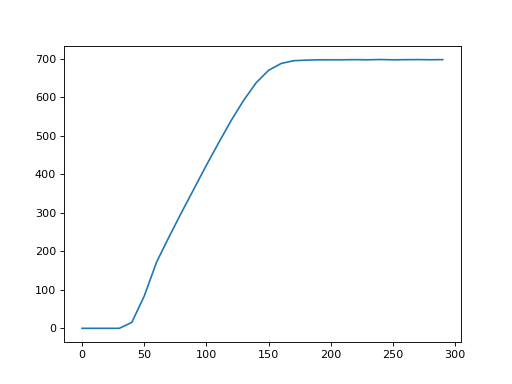

In [47]:
data = pd.read_hdf('/home/viherbos/DATA_daq/CAL_results/asic2_efine_fitted.h5',key='efine')
fig = plt.figure()
axis = fig.add_subplot(111)
data_sel = data[(data['channel_id']==13) & (data['tac_id']==0)]
axis.plot(data_sel['tpulse'],data_sel['mu'])

In [35]:
filename = '/home/viherbos/DATA_daq/CAL_results/asic2_efine_fitted.h5'
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        a,Q_fit,qoffset,ibias = TPcal.QDC_fit(data_tc,ch,tc,plot=False)
        res.append([ch,tc,qoffset[0],ibias,Q_fit.perr[0]/Q_fit.coeff[0]])

df_qfine = pd.DataFrame(res,columns=['channel_id','tac_id','qoffset','ibias','slope_err'])

Channel = 0 / Slope_Error = 0.019760
QOFFSET = -225.804699
IBIAS (Q/T) = 6.926938
Channel = 0 / Slope_Error = 0.020007
QOFFSET = -226.223568
IBIAS (Q/T) = 6.932713
Channel = 0 / Slope_Error = 0.019849
QOFFSET = -226.187687
IBIAS (Q/T) = 6.919150
Channel = 0 / Slope_Error = 0.019658
QOFFSET = -226.770150
IBIAS (Q/T) = 6.891176
Channel = 1 / Slope_Error = 0.018288
QOFFSET = -230.681235
IBIAS (Q/T) = 6.450271
Channel = 1 / Slope_Error = 0.018358
QOFFSET = -230.823176
IBIAS (Q/T) = 6.449940
Channel = 1 / Slope_Error = 0.018352
QOFFSET = -230.931565
IBIAS (Q/T) = 6.443734
Channel = 1 / Slope_Error = 0.018472
QOFFSET = -230.572855
IBIAS (Q/T) = 6.404924
Channel = 2 / Slope_Error = 0.017705
QOFFSET = -218.660971
IBIAS (Q/T) = 6.506193
Channel = 2 / Slope_Error = 0.018003
QOFFSET = -218.714733
IBIAS (Q/T) = 6.510171
Channel = 2 / Slope_Error = 0.017931
QOFFSET = -218.895551
IBIAS (Q/T) = 6.497062
Channel = 2 / Slope_Error = 0.017847
QOFFSET = -219.344440
IBIAS (Q/T) = 6.463228
Channel = 3 / Sl

Channel = 25 / Slope_Error = 0.020220
QOFFSET = -207.026435
IBIAS (Q/T) = 7.031062
Channel = 25 / Slope_Error = 0.020611
QOFFSET = -207.357997
IBIAS (Q/T) = 7.031268
Channel = 25 / Slope_Error = 0.020332
QOFFSET = -207.378275
IBIAS (Q/T) = 6.989634
Channel = 26 / Slope_Error = 0.021581
QOFFSET = -223.593810
IBIAS (Q/T) = 6.039356
Channel = 26 / Slope_Error = 0.021588
QOFFSET = -223.175634
IBIAS (Q/T) = 6.030937
Channel = 26 / Slope_Error = 0.021586
QOFFSET = -223.217469
IBIAS (Q/T) = 6.025333
Channel = 26 / Slope_Error = 0.021650
QOFFSET = -224.207504
IBIAS (Q/T) = 5.999112
Channel = 27 / Slope_Error = 0.022013
QOFFSET = -233.674904
IBIAS (Q/T) = 6.149964
Channel = 27 / Slope_Error = 0.021903
QOFFSET = -233.337376
IBIAS (Q/T) = 6.143540
Channel = 27 / Slope_Error = 0.022186
QOFFSET = -234.012089
IBIAS (Q/T) = 6.140271
Channel = 27 / Slope_Error = 0.021901
QOFFSET = -233.275379
IBIAS (Q/T) = 6.095197
Channel = 28 / Slope_Error = 0.018797
QOFFSET = -237.555656
IBIAS (Q/T) = 6.047368
Chan

Channel = 50 / Slope_Error = 0.015937
QOFFSET = -204.029671
IBIAS (Q/T) = 5.730242
Channel = 51 / Slope_Error = 0.021154
QOFFSET = -226.888527
IBIAS (Q/T) = 6.730713
Channel = 51 / Slope_Error = 0.021115
QOFFSET = -226.855624
IBIAS (Q/T) = 6.733345
Channel = 51 / Slope_Error = 0.020984
QOFFSET = -226.944881
IBIAS (Q/T) = 6.721941
Channel = 51 / Slope_Error = 0.021240
QOFFSET = -228.049083
IBIAS (Q/T) = 6.697479
Channel = 52 / Slope_Error = 0.017017
QOFFSET = -222.064593
IBIAS (Q/T) = 6.847248
Channel = 52 / Slope_Error = 0.016899
QOFFSET = -221.658988
IBIAS (Q/T) = 6.847960
Channel = 52 / Slope_Error = 0.016915
QOFFSET = -222.496391
IBIAS (Q/T) = 6.849708
Channel = 52 / Slope_Error = 0.016755
QOFFSET = -222.296560
IBIAS (Q/T) = 6.804901
Channel = 53 / Slope_Error = 0.017539
QOFFSET = -219.762206
IBIAS (Q/T) = 6.598604
Channel = 53 / Slope_Error = 0.017453
QOFFSET = -219.602753
IBIAS (Q/T) = 6.595731
Channel = 53 / Slope_Error = 0.017383
QOFFSET = -219.098107
IBIAS (Q/T) = 6.582685
Chan

In [9]:
df_qfine[df_qfine['channel_id']==13]

channel_id  tac_id     qoffset     ibias  slope_err
52          13       0 -271.105706  6.812067   0.021743
53          13       1 -270.939351  6.808731   0.021682
54          13       2 -271.313851  6.800960   0.021504
55          13       3 -271.838843  6.761006   0.021844

In [36]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic2_efine_cal.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# THRESHOLD T1

In [81]:
filename = "/home/viherbos/DATA_daq/CAL_data/asic0_t1_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


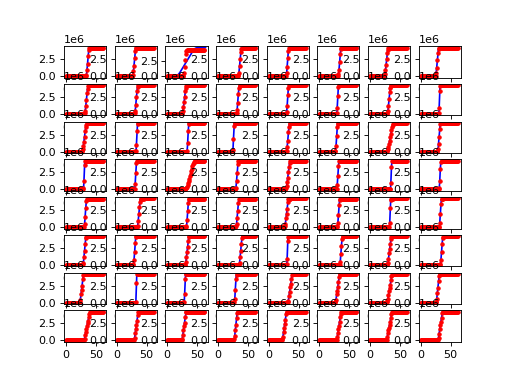

Channel = 0 / CHISQR = 105478981.537049
25
Channel = 1 / CHISQR = 295957668.620353
19
Channel = 2 / CHISQR = 493097513696.747559
18
Channel = 3 / CHISQR = 72838055.634599
25
Channel = 4 / CHISQR = 244743456.941088
21
Channel = 5 / CHISQR = 31645106.543288
23
Channel = 6 / CHISQR = 181161349.336148
17
Channel = 7 / CHISQR = 230501719.034429
18
Channel = 8 / CHISQR = 367724326.067032
23
Channel = 9 / CHISQR = 173051905.510559
23
Channel = 10 / CHISQR = 292246611.629223
17
Channel = 11 / CHISQR = 177180550.303071
22
Channel = 12 / CHISQR = 235522854.928801
23
Channel = 13 / CHISQR = 9829333.751118
20
Channel = 14 / CHISQR = 201270135.096733
22
Channel = 15 / CHISQR = 2332506.269955
23
Channel = 16 / CHISQR = 409890591.109380
19
Channel = 17 / CHISQR = 4046750.631308
23
Channel = 18 / CHISQR = 1794770.170192
27
Channel = 19 / CHISQR = 6293536.030156
18
Channel = 20 / CHISQR = 197012889.371982
22
Channel = 21 / CHISQR = 9705591.530669
18
Channel = 22 / CHISQR = 160087692.086634
20
Channel =

In [82]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],coeff[2]])

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

<IPython.core.display.Javascript object>


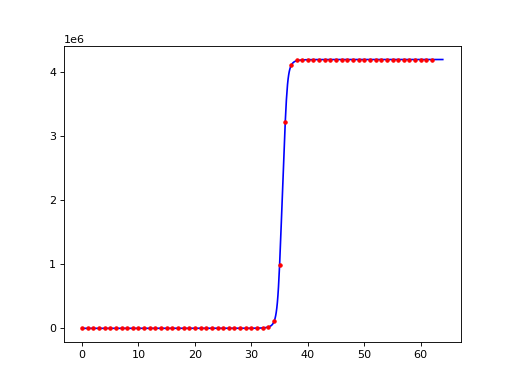

Channel = 30 / CHISQR = 6885234.057739
(27, <TOFPET_cal_lib.fitting_nohist object at 0x7f21f7baf3a0>)


In [86]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,30,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

# THRESHOLD T2

In [87]:
filename = "/home/viherbos/DATA_daq/CAL_data/asic0_t2_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


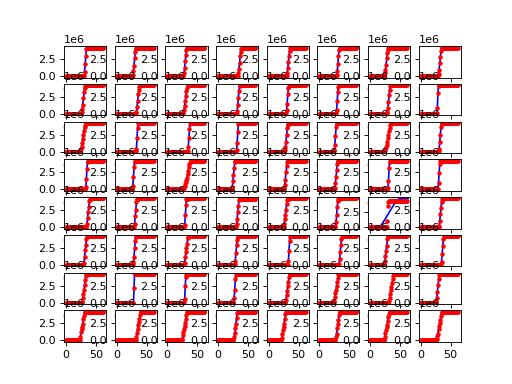

Channel = 0 / CHISQR = 10701377.990442
22
Channel = 1 / CHISQR = 348102647.376691
19
Channel = 2 / CHISQR = 109279139.544624
18
Channel = 3 / CHISQR = 227085247.889859
26
Channel = 4 / CHISQR = 208695219.025239
22
Channel = 5 / CHISQR = 247985088.133016
21
Channel = 6 / CHISQR = 353336807.716732
18
Channel = 7 / CHISQR = 68948463.166613
21
Channel = 8 / CHISQR = 395679552.866165
19
Channel = 9 / CHISQR = 331262601.927958
25
Channel = 10 / CHISQR = 309947427.776644
18
Channel = 11 / CHISQR = 53567364.796261
23
Channel = 12 / CHISQR = 258790975.197556
22
Channel = 13 / CHISQR = 179784143.627481
19
Channel = 14 / CHISQR = 235530272.120936
22
Channel = 15 / CHISQR = 7074653.408268
20
Channel = 16 / CHISQR = 439991366.017461
15
Channel = 17 / CHISQR = 18913288.810184
26
Channel = 18 / CHISQR = 22250205.697820
28
Channel = 19 / CHISQR = 56112234.792053
23
Channel = 20 / CHISQR = 320030102.780236
20
Channel = 21 / CHISQR = 27930848.088289
17
Channel = 22 / CHISQR = 632301432.253363
15
Channel

In [88]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],coeff[2]])
        
df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

<IPython.core.display.Javascript object>


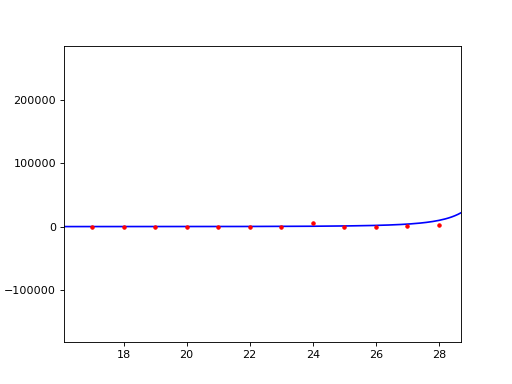

Channel = 30 / CHISQR = 16272562.152866
(22, <TOFPET_cal_lib.fitting_nohist object at 0x7f22022732e0>)


In [89]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,30,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

In [73]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic0_thresholds_cal.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()